<a href="https://colab.research.google.com/github/jhlopesalves/data-science-practice-notebook/blob/main/Python/statistics/exploratory_data_analysis/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is an essential initial step in any data-driven project. It's an approach to analyzing datasets to summarize their main characteristics, often employing visual methods. Think of it as getting to know your data before you make any assumptions or dive into complex modeling. EDA helps you understand the data's structure, identify anomalies, test initial hypotheses, and check underlying assumptions.

## Why EDA ?

Performing EDA is crucial because it:
-   **Uncovers the underlying structure:** Reveals patterns, trends, and relationships between variables that might not be obvious.
-   **Detects anomalies and errors:** Helps identify outliers, missing values, or incorrect data entries that could skew your analysis.
-   **Informs data preprocessing:** Guides decisions on how to clean the data, handle missing values, and transform variables.
-   **Validates assumptions:** Allows you to check if the assumptions required for specific statistical models or tests hold true for your dataset.
-   **Guides feature engineering:** Can inspire ideas for creating new, more informative features from existing ones.
-   **Provides context:** Gives you a feel for the data, which is invaluable for interpreting results and communicating findings.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

## Essential Libraries for Exploratory Data Analysis

### Understanding the EDA Toolkit

Before diving into data exploration, we need to understand our fundamental tools. Each library serves a specific purpose in the EDA ecosystem:

**Data Manipulation and Analysis:**
- `pandas`: The backbone of data analysis in Python. Provides DataFrames for structured data manipulation, statistical operations, and data cleaning
- `numpy`: Enables efficient numerical computations and array operations that pandas builds upon

**Data Visualization:**
- `matplotlib.pyplot`: The foundational plotting library. Offers fine-grained control over every aspect of visualizations
- `seaborn`: Built on matplotlib, provides statistical visualizations with better default aesthetics and simplified syntax for complex plots

**System Operations:**
- `os`: Handles operating system interactions, particularly useful for file and directory management

In [ ]:
# Ensure the data directory exists
if not os.path.exists('data'):
    os.makedirs('data')

# List of raw-GitHub URLs to download
urls = [
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Exploratory%20Data%20Analysis/data/clean_books.csv",
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Exploratory%20Data%20Analysis/data/clean_unemployment.csv",
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Exploratory%20Data%20Analysis/data/divorce.csv",
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Exploratory%20Data%20Analysis/data/ds_salaries_clean.csv",
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Exploratory%20Data%20Analysis/data/ds_salaries.csv",
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Exploratory%20Data%20Analysis/data/planes.csv",
]

# Run wget in quiet mode for each URL
for url in urls:
    # -q suppresses all output; -P directs output into 'data/' directory
    !wget -q -P data/ "{url}"

# Single success message
print("All files downloaded successfully.")


'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


All files downloaded successfully.


'wget' is not recognized as an internal or external command,
operable program or batch file.


### Data Acquisition Strategy

#### Technical Implementation:
- `wget`: A command-line utility for downloading files from web servers
- `-q` flag: "Quiet" mode suppresses verbose output
- `-P data/` flag: Directs downloads to the 'data/' directory
- Error handling: The script continues even if one download fails

#### Data Organization:
We create a dedicated `data/` directory following data science best practices:
- Separates raw data from analysis code
- Makes the project structure clearer
- Facilitates .gitignore patterns (raw data often shouldn't be version controlled)


## The First Steps: The EDA Trinity

A common starting point in EDA, especially when using `pandas` in Python, involves three key methods that provide a quick overview of your dataset. Let's assume your data is loaded into a DataFrame called `df`.

### 1. `df.shape` - Dimensions: How big is your dataset?

The `.shape` attribute of a pandas DataFrame returns a tuple representing the dimensions of the DataFrame. The first element is the number of rows (observations), and the second is the number of columns (features or variables).

### 2. `df.info()` - Data types and null counts: What kind of data do you have?

The `.info()` method prints a concise summary of a DataFrame. This includes the index dtype and columns, non-null values, and memory usage. For each column, it shows its name, the count of non-null entries, and its data type (e.g., `int64`, `float64`, `object`, `datetime64`).

**Data Types:** Are your numbers actually stored as numbers, or are they text? Are dates recognized as dates? Incorrect data types can lead to errors or nonsensical results later on. For example, you can't calculate the average of a column if it's stored as text.

**Non-Null Counts:** This is your first look at missing data. If a column has fewer non-null entries than the total number of rows (from `.shape`), it means there are missing values. Identifying missing data early is crucial because many analytical methods can't handle it directly, and you'll need a strategy to address it (e.g., imputation or removal).

### 3. `df.describe()` - Summary statistics: What do the numbers tell you?

The `.describe()` method generates descriptive statistics.

For **numerical columns**, it provides:
- count (number of non-null values)
- mean (average)
- std (standard deviation, a measure of spread)
- min (minimum value)
- 25th percentile (Q1)
- 50th percentile (median or Q2)
- 75th percentile (Q3)
- max (maximum value).

For **object columns** (like strings or categorical data), it provides:
- count
- unique (number of distinct values)
- top (most frequent value)
- freq (frequency of the top value).

You can use `df.describe(include='all')` to see statistics for all columns.

**Numerical Data:**
-   `mean` vs. `median (50%)`: If these are very different, it might indicate a skewed distribution.
-   `std`: A large standard deviation suggests data points are spread out from the mean; a small one means they are clustered closely.
-   `min` and `max`: These can help spot potential outliers or data entry errors (e.g., an age of 200).
-   Quartiles (`25%`, `50%`, `75%`): These describe the distribution. The range between the 25th and 75th percentile is the Interquartile Range (IQR), another measure of spread that is less sensitive to outliers.

**Categorical Data:**
-   `unique`: How many different categories are there?
-   `top` and `freq`: What's the most common category, and how often does it appear? This can highlight imbalances in categorical features.


A first look with `.head()`

In [ ]:
books = pd.read_csv("data/clean_books.csv")
books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


## Initial Data Inspection: The Critical First Look

### Why `.head()` is Your Best Friend

The `.head()` method provides the first glimpse into your dataset's reality. This isn't just about seeing data—it's about quickly assessing:

####  What to Look For:
1. **Data Types**: Are numbers stored as strings? Are dates recognized properly?
2. **Missing Values**: Do you see `NaN`, empty cells, or placeholder values?
3. **Data Quality**: Do values make sense? Any obvious errors?
4. **Structure**: How are the columns organized? Are there unexpected columns?
5. **Scale**: What's the magnitude of numerical values?

####  In Academic Research:
This step corresponds to "data familiarization" in research methodology—understanding your instrument before measurement.

Gathering more `.info()`

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


## Data Structure Analysis with `.info()`

### The Data Health Checkup

The `.info()` method is like a medical checkup for your dataset. It reveals the internal structure and potential issues that aren't visible in `.head()`.

####  Diagnostic Information Provided:

**1. DataFrame Shape:**
- `RangeIndex`: Shows the number of rows and index type
- `Data columns`: Total number of columns

**2. Column Analysis:**
- `Non-Null Count`: Reveals missing data patterns
- `Dtype`: Data type for each column (critical for analysis)

**3. Memory Usage:**
- Shows how much RAM your dataset consumes
- Important for large datasets and memory planning

#### 🔬 Data Type Implications:

| Dtype | Meaning | Analysis Impact |
|-------|---------|----------------|
| `int64` | Integer numbers | Mathematical operations, aggregations |
| `float64` | Decimal numbers | Statistical calculations, correlations |
| `object` | Strings/Mixed | Categorical analysis, text processing |
| `datetime64` | Date/time | Time series analysis, temporal patterns |
| `bool` | True/False | Logical operations, binary analysis |

####  Red Flags to Watch:
- **Object dtype for numbers**: May indicate data quality issues
- **High missing value counts**: Could skew analysis
- **Unexpected data types**: Dates stored as strings, numbers as objects

####  Statistical Significance:
Missing data isn't just a technical issue—it can introduce bias. If data is "Missing Not At Random" (MNAR), your conclusions might be systematically wrong.

A closer look at categorical columns

In [ ]:
books.value_counts("genre")

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

## Categorical Data Analysis: Understanding Distributions

### The Power of `value_counts()`

Categorical variables require different analytical approaches than numerical ones. The `value_counts()` method is essential for understanding the distribution and balance of categorical data.

**1. Class Imbalance Detection:**
- Severely imbalanced categories can bias machine learning models
- Some statistical tests assume balanced groups
- Rare categories might need special handling

**2. Data Quality Assessment:**
- Reveals typos or inconsistent data entry ("Fiction" vs "fiction" vs "Fiction ")
- Identifies unexpected categories
- Shows if categorical encoding is needed

**3. Statistical Planning:**
- Determines appropriate visualization methods
- Influences choice of statistical tests
- Guides sampling strategies for further analysis

#### Practical Applications:
- **A/B Testing**: Ensuring balanced treatment groups
- **Market Research**: Understanding customer segment sizes
- **Quality Control**: Detecting data entry patterns

#### Advanced Techniques:
```python
# Percentage distribution
books.value_counts("genre", normalize=True)

# Include missing values
books.value_counts("genre", dropna=False)

# Sort by index instead of count
books.value_counts("genre", sort=False)
```

`.describe()` numerical columns


In [ ]:
books.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


## Descriptive Statistics: The Foundation of Data Understanding

### Beyond Averages: A Complete Statistical Portrait

The `.describe()` method provides a comprehensive statistical summary that forms the foundation for all subsequent analysis. Each statistic tells a unique story about your data.

####  Understanding Each Statistic:

**Central Tendency:**
- **Mean**: The arithmetic average—sensitive to outliers
- **50% (Median)**: The middle value—robust to outliers
- *When mean ≠ median*: Indicates skewed distribution

**Variability Measures:**
- **Std (Standard Deviation)**: Average distance from the mean
  - Low std: Data clustered around mean
  - High std: Data spread out
- **Min/Max**: Range boundaries—can reveal outliers
- **IQR (25%-75%)**: The middle 50% of data—robust spread measure

#### Distribution Insights:

**Symmetrical Distribution:**
- Mean ≈ Median
- 25th percentile distance from median ≈ 75th percentile distance

**Right-Skewed (Positive Skew):**
- Mean > Median
- Common in: income, prices, response times

**Left-Skewed (Negative Skew):**
- Mean < Median
- Common in: test scores (ceiling effect), age at death

#### Statistical Theory Connection:

**The 68-95-99.7 Rule (Normal Distribution):**
- 68% of data within 1 standard deviation of mean
- 95% within 2 standard deviations
- 99.7% within 3 standard deviations

**Outlier Detection Rule of Thumb:**
- Values beyond Mean ± 3×Std are potential outliers
- IQR method: Values beyond Q1-1.5×IQR or Q3+1.5×IQR

## Data Visualization: From Numbers to Insights

### The Histogram: Revealing Distribution Patterns

Visualization transforms abstract numbers into comprehensible patterns. Histograms are fundamental for understanding the **distribution** of numerical variables—how values are spread across the range.

**1. Distribution Shape Recognition:**
- **Normal**: Bell-shaped, symmetric around mean
- **Uniform**: Flat, all values equally likely
- **Skewed**: Tail extending in one direction
- **Bimodal**: Two peaks, suggesting multiple populations

**2. Statistical Assumption Checking:**
- Many statistical tests assume normal distribution
- Reveals if data transformations are needed
- Guides choice of analytical methods

**3. Outlier Detection:**
- Isolated bars far from main distribution
- Unexpected gaps in the data

**`binwidth=0.1`**:
- Controls histogram resolution
- Smaller binwidth = more detail, potentially noisy
- Larger binwidth = smoother, may hide patterns
- Rule of thumb: Try √n bins for n observations

**`sns.histplot()` vs `plt.hist()`**:
- Seaborn provides better defaults and statistical enhancements
- Automatic color schemes and styling
- Better integration with statistical analysis

#### Interpretation Guidelines:

**For Rating Data (0-5 scale):**
- Ceiling/floor effects: Are ratings bunched at extremes?
- Central tendency: Where do most ratings cluster?
- Variance: How much agreement exists?

**Academic Connection**: This visualization implements principles from **Tukey's Exploratory Data Analysis** (1977), emphasizing pattern recognition before hypothesis testing.

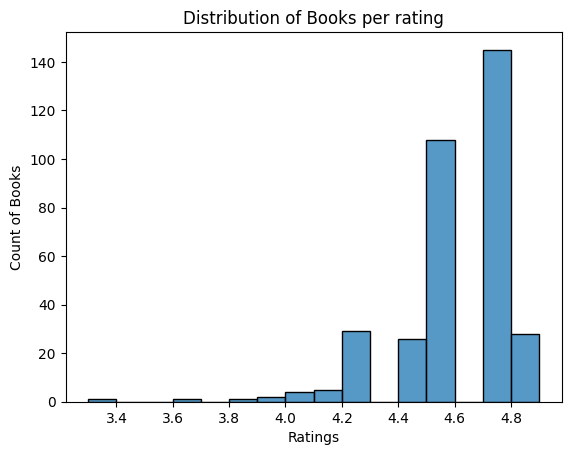

In [ ]:
# Create a histogram of ratings count
fig, ax = plt.subplots()
sns.histplot(data=books, x="rating", binwidth=.1)
ax.set(xlabel="Ratings",
       ylabel="Count of Books",
       title="Distribution of Books per rating")

plt.show()

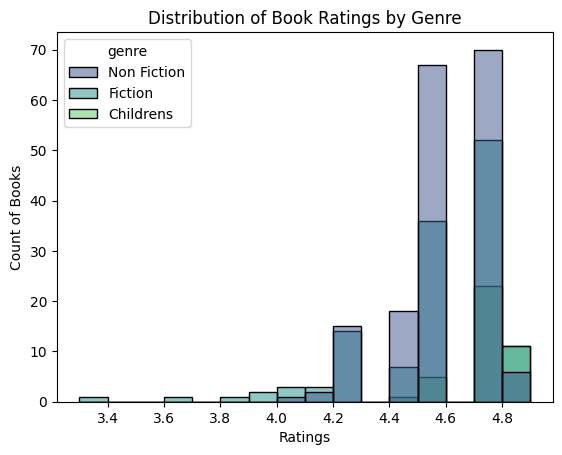

In [ ]:
# Create a histogram of ratings colored by genre
fig, ax = plt.subplots()

sns.histplot(data=books, x="rating", hue="genre", binwidth=.1, palette="viridis")

# Set the labels and title for the plot
ax.set(xlabel="Ratings",
       ylabel="Count of Books",
       title="Distribution of Book Ratings by Genre")

plt.show()

## Comparative Analysis: Grouped Visualizations

### Multi-Group Histograms: Revealing Category-Based Patterns

While single histograms show overall distribution, grouped histograms reveal how distributions **differ across categories**. This is a crucial step in identifying relationships between categorical and numerical variables.

####  Why Use the `hue` Parameter:

**1. Comparative Distribution Analysis:** <br>
 Do different genres have different rating patterns? <br>
 Are the distributions similar in shape but shifted? <br>
 Which group has the highest variability?

**2. Hypothesis Generation:** <br>
 "Fiction books receive more extreme ratings (both very high and very low)" <br>
 "Non-fiction ratings are more centrally clustered" <br>
 "One genre consistently outperforms the other"

**3. Statistical Planning:** <br>
 Determines if separate analysis by group is needed <br>
 Reveals if groups can be pooled for analysis <br>
 Guides choice of statistical tests (parametric vs non-parametric)

#### Visual Design Principles:

**Color Palette Choice (`palette="viridis"`):** <br>
 Viridis is colorblind-friendly <br>
 Maintains distinction in grayscale <br>
 Perceptually uniform (equal visual differences = equal data differences) <br>

**Binwidth Consistency:** <br>
 Same binwidth across groups ensures fair comparison <br>
 Allows direct height comparisons <br>
 Prevents visual distortions <br>

**Distribution Comparison:** <br>
 **Overlay vs. Side-by-side**: Overlay shows direct comparison but may obscure details <br>
 **Peak Positions**: Different peaks suggest different central tendencies <br>
 **Spread Differences**: Different widths indicate different variability <br>

**Statistical Implications:** <br>
 If distributions look very different: Consider separate analyses <br>
 If similar shapes but different centers: t-test might be appropriate <br>
 If different shapes: Non-parametric tests may be needed



In [ ]:
books.groupby("genre").mean(numeric_only=True)

,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


## Statistical Aggregation: The Power of `groupby()`

### From Individual Observations to Group Insights

The `groupby()` operation is one of the most powerful tools in data analysis. It implements the "split-apply-combine" paradigm that's fundamental to comparative statistics.

####  The Split-Apply-Combine Paradigm:

**1. Split**: Divide data into groups based on categorical variable
**2. Apply**: Calculate statistics for each group independently
**3. Combine**: Merge results into a summary table

####  Why This Matters:

**Statistical Significance:**
- Moves from descriptive to comparative statistics
- Enables hypothesis testing between groups
- Forms the basis for ANOVA and similar tests

**Real-World Applications:**
- **A/B Testing**: Compare treatment vs. control groups
- **Market Research**: Analyze performance by customer segment
- **Quality Control**: Monitor metrics across different production lines

#### Understanding the Results:

**Mean Comparisons:**
- Difference in means suggests different group behavior
- Consider both practical and statistical significance
- Large differences with small sample sizes may not be reliable

**`numeric_only=True` Parameter:**
- Automatically excludes non-numeric columns
- Prevents errors from trying to average text data
- Ensures clean statistical output

####  Advanced Interpretations:

**Effect Size Calculation:**
```python
# Cohen's d for effect size
from scipy import stats
group_means = books.groupby("genre")["rating"].mean()
effect_size = (group_means["Fiction"] - group_means["Non Fiction"]) / pooled_std
```

**Statistical Testing:**
```python
# Independent t-test
fiction_ratings = books[books["genre"] == "Fiction"]["rating"]
nonfiction_ratings = books[books["genre"] == "Non Fiction"]["rating"]
t_stat, p_value = stats.ttest_ind(fiction_ratings, nonfiction_ratings)
```


In [ ]:
books.select_dtypes(include=np.number).agg(["mean", "std"])

,rating,year
mean,4.608571,2013.508571
std,0.226941,3.284711


## Advanced Aggregation: Multiple Statistics Simultaneously

### Beyond Single Measures: Comprehensive Statistical Summaries

While single statistics are useful, combining multiple measures provides a richer understanding of data patterns. This approach follows the principle that **no single statistic tells the complete story**.

####  Why Multiple Statistics:

**1. Robustness Check:**
- Mean vs. Median reveals skewness and outlier impact
- Standard deviation shows variability around the central tendency
- Together, they provide a complete distributional summary

**2. Statistical Validation:**
- Multiple measures guard against misleading conclusions
- Detect data quality issues (impossible combinations)
- Support or refute initial hypotheses

**3. Decision-Making Support:**
- Business decisions need multiple perspectives
- Risk assessment requires both central tendency and variability
- Different stakeholders may care about different statistics

####  Technical Implementation:

**`.select_dtypes(include=np.number)`**:
- Automatically identifies numerical columns
- Prevents errors from attempting operations on text
- Scales efficiently with dataset size

**`.agg(["mean", "std"])`**:
- Vectorized operations for efficiency
- Consistent formatting across all numerical columns
- Easy to extend with additional statistics

####  Interpretation Framework:

**Central Tendency Comparison:**
- **Mean = Median**: Symmetric distribution
- **Mean > Median**: Right-skewed (positive skew)
- **Mean < Median**: Left-skewed (negative skew)

**Variability Assessment:**
- **Coefficient of Variation**: `std/mean` for relative variability
- **High std relative to mean**: High uncertainty/variability
- **Low std relative to mean**: Consistent, predictable values

#### Statistical Theory Connection:

**Descriptive vs. Inferential Statistics:**
- These are *descriptive* statistics—they describe the sample
- For *inferential* statistics, we'd add confidence intervals and hypothesis tests
- The distinction is crucial for proper interpretation

**Moments of Distribution:**
- Mean: First moment (location)
- Variance (std²): Second moment (spread)
- Missing: Skewness (third moment) and kurtosis (fourth moment)

In [ ]:
books.select_dtypes(include=np.number).agg({"rating": ["mean", "std"], "year":["median"]})

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


In [ ]:
books.groupby("genre").agg(
    mean_rating=("rating", "mean"),
    std_rating=("rating", "std"),
    median_year=("year", "median")
)

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


### Functions for initial exploration
You are researching unemployment rates worldwide and have been given a new dataset to work with. The data has been saved and loaded for you as a pandas DataFrame called unemployment. You've never seen the data before, so your first task is to use a few pandas functions to learn about this new data.

In [ ]:
unemployment = pd.read_csv("data/clean_unemployment.csv")

## Dataset Transition: From Books to Unemployment

### Applying EDA Skills Across Domains

Transitioning between datasets is a crucial skill in data science. Each dataset presents unique challenges and requires domain-specific interpretation, but the analytical framework remains consistent.

#### Understanding the Unemployment Dataset:

**Domain Context:**
- **Economic Indicator**: Unemployment rates reflect economic health
- **Policy Relevance**: Used for government decision-making
- **Temporal Dynamics**: Likely contains time-series patterns
- **Geographic Variation**: Different countries/regions may show distinct patterns

**Expected Data Characteristics:**
- **Percentage Values**: Typically 0-25% range for unemployment
- **Temporal Trends**: May show seasonal or cyclical patterns
- **Cross-Sectional Variation**: Different countries will have different rates
- **Data Quality Considerations**: Government statistics may have standardization differences

#### Methodological Consistency:

Even though we're changing domains, our analytical approach remains the same:
1. **Initial Inspection**: `.head()`, `.info()`, `.describe()`
2. **Data Quality Assessment**: Missing values, data types, outliers
3. **Univariate Analysis**: Distribution of each variable
4. **Bivariate Analysis**: Relationships between variables
5. **Hypothesis Generation**: Domain-informed questions

#### Domain-Specific Considerations:

**Economic Data Interpretation:**
- **Seasonality**: Unemployment often varies by season
- **Economic Cycles**: May reflect recession/expansion periods
- **Cross-Country Comparisons**: Different labor market structures
- **Data Vintage**: Economic data is often revised

**Statistical Implications:**
- **Bounded Variables**: Percentages have natural 0-100% bounds
- **Heteroscedasticity**: Variance may differ across countries
- **Autocorrelation**: Time series data shows temporal dependence

In [ ]:
# Print the first five rows of unemployment
display(unemployment.head())

,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


In [ ]:
# Use a pandas function to print a summary of column non-missing values and data types from the unemployment DataFrame.
print(unemployment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  182 non-null    object 
 1   country_name  182 non-null    object 
 2   continent     177 non-null    object 
 3   2010          182 non-null    float64
 4   2011          182 non-null    float64
 5   2012          182 non-null    float64
 6   2013          182 non-null    float64
 7   2014          182 non-null    float64
 8   2015          182 non-null    float64
 9   2016          182 non-null    float64
 10  2017          182 non-null    float64
 11  2018          182 non-null    float64
 12  2019          182 non-null    float64
 13  2020          182 non-null    float64
 14  2021          182 non-null    float64
dtypes: float64(12), object(3)
memory usage: 21.5+ KB
None


In [ ]:
# Print the summary statistics (count, mean, standard deviation, min, max, and quartile values) of each numerical column in unemployment.
display(unemployment.describe())

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,8.409286,8.315440,8.317967,8.344780,8.179670,8.058901,7.925879,7.668626,7.426429,7.243736,8.420934,8.390879
std,6.248887,6.266795,6.367270,6.416041,6.284241,6.161170,6.045439,5.902152,5.818915,5.696573,6.040915,6.067192
min,0.450000,0.320000,0.480000,0.250000,0.200000,0.170000,0.150000,0.140000,0.110000,0.100000,0.210000,0.260000
25%,4.015000,3.775000,3.742500,3.692500,3.625000,3.662500,3.800000,3.690000,3.625000,3.487500,4.285000,4.335000
50%,6.965000,6.805000,6.690000,6.395000,6.450000,6.170000,5.925000,5.650000,5.375000,5.240000,6.695000,6.425000
75%,10.957500,11.045000,11.285000,11.310000,10.695000,10.215000,10.245000,10.315000,9.257500,9.445000,11.155000,10.840000
max,32.020000,31.380000,31.020000,29.000000,28.030000,27.690000,26.540000,27.040000,26.910000,28.470000,29.220000,33.560000


In [ ]:
# Use a method to count the values associated with each continent in the unemployment DataFrame.
print(unemployment["continent"].value_counts())

continent
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: count, dtype: int64


### Global unemployment in 2021
It's time to explore some of the numerical data in unemployment! What was typical unemployment in a given year? What was the minimum and maximum unemployment rate, and what did the distribution of the unemployment rates look like across the world? A histogram is a great way to get a sense of the answers to these questions.

Your task in this exercise is to create a histogram showing the distribution of global unemployment rates in 2021.

In [ ]:
unemployment.head()

,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


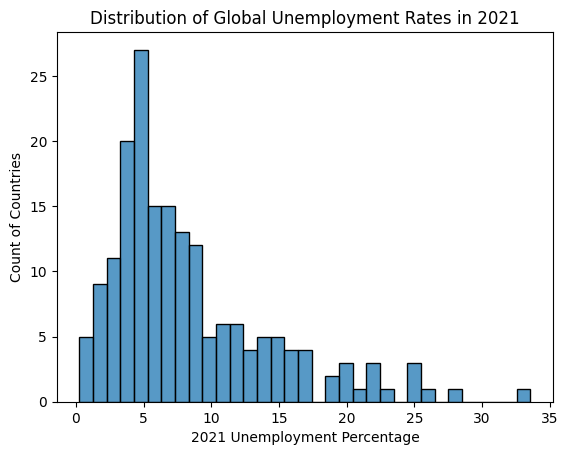

In [ ]:
# Create a histogram of the distribution of 2021 unemployment percentages across all countries in unemployment; show a full percentage point in each bin.
fig, ax = plt.subplots()
sns.histplot(data=unemployment, x="2021", binwidth=1)
ax.set(title="Distribution of Global Unemployment Rates in 2021",
       xlabel="2021 Unemployment Percentage",
       ylabel="Count of Countries")

plt.show()

### Data Validation

Validating data types


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


In [ ]:
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

### Updating data types

| Type       | Python Name |
|------------|-------------|
| String     | `str`       |
| Integer    | `int`       |
| Float      | `float`     |
| Dictionary | `dict`      |
| List       | `list`      |
| Boolean    | `bool`      |


In [ ]:
books ["year"] = books ["year"].astype(int)
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

### Validating categorical data

In [ ]:
books ["genre"].isin(["Fiction", "Non Fiction"])

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

In [ ]:
~books ["genre"].isin(["Fiction", "Non Fiction"])

0      False
1      False
2      False
3      False
4       True
       ...  
345    False
346    False
347    False
348    False
349     True
Name: genre, Length: 350, dtype: bool

In [ ]:
books [books["genre"].isin(["Fiction", "Non Fiction"])].head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction


In [ ]:
books.select_dtypes("number").head()

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019


### Validating numerical data


In [ ]:
print(f"Lowest year: {books['year'].min()}, Highest year: {books['year'].max()}")

Lowest year: 2009, Highest year: 2019


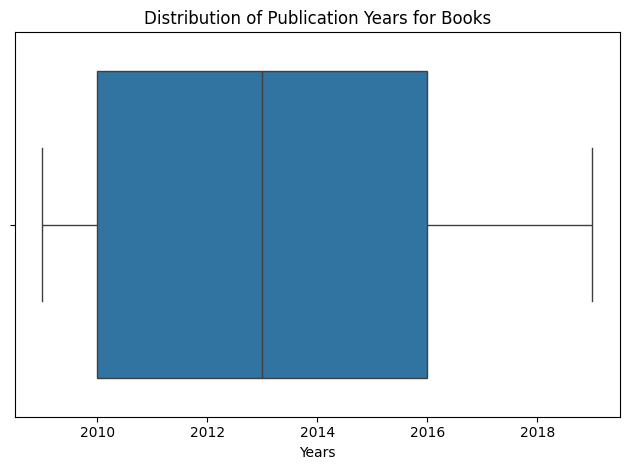

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(data=books, x="year")
ax.set(title="Distribution of Publication Years for Books",
       xlabel="Years")
plt.tight_layout()
plt.show()

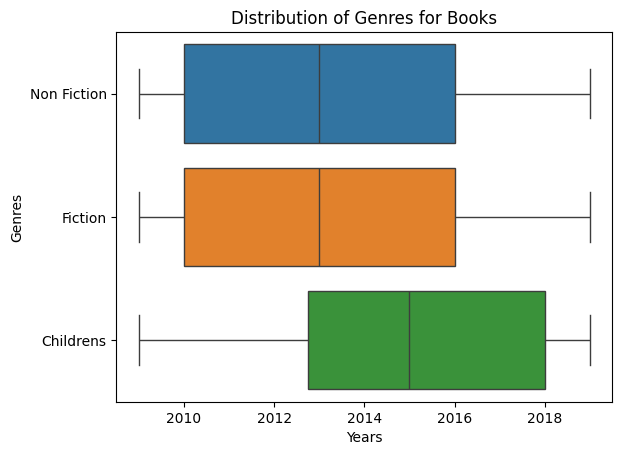

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(data=books, x="year", y="genre", hue="genre")
ax.set(xlabel="Years", ylabel="Genres", title="Distribution of Genres for Books")
plt.show()

### Data summarization
#### Exploring groups of data
- `.groupby()` groups data by category
- Aggregating function indicates how to summarize grouped data


In [ ]:
# Calculate the mean of numeric columns after grouping by genre
display(books.groupby("genre")[["rating", "year"]].mean())

,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


### Aggregating functions
- Sum:`.sum()`
- Count: `.count()`
- Minimum: `.min()`
- Maximum: `.max()`
- Variance: `.var()`
- Standard deviation:`.std()`

### Aggregating ungrouped data
`.agg()` applies aggregating functions across a DataFrame

In [ ]:
# Select only columns with numeric data types (integers and floats).
# np.number is a shorthand for all numeric dtypes.
numeric_books = books.select_dtypes(include=np.number)

# Apply multiple aggregation functions ('mean' and 'std') to the selected numeric columns.
display(numeric_books.agg(["mean", "std"]))

,rating,year
mean,4.608571,2013.508571
std,0.226941,3.284711


### Specifying aggregations for columns


In [ ]:
books.agg({"rating": ["mean", "std"], "year": ["median"]})

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


### Named summary columns


In [ ]:
# Group the books DataFrame by the 'genre' column.
books.groupby("genre").agg(
    # Calculate the mean of the 'rating' column and name the resulting column 'mean_rating'.
    mean_rating=("rating", "mean"),
    # Calculate the standard deviation of the 'rating' column and name the resulting column 'std_rating'.
    std_rating=("rating", "std"),
    # Calculate the median of the 'year' column and name the resulting column 'median_year'.
    median_year=("year", "median")
)

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


### Visualizing categorical summaries


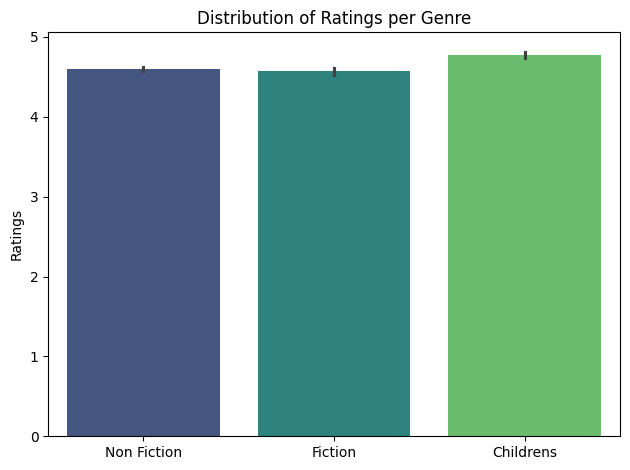

In [ ]:
fig, ax = plt.subplots()
sns.barplot(data=books, x="genre", y="rating", hue="genre", palette="viridis")
ax.set(title="Distribution of Ratings per Genre",
       xlabel="",
       ylabel="Ratings")
plt.tight_layout()
plt.show()

### Summaries with .groupby() and .agg()
In this exercise, you'll explore the means and standard deviations of the yearly unemployment data. First, you'll find means and standard deviations regardless of the continent to observe worldwide unemployment trends. Then, you'll check unemployment trends broken down by continent.

In [ ]:
# Print yearly mean and standard deviation grouped by continent
print(unemployment.select_dtypes(include=np.number).agg(["mean", "std"]))

          2010      2011      2012      2013      2014      2015      2016  \
mean  8.409286  8.315440  8.317967  8.344780  8.179670  8.058901  7.925879   
std   6.248887  6.266795  6.367270  6.416041  6.284241  6.161170  6.045439   

          2017      2018      2019      2020      2021  
mean  7.668626  7.426429  7.243736  8.420934  8.390879  
std   5.902152  5.818915  5.696573  6.040915  6.067192  


In [ ]:
# Print yearly mean and standard deviation grouped by continent
year_cols = [col for col in unemployment.columns if col.isdigit()]
display(unemployment.groupby("continent")[year_cols].agg(["mean", "std"]))


2010                 2011                 2012            \
                    mean       std       mean       std       mean       std   
continent                                                                      
Africa          9.343585  7.411259   9.369245  7.401556   9.240755  7.264542   
Asia            6.240638  5.146175   5.942128  4.779575   5.835319  4.756904   
Europe         11.008205  6.392063  10.947949  6.539538  11.325641  7.003527   
North America   8.663333  5.115805   8.563333  5.377041   8.448889  5.495819   
Oceania         3.622500  2.054721   3.647500  2.008466   4.103750  2.723118   
South America   6.870833  2.807058   6.518333  2.801577   6.410833  2.936508   

                    2013                 2014            ...      2017  \
                    mean       std       mean       std  ...      mean   
continent                                                ...             
Africa          9.132453  7.309285   9.121321  7.291359  ...  9.284528   
Asia            5.852128  4.668405   5.853191  4.681301  ...  6.171277   
Europe         11.466667  6.969209  10.971282  6.759765  ...  8.359744   
North America   8.840556  6.081829   8.512222  5.801927  ...  7.391111   
Oceania         3.980000  2.640119   3.976250  2.659205  ...  3.872500   
South America   6.335000  2.808780   6.347500  2.834332  ...  7.281667   

                             2018                2019                 2020  \
                    std      mean       std      mean       std       mean   
continent                                                                    
Africa         7.407620  9.237925  7.358425  9.264340  7.455293  10.307736   
Asia           5.277201  6.090213  5.409128  5.949149  5.254008   7.012340   
Europe         5.177845  7.427436  4.738206  6.764359  4.124734   7.470513   
North America  5.326446  7.281111  5.253180  7.095000  4.770490   9.297778   
Oceania        2.492834  3.851250  2.455893  3.773750  2.369068   4.273750   
South America  3.398994  7.496667  3.408856  7.719167  3.379845  10.275000   

                              2021            
                    std       mean       std  
continent                                     
Africa         7.928166  10.473585  8.131636  
Asia           5.699609   6.906170  5.414745  
Europe         4.071218   7.414872  3.947825  
North America  4.963045   9.155000  5.076482  
Oceania        2.617490   4.280000  2.671522  
South America  3.411263   9.924167  3.611624  

[6 rows x 24 columns]

### Named aggregations
You've seen how `.groupby()` and `.agg()` can be combined to show summaries across categories. Sometimes, it's helpful to name new columns when aggregating so that it's clear in the code output what aggregations are being applied and where.

Your task is to create a DataFrame called `continent_summary` which shows a row for each continent. The DataFrame columns will contain the mean unemployment rate for each continent in 2021 as well as the standard deviation of the 2021 employment rate. And of course, you'll rename the columns so that their contents are clear!

In [ ]:

continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021=("2021", "mean"),
    # Create the std_rate_2021 column
    std_rate_2021=("2021", "mean")
)
print(continent_summary)

               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585      10.473585
Asia                 6.906170       6.906170
Europe               7.414872       7.414872
North America        9.155000       9.155000
Oceania              4.280000       4.280000
South America        9.924167       9.924167


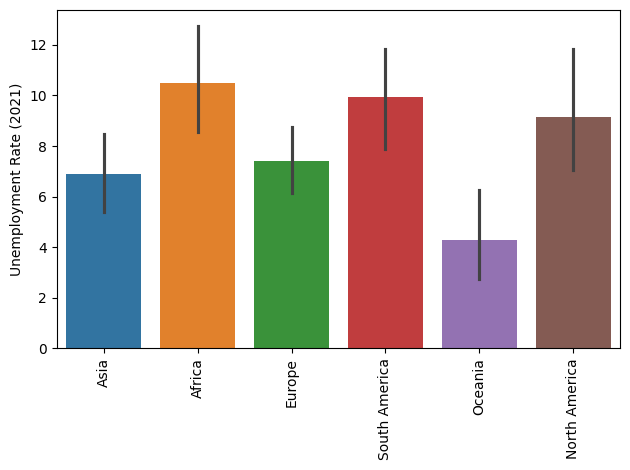

In [ ]:
# Create a bar plot of continents and their average unemployment
fig, ax = plt.subplots()
sns.barplot(x="continent", y="2021", data=unemployment, hue="continent", legend=False)
ax.set(xlabel="",
       ylabel="Unemployment Rate (2021)")

ax.tick_params(axis='x', labelrotation=90)
plt.tight_layout()
plt.show()

## Data Cleaning and Imputation
Exploring and analyzing data often means dealing with missing values, incorrect data types, and outliers. In this chapter, you’ll learn techniques to handle these issues and streamline your EDA processes!



In [ ]:
planes = pd.read_csv("data/planes.csv")

## Missing Data: The Silent Challenge in Data Analysis

### Understanding and Addressing Data Incompleteness

Missing data is one of the most common and consequential challenges in real-world data analysis. How you handle missing values can fundamentally alter your conclusions, making this a critical methodological decision.

####  Types of Missing Data (Statistical Theory):

**1. Missing Completely At Random (MCAR):** <br>
 Missingness is unrelated to any variable (observed or unobserved) <br>
 *Example*: Survey responses lost due to technical glitches <br>
 *Analysis Impact*: Reduces sample size but doesn't bias results <br>

**2. Missing At Random (MAR):** <br>
 Missingness depends on observed variables but not the missing value itself <br>
 *Example*: Older people less likely to answer technology questions <br>
 *Analysis Impact*: Can be addressed with proper imputation methods <br>

**3. Missing Not At Random (MNAR):** <br>
 Missingness depends on the unobserved value itself <br>
 *Example*: High earners refusing to disclose income <br>
 *Analysis Impact*: Most problematic; requires domain expertise to address <br>

####  The 5% Rule: Statistical and Practical Considerations

**Why 5%?** <br>
 **Statistical Power**: Small enough to not substantially reduce sample size <br>
 **Bias Minimization**: Unlikely to systematically skew results if MCAR <br>
 **Practical Threshold**: Balances data retention with analytical validity <br>
 **Literature Standard**: Widely accepted in social sciences and business analytics <br>

**Important Caveat**: The 5% rule assumes MCAR. If data is MNAR, even 1% missing can introduce significant bias.

####  Technical Implementation Strategy:

**Step-by-Step Approach:**
1. **Assessment**: Count missing values per column
2. **Threshold Calculation**: Determine 5% of total observations
3. **Column Classification**: Identify columns below/above threshold
4. **Selective Removal**: Drop rows only for low-missing columns
5. **Validation**: Verify impact on sample size and composition

####  Alternative Strategies for High-Missing Columns:

**When >5% Missing:** <br>
 **Imputation**: Fill with mean, median, mode, or predicted values <br>
 **Column Removal**: If column isn't critical for analysis <br>
 **Separate Analysis**: Analyze complete and incomplete cases separately <br>
 **Advanced Methods**: Multiple imputation, machine learning imputation <br>

####  Business and Research Implications:

**Survey Research**: Non-response bias can skew demographic conclusions <br>
**Medical Studies**: Missing follow-up data may indicate patient outcomes <br>
**Business Analytics**: Missing customer data often correlates with engagement levels <br>
**Economic Research**: Missing country data may reflect data collection infrastructure <br>

####  Diagnostic Questions to Ask:

1. **Pattern Recognition**: Is missingness random or systematic?
2. **Domain Knowledge**: Why might this data be missing?
3. **Impact Assessment**: How does removal affect your sample composition?
4. **Sensitivity Analysis**: Do conclusions change with different handling approaches?

**Remember**: There's no perfect solution to missing data—only informed decisions based on statistical theory, domain knowledge, and analytical objectives.

In [ ]:
display(planes.head())

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


In [ ]:
# Count the number of missing values in each column
print(display(planes.isna().sum()))

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64

None


In [ ]:
# Find the five percent threshold
threshold = len(planes) * 0.05
display(threshold)

533.0

In [ ]:
# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]
display(cols_to_drop)

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops'],
      dtype='object')

In [ ]:
# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

In [ ]:
# Check how many missing values remain in each column
print(planes.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


## Advanced Missing Data Strategies: Beyond the 5% Rule

### Strategic Decision-Making for Incomplete Data


The five percent rule has worked nicely for your planes dataset, eliminating missing values from nine out of 11 columns!

Now, you need to decide what to do with the `"Additional_Info"` and `"Price"` columns, which are missing 300 and 368 values respectively.

#### **Decision Framework for High-Missing Columns**:

**1. Column Importance Assessment:**
- **Critical Variables**: Essential for analysis objectives (keep and impute)
- **Supplementary Variables**: Nice-to-have information (consider removal)
- **Redundant Variables**: Information available elsewhere (safe to remove)

**2. Missingness Pattern Analysis:**
- **Random Missing**: Use statistical imputation methods
- **Systematic Missing**: Investigate underlying causes
- **Informative Missing**: Missingness itself may be meaningful

#### **Imputation Strategy Selection**:

**For Numerical Data:**
- **Mean Imputation**: When data is normally distributed and MCAR
- **Median Imputation**: Robust to outliers, good for skewed distributions
- **Mode Imputation**: For categorical or heavily skewed numerical data
- **Group-based Imputation**: Use subgroup statistics (by airline, region, etc.)
- **Regression Imputation**: Predict missing values using other variables
- **Multiple Imputation**: Generate multiple plausible values (gold standard)

**For Categorical Data:**
- **Mode Imputation**: Most frequent category
- **"Missing" Category**: Treat as separate category
- **Domain-driven Imputation**: Use business knowledge

#### **Case Study Analysis: Airlines Dataset**

**"Additional_Info" Column:**
- **Pattern**: Many "No info" values
- **Strategy**: Create binary feature (info vs. no info)
- **Rationale**: Presence/absence of additional info might be meaningful

**"Price" Column:**
- **Pattern**: Missing prices across different airlines
- **Strategy**: Group-based median imputation by airline
- **Rationale**: Prices vary significantly by carrier; median robust to outliers

#### **Why Group-based Imputation?**

**Statistical Advantages:**
- Preserves within-group distributions
- Reduces bias from overall population means
- Maintains natural variation patterns

**Business Logic:**
- Airlines have different pricing strategies
- Route-specific pricing variations
- Market positioning differences

In [ ]:
print(planes["Additional_Info"].value_counts())

Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


## Boxplot Analysis: Unveiling Distribution Patterns and Outliers

### The Power of Visual Distribution Analysis

Boxplots are one of the most information-dense visualizations in EDA, revealing multiple statistical properties simultaneously while highlighting unusual observations.

#### **Anatomy of a Boxplot**:

**Statistical Components:**
- **Box**: Interquartile Range (IQR) - contains 50% of data
- **Median Line**: 50th percentile (robust central tendency)
- **Whiskers**: Extend to 1.5 × IQR beyond box edges
- **Outliers**: Points beyond whiskers (potential anomalies)

**Distribution Information Revealed:**
- **Central Tendency**: Median position
- **Spread**: Box width (IQR)
- **Skewness**: Median position within box
- **Outliers**: Extreme values requiring investigation

#### **Airline Pricing Analysis Strategy**:

**Why Group by Airline?**
1. **Business Model Differences**: Budget vs. premium carriers
2. **Route Specialization**: Domestic vs. international focus
3. **Market Positioning**: Different target demographics
4. **Operational Differences**: Hub locations, aircraft types

**Key Patterns to Identify:**
- **Price Variability**: Which airlines have consistent vs. variable pricing?
- **Median Differences**: Average price levels across carriers
- **Outlier Patterns**: Unusual pricing (premium routes, errors, special deals)
- **Distribution Shape**: Normal, skewed, or multi-modal pricing

#### **Outlier Investigation Framework**:

**Types of Price Outliers:**
1. **Premium Products**: First-class, long-haul routes
2. **Data Errors**: Incorrect currency, decimal places
3. **Special Circumstances**: Peak demand, limited availability
4. **Market Anomalies**: Pricing mistakes, promotional offers

**Investigation Questions:**
- Are outliers concentrated in specific airlines?
- Do outliers correlate with route characteristics?
- Are patterns consistent with business knowledge?

####  **Statistical Implications for Missing Data Strategy**:

**If Distributions Vary Significantly by Airline:**
- **Support Group-based Imputation**: Different airlines = different price distributions
- **Invalidate Overall Mean/Median**: Global statistics would be misleading
- **Require Stratified Analysis**: Separate modeling by carrier type

**If Distributions Are Similar:**
- **Simple Imputation Acceptable**: Overall statistics representative
- **Pooled Analysis Viable**: Can combine across airlines
- **Focus on Other Segmentation**: Route type, season, etc.

#### **Business Applications**:

**Pricing Strategy Analysis:**
- Competitive positioning assessment
- Market segmentation identification
- Outlier-driven opportunity discovery

**Quality Control:**
- Data validation through expected ranges
- Error detection via statistical boundaries
- Consistency checking across related variables



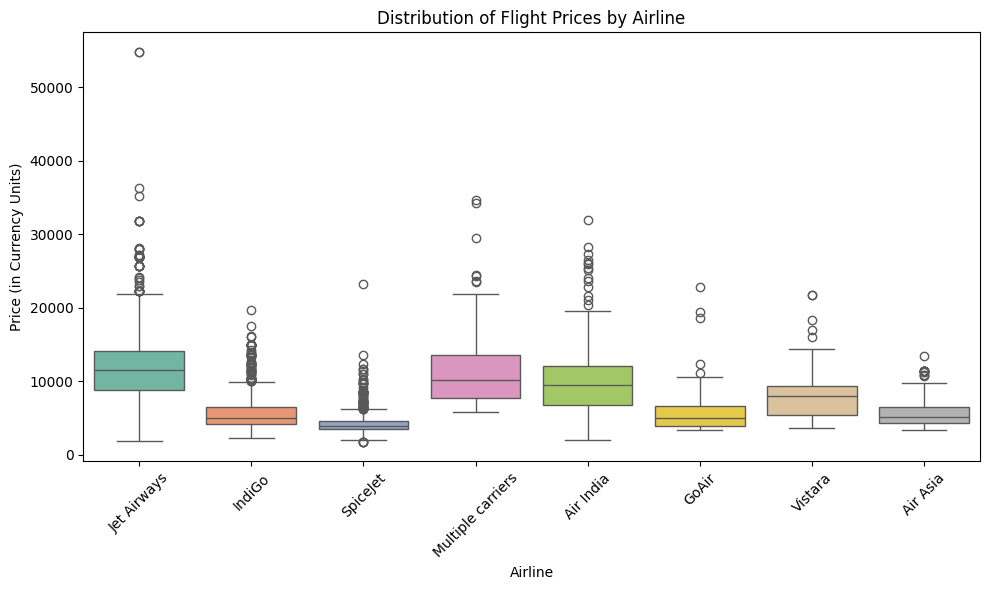

In [ ]:
# Create a box plot of Price by Airline
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=planes, x="Airline", y="Price", hue="Airline", palette="Set2")
ax.set(title="Distribution of Flight Prices by Airline",
       xlabel="Airline",
       ylabel="Price (in Currency Units)")
# Rotate x-axis labels using ax.tick_params
ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

#### Question
How should you deal with the missing values in `"Additional_Info"` and `"Price"`?

**Possible Answers**

1) Remove the `"Additional_Info"` column and impute the mean for missing values of `"Price"`.

2) Remove "No info" values from `"Additional_Info"` and impute the median for missing values of `"Price"`.

3) Remove the "Additional_Info" column and impute the mean by `"Airline"` for missing values of `"Price"`.

4) Remove the "Additional_Info" column and impute the median by `"Airline"` for missing values of `"Price"`.

C:\Users\lerea\AppData\Local\Temp\ipykernel_10572\3056650141.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), ha='right')


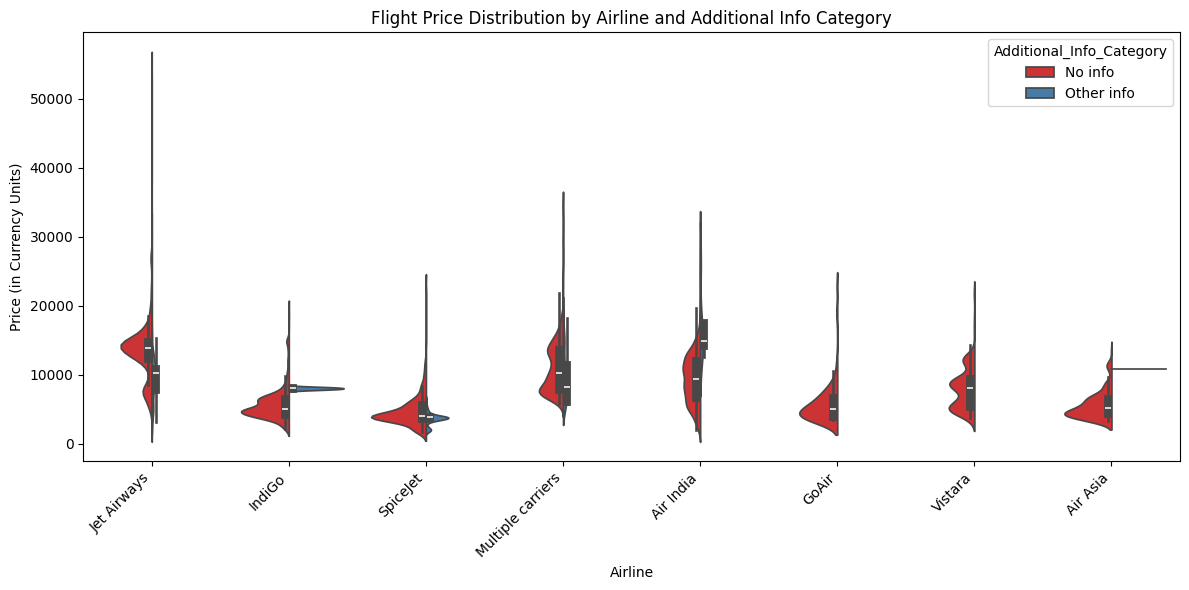

In [ ]:
# Categorize 'Additional_Info' into 'No info' and 'Other info'
planes['Additional_Info_Category'] = planes['Additional_Info'].apply(lambda x: 'No info' if pd.isna(x) or x == 'No info' else 'Other info')

# Create a violin plot of Price by Airline, split by Additional_Info_Category
fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(data=planes, x='Airline', y='Price', hue='Additional_Info_Category', split=True, palette="Set1", ax=ax)
ax.set(title="Flight Price Distribution by Airline and Additional Info Category",
       xlabel="Airline",
       ylabel="Price (in Currency Units)")
# Rotate x-axis labels for better readability using OOP approach
ax.tick_params(axis='x', labelrotation=45)
ax.set_xticklabels(ax.get_xticklabels(), ha='right')
plt.tight_layout()
plt.show()

### Imputing missing plane prices
Now there's just one column with missing values left!

You've removed the `"Additional_Info"` column from planes—the last step is to impute the missing data in the `"Price"` column of the dataset.

As a reminder, you generated this boxplot, which suggested that imputing the median price based on the `"Airline"` is a solid approach!

In [ ]:
planes.dropna(subset="Additional_Info", inplace=True)

In [ ]:
# Calculate median plane ticket prices by Airline after dropping rows with missing 'Additional_Info'
airline_prices = planes.groupby("Airline")["Price"].median()
print(airline_prices)

Airline
Air Asia              5177.0
Air India             9443.0
GoAir                 4959.0
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10010.0
SpiceJet              3873.0
Vistara               8085.0
Name: Price, dtype: float64


In [ ]:
# Convert to a dictionary
prices_dict = airline_prices.to_dict()
display(prices_dict)

{'Air Asia': 5177.0,
 'Air India': 9443.0,
 'GoAir': 4959.0,
 'IndiGo': 5054.0,
 'Jet Airways': 11507.0,
 'Multiple carriers': 10010.0,
 'SpiceJet': 3873.0,
 'Vistara': 8085.0}

In [ ]:
# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isna().sum())

Airline                     0
Date_of_Journey             0
Source                      0
Destination                 0
Route                       0
Dep_Time                    0
Arrival_Time                0
Duration                    0
Total_Stops                 0
Additional_Info             0
Price                       0
Additional_Info_Category    0
dtype: int64


In [ ]:
salaries = pd.read_csv("data/ds_salaries_clean.csv")
#salaries = pd.read_csv("data/ds_salaries.csv")

In [ ]:
# salaries = salaries.rename(columns={"experience_level": "Experience", "employment_type":"Employment_Status", "job_title": "Designation", "company_size":"Company_Size", "salary": "Salary", "employee_residence": "Employee_Location"})

In [ ]:
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0


In [ ]:
display(salaries["Designation"].nunique())

50

### Extracting values from categories
- Current format limits our ability to generate insights
- `pandas.Series.srt.contains()`
-- Search a column for a specific string or multiple strings
`salaries["Designation].str.contains("Scientist")`

In [ ]:
print(salaries["Designation"].str.contains("Scientist"))

0       True
1       True
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool


### Finding multiple phrases in strings
- Words of interest: Machine Learning or AI

In [ ]:
print(salaries["Designation"].str.contains("Machine Learning|AI"))

0      False
1       True
2      False
3      False
4       True
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool


- Words of interest: Any that start with Data

In [ ]:
print(salaries["Designation"].str.contains("^Data"))

0       True
1      False
2      False
3      False
4      False
       ...  
602     True
603     True
604     True
605     True
606    False
Name: Designation, Length: 607, dtype: bool


- Using a list with categories of interest

In [ ]:
job_categories = ["Data Science", "Data Analytics", "Data Engineering", "Machine Learning", "Managerial", "Consultant"]

In [ ]:
data_science = "Data Scientist|NLP"
data_analyst = "Analyst|Analytics"
data_engineer = "Data Engineer|ETL|Architect|Infrastructure"
ml_enngineer = "Machine Learning|ML|Big Data|AI"
manager = "Manager|Head|Director|Lead|Principal|Staff"
consultant = "Consultant|Freelance"

In [ ]:
conditions = [
    (salaries["Designation"].str.contains(data_science)),
    (salaries["Designation"].str.contains(data_analyst)),
    (salaries["Designation"].str.contains(data_engineer)),
    (salaries["Designation"].str.contains(ml_enngineer)),
    (salaries["Designation"].str.contains(manager)),
    (salaries["Designation"].str.contains(consultant))
]

### Creating the categorical column

In [ ]:
salaries["Job_Category"] = np.select(conditions,
                                   job_categories,
                                   default="Other")

In [ ]:
print(salaries[["Designation", "Job_Category"]].head())

                  Designation      Job_Category
0              Data Scientist      Data Science
1  Machine Learning Scientist  Machine Learning
2           Big Data Engineer  Data Engineering
3        Product Data Analyst    Data Analytics
4   Machine Learning Engineer  Machine Learning


### Visualizing job category frequency

C:\Users\lerea\AppData\Local\Temp\ipykernel_10572\978416624.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation_mode='anchor')


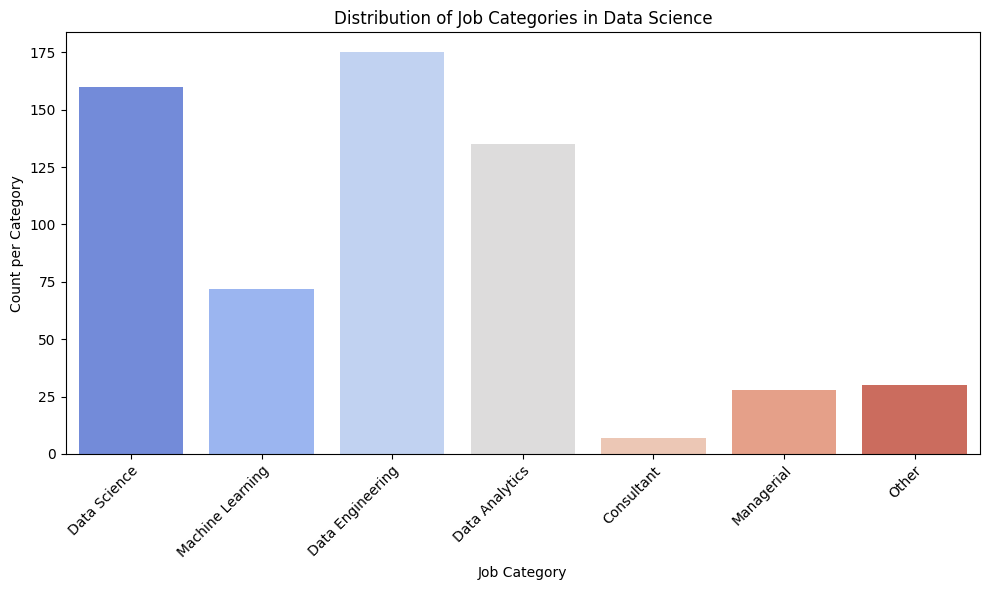

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=salaries, x="Job_Category", hue="Job_Category", palette='coolwarm', ax=ax)
ax.set(title="Distribution of Job Categories in Data Science",
       xlabel="Job Category",
       ylabel="Count per Category")
# Rotate x-axis labels using the OOP approach
ax.tick_params(axis='x', labelrotation=45)
ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation_mode='anchor')
plt.tight_layout()
plt.show()

## Categorical Data Manipulation: From Chaos to Insight

### Transforming Unstructured Text into Analytical Gold

Categorical data often comes in messy, inconsistent formats. Learning to clean, standardize, and extract meaningful categories is essential for effective EDA.

####  **Why Count Unique Values?**

**High Unique Counts Signal:**
1. **Free-text Fields**: User-generated content needing categorization
2. **Inconsistent Encoding**: Same concepts expressed differently
3. **Granular Data**: Detailed information that could be grouped
4. **Data Quality Issues**: Typos, formatting inconsistencies

**Analysis Strategy by Unique Count:**
- **2-10 Unique**: Ready for direct analysis
- **10-50 Unique**: Consider grouping similar categories
- **50-200 Unique**: Requires systematic categorization
- **200+ Unique**: May need text mining or regex patterns

####  **String Analysis Techniques**:

**Pattern Recognition Methods:**
1. **Regex Patterns**: Systematic text matching
2. **String Contains**: Substring searches
3. **String Length**: Character count analysis
4. **Frequency Analysis**: Most common terms

**Common Categorization Patterns:**
- **Time-based**: Duration ranges, date periods
- **Magnitude-based**: Size categories, value ranges
- **Feature-based**: Product attributes, service types
- **Geographic**: Regional groupings, location types

#### **Flight Duration Case Study**:

**Raw Data Challenge:**
- Format: "19h", "5h 25m", "4h 45m"
- Inconsistency: Hours only vs. hours + minutes
- Mixed Formats: Spacing variations, abbreviations

**Categorization Strategy:**
1. **Domain Knowledge**: Aviation industry standards
   - Short-haul: <5 hours (domestic, regional)
   - Medium-haul: 5-10 hours (continental)
   - Long-haul: 10+ hours (intercontinental)

2. **Business Logic**: Operational differences
   - Aircraft types vary by duration
   - Service levels change with flight length
   - Passenger expectations differ

#### **Regex Pattern Design**:

**Pattern Construction Logic:**
```
"^0h|^1h|^2h|^3h|^4h"  # Short-haul pattern
```
- **^**: Start of string anchor
- **|**: OR operator for multiple patterns
- **Digit matching**: Specific hour ranges

**Why This Approach?**
- **Explicit**: Clear business rule implementation
- **Maintainable**: Easy to modify ranges
- **Debuggable**: Can test each pattern component

#### **np.select() vs. Alternatives**:

**np.select() Advantages:**
- **Multiple Conditions**: Handles complex logic elegantly
- **Default Values**: Built-in fallback for unmatched cases
- **Performance**: Vectorized operations for large datasets
- **Readability**: Clear condition-outcome mapping

**Alternative Approaches:**
```python
# Method 1: Multiple if-elif statements (slower)
# Method 2: Dictionary mapping (limited flexibility)
# Method 3: pandas.cut() (for numerical ranges)
```

#### **Categorization Best Practices**:

**Planning Phase:**
1. **Understand Domain**: What categories make business sense?
2. **Examine Distributions**: How are values spread?
3. **Consider Analysis Goals**: What questions will you ask?
4. **Plan for Edge Cases**: How to handle ambiguous values?

**Implementation Phase:**
1. **Start Simple**: Basic categories first
2. **Validate Patterns**: Test regex on sample data
3. **Check Coverage**: Ensure all values are categorized
4. **Document Logic**: Explain categorization rules

**Validation Phase:**
1. **Frequency Analysis**: Do category sizes make sense?
2. **Business Review**: Do categories align with domain knowledge?
3. **Pattern Verification**: Are similar items grouped together?
4. **Edge Case Testing**: Handle unusual inputs gracefully

#### **Advanced Applications**:

**Text Mining Integration:**
- **Keyword Extraction**: Identify common themes
- **Sentiment Analysis**: Categorize by emotional content
- **Topic Modeling**: Discover hidden category structures

**Machine Learning Preparation:**
- **Feature Engineering**: Create predictive categories
- **Dimensionality Reduction**: Group rare categories
- **Encoding Preparation**: Set up for one-hot encoding

In [ ]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("object")
# Loop through columns
for column in non_numeric.columns:
    # Print the number of unique values
    print(f"Number of unique values in {column} column: ", non_numeric[column].nunique())

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Arrival_Time column:  1200
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5
Number of unique values in Additional_Info column:  9
Number of unique values in Additional_Info_Category column:  2


### Flight duration categories
As you saw, there are 362 unique values in the `"Duration"` column of planes. Calling `planes["Duration"].head()`, we see the following values:

```
0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object`
```

Looks like this won't be simple to convert to numbers. However, you could categorize flights by duration and examine the frequency of different flight lengths!

You'll create a `"Duration_Category"` column in the planes DataFrame. Before you can do this you'll need to create a list of the values you would like to insert into the DataFrame, followed by the existing values that these should be created from.

In [ ]:
print(planes["Duration"].head())

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object


## Advanced String Processing: Converting Text to Analytical Features

### From Unstructured Strings to Quantitative Analysis

String manipulation is often the bridge between raw data and meaningful analysis. Mastering regex and string extraction transforms messy text data into powerful analytical features.

#### **Regex Pattern**:

**Pattern Analysis: `r'(?:(\d+)\s*h)?\s*(?:(\d+)\s*m)?'`**

**Component Explanation:**
- **`(?:...)?`**: Non-capturing group (optional)
- **`(\d+)`**: Capturing group for digits
- **`\s*`**: Zero or more whitespace characters
- **`h`**: Literal character 'h'
- **`m`**: Literal character 'm'

**Why This Design?**
1. **Flexibility**: Handles "5h", "25m", "5h 25m", "5h25m"
2. **Robustness**: Optional groups handle missing components
3. **Extraction**: Captures numeric values separately
4. **Whitespace Tolerance**: Accommodates formatting variations

####  **Data Transformation Strategy**:

**Step-by-Step Process:**
1. **Extract Components**: Separate hours and minutes
2. **Handle Missing**: Convert NaN to meaningful defaults
3. **Standardize Format**: Convert to consistent units
4. **Validate Results**: Check for logical consistency

**Mathematical Conversion Logic:**
```
Total Hours = Hours + (Minutes ÷ 60)
```
- **Decimal Format**: Easier for statistical analysis
- **Standardized Units**: Enables comparison and aggregation
- **Precision Control**: Rounding for practical precision

#### **Why Convert to Decimal Hours?**

**Analytical Advantages:**
1. **Statistical Operations**: Mean, median, correlation calculations
2. **Visualization**: Continuous scales for histograms, scatter plots
3. **Modeling**: Numerical features for machine learning
4. **Comparison**: Direct mathematical comparisons

**Business Applications:**
- **Route Planning**: Calculate average flight times
- **Pricing Models**: Duration as pricing factor
- **Operational Analysis**: Efficiency metrics
- **Customer Segmentation**: Preference by flight length

####  **Common String Processing Mistakes**:

**1. Incomplete Pattern Matching:**
```python
# Problematic: Misses variations
pattern = r'(\d+)h (\d+)m'

# Better: Handles optional components
pattern = r'(?:(\d+)\s*h)?\s*(?:(\d+)\s*m)?'
```

**2. Missing Data Handling:**
```python
# Problematic: NaN propagation
hours = extracted_hours

# Better: Explicit NaN handling
hours = extracted_hours.fillna(0)
```

**3. Data Type Issues:**
```python
# Problematic: String arithmetic
total = hours + minutes

# Better: Explicit type conversion
total = hours.astype(int) + minutes.astype(int)
```

####  **Validation Techniques**:

**Sanity Checks:**
1. **Range Validation**: Are durations within expected bounds?
2. **Distribution Analysis**: Does the histogram make sense?
3. **Extreme Value Review**: Investigate outliers
4. **Pattern Coverage**: Did regex capture all formats?

**Quality Metrics:**
- **Extraction Success Rate**: Percentage of successful conversions
- **Missing Data Pattern**: Where did extraction fail?
- **Value Distribution**: Does it match business expectations?

####  **Advanced String Processing Techniques**:

**Regex Alternatives:**
1. **String Methods**: `.split()`, `.replace()`, `.strip()`
2. **Pandas String Accessor**: `.str.extract()`, `.str.contains()`
3. **Natural Language Processing**: For complex text analysis

**Performance Considerations:**
- **Vectorized Operations**: pandas string methods over loops
- **Compiled Regex**: `re.compile()` for repeated use
- **Chunked Processing**: For very large datasets

**Error Handling Strategies:**
```python
# Robust extraction with error handling
try:
    result = data.str.extract(pattern)
except Exception as e:
    logging.warning(f"Extraction failed: {e}")
    result = pd.DataFrame()  # Fallback
```

####  **Feature Engineering Opportunities**:

**Derived Features from Duration:**
- **Flight Categories**: Short/Medium/Long haul
- **Time Zones Crossed**: Estimate from duration
- **Aircraft Type Prediction**: Duration suggests plane size
- **Route Efficiency**: Compare actual vs. theoretical minimum

**Text Analysis Features:**
- **Pattern Complexity**: Number of components in original string
- **Format Consistency**: Standardization level indicator
- **Missing Component Flags**: What information was absent?

In [ ]:
# Create a list of categories
flight_categories = ["Short-haul", "Medium", "Long-haul"]

# Create short-haul values
short_flights = "^0h|^1h|^2h|^3h|^4H"

# Create medium-haul values
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create long-haul values
long_flights = "10h|11h|12h|13h|14h|15h|16h"

### Adding duration categories
Now that you've set up the categories and values you want to capture, it's time to build a new column to analyze the frequency of flights by duration!

The variables `flight_categories`, `short_flights`, `medium_flights`, and long_flights that you previously created are available to you.

Create conditions, a list containing subsets of planes
`["Duration"]` based on `short_flights`, `medium_flights`, and `long_flights`.

Each condition is a boolean Series indicating whether the `'Duration'` string contains the specified patterns.



In [ ]:
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

Create the `"Duration_Category"` column using `np.select()`.

`np.select(conditions, choicelist, default)` assigns values from choicelist based on the corresponding condition being True.

`conditions`: A list of boolean arrays or Series.

`choicelist`: A list of values to be assigned based on the conditions.

`default`: The value to assign when none of the conditions are met.

In [ ]:
planes["Duration_Category"] = np.select(conditions,
                                        flight_categories,
                                        default="Extreme duration")

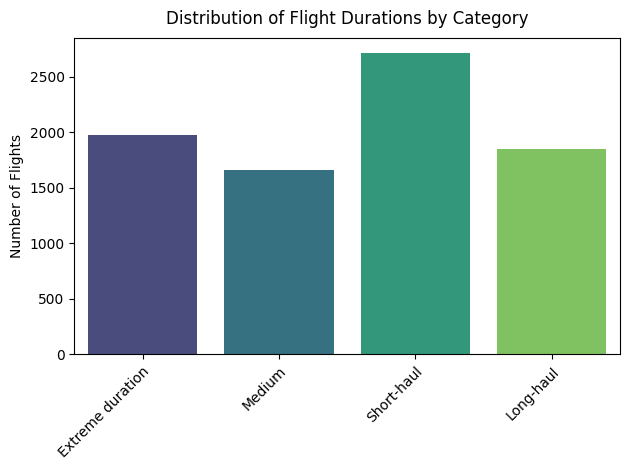

In [ ]:
# Create a plot showing the count of each category.
fig, ax = plt.subplots()

# Use seaborn's countplot to visualize the frequency of each 'Duration_Category'.
sns.countplot(data=planes, x="Duration_Category", hue="Duration_Category", palette="viridis")

# Set the title for the x-axis.
ax.set_title("Distribution of Flight Durations by Category", fontsize=12, pad=10, loc="center")

# Set the label for the x-axis to an empty string.
ax.set_xlabel("")

# Set the label for the y-axis and its font size.
ax.set_ylabel("Number of Flights", fontsize=10)

# Rotate the x-axis labels for better readability, especially with longer category names.
plt.xticks(
    rotation=45,         # Rotate labels by 45 degrees.
    fontsize=10,          # Set the font size of the labels.
    ha="right",          # Horizontal alignment of the labels.
    rotation_mode="anchor" # Ensure the alignment is maintained after rotation.
)

# Adjust layout to prevent labels from overlapping.
plt.tight_layout()
plt.show()

### Work with numerical data

The original salaries dataset

In [ ]:
print(salaries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          607 non-null    int64  
 1   Designation           607 non-null    object 
 2   Experience            607 non-null    object 
 3   Employment_Status     607 non-null    object 
 4   Employee_Location     607 non-null    object 
 5   Company_Size          607 non-null    object 
 6   Remote_Working_Ratio  607 non-null    int64  
 7   Salary_USD            607 non-null    float64
 8   Job_Category          607 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 42.8+ KB
None


### Converting strings to numbers


```
pd.Series.str.replace("characters to remove", "characters to replace them with")
```



```
salaries["Salary_In_Rupees"] = salaries["Salary_In_Rupees"].str.replace("," , "")
```



```
print(salary["Salary_In_Rupees"].head())
```


```
1  20688070.00
2  8674985.00
3  1591390.00
4  11935425.00
5  5729004.00
Name: Satary_In_Rupees, dtype: object
```

Converting strings to numbers
```
salaries["Salary_In_Rupees"] = salaries["Salary_In_Rupees"].astype(float)
```
- 1 Indian Rupee = 0.012 US Dollars

```
salaries["Salary_USD"] = salaries["Salary_In_Rupees"] * 0.012
```


### Adding summary statistics into a DataFrame

In [ ]:
print(salaries.groupby("Company_Size")["Salary_USD"].mean())

Company_Size
L    113857.282828
M    111625.328221
S     74126.313253
Name: Salary_USD, dtype: float64


### Calculate the standard deviation of 'Salary_USD' for each 'Experience' level and add it as a new column.
This is achieved by:
1. Grouping the DataFrame by the `'Experience'` column.
2. Selecting the `'Salary_USD'` column to perform the aggregation on.
3. Using the `.transform()` method with a lambda function `(lambda x: x.std())`.
    - `.transform()` applies a function to each group and returns a Series/DataFrame with the same index as the original DataFrame.
    - The lambda function `x.std()` calculates the standard deviation for each group (each experience level).
    - The result (the standard deviation for each group) is then broadcast back to all rows belonging to that group.

In [ ]:
salaries["std_dev"] = salaries.groupby("Experience")["Salary_USD"].transform(lambda x: x.std())

In [ ]:
print(salaries[["Experience", "std_dev"]].value_counts())

Experience  std_dev      
Senior      55086.264071     280
Mid         61014.876754     213
Entry       42390.355189      88
Executive   111783.576779     26
Name: count, dtype: int64


Repeating the process for other summary statistics

In [ ]:
salaries["median_by_comp_size"] = salaries.groupby("Company_Size")["Salary_USD"].transform(lambda x:x.median())

In [ ]:
print(salaries[["Company_Size", "median_by_comp_size"]].value_counts())

Company_Size  median_by_comp_size
M             108076.0               326
L             95483.0                198
S             62064.0                 83
Name: count, dtype: int64


### Flight duration
You would like to analyze the duration of flights, but unfortunately, the `"Duration"` column in the planes DataFrame currently contains string values.

In [ ]:
# Print the first five values of the "Duration" column.
print(planes["Duration"].head())

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object


- Use .str.extract to capture hours and minutes in two separate columns.
- The regex '(?:(\d+)\s*h)?' matches an optional integer followed by 'h';
- '(?:(\d+)\s*m)?' matches an optional integer followed by 'm'.

In [ ]:
duration_parts = planes["Duration"].str.extract(r'(?:(\d+)\s*h)?\s*(?:(\d+)\s*m)?')
display(duration_parts)

,0,1
0,19,NaN
1,5,25
2,4,45
3,2,25
4,15,30
...,...,...
10654,2,40
10655,2,30
10656,2,35
10658,2,40


- Replace missing values (`NaN`) with '0'.
- Convert both columns to integer dtype.

In [ ]:
hours_series = duration_parts[0].fillna("0").astype(int)
minutes_series = duration_parts[1].fillna("0").astype(int)

- Compute total hours as hours + (minutes / 60.0).


In [ ]:
planes["Duration"] = round(hours_series + (minutes_series / 60.0), 2)
display(planes)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Additional_Info_Category,Duration_Category
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.00,2 stops,No info,13882.0,No info,Extreme duration
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.42,1 stop,No info,6218.0,No info,Medium
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4.75,1 stop,No info,13302.0,No info,Extreme duration
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2.42,non-stop,No info,3873.0,No info,Short-haul
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15.50,1 stop,In-flight meal not included,11087.0,Other info,Long-haul
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10654,SpiceJet,21/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2.67,non-stop,No check-in baggage included,3257.0,Other info,Short-haul
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2.50,non-stop,No info,4107.0,No info,Short-haul
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2.58,non-stop,No info,4145.0,No info,Short-haul
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2.67,non-stop,No info,12648.0,No info,Short-haul


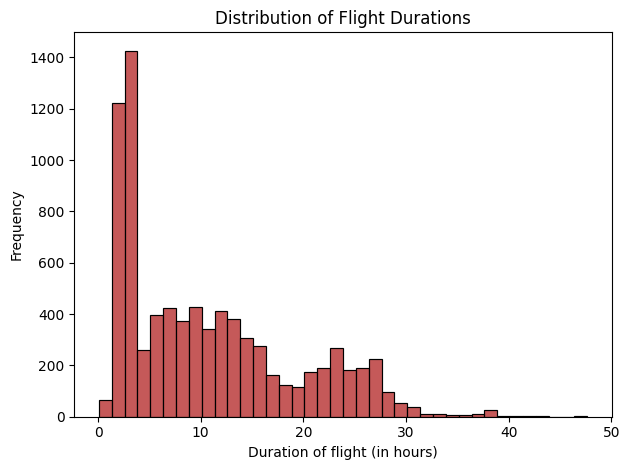

In [ ]:
# Plot a histogram of "Duration" values.
fig, ax = plt.subplots()

sns.histplot(x="Duration", data=planes, color="firebrick")
ax.set(title="Distribution of Flight Durations",
       xlabel="Duration of flight (in hours)",
       ylabel="Frequency")
plt.tight_layout()
plt.show()

### Adding descriptive statistics
Now `"Duration"` and `"Price"` both contain numeric values in the planes DataFrame, you would like to calculate summary statistics for them that are conditional on values in other columns.

In [ ]:
# Add a column to planes containing the standard deviation of "Price" based on "Airline"
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda x:x.std())
print(planes[["Airline", "airline_price_st_dev"]].value_counts())

Airline            airline_price_st_dev
Jet Airways        4189.074664             2964
IndiGo             2218.605260             1585
Air India          3691.028933             1346
Multiple carriers  3516.555826              931
SpiceJet           1799.368945              632
Vistara            2885.765319              362
Air Asia           2000.819195              248
GoAir              2088.432342              140
Name: count, dtype: int64


In [ ]:
# Calculate the median for "Duration" by "Airline", storing it as a column called "airline_median_duration"
planes["airline_median_duration"] = planes.groupby("Airline")["Duration"].transform(lambda x:x.median())
print(planes[["Airline","airline_median_duration"]].value_counts())

Airline            airline_median_duration
Jet Airways        13.33                      2964
IndiGo             2.92                       1585
Air India          15.42                      1346
Multiple carriers  10.25                       931
SpiceJet           2.50                        632
Vistara            3.17                        362
Air Asia           2.83                        248
GoAir              2.92                        140
Name: count, dtype: int64


In [ ]:
# Find the mean "Price" by "Destination", saving it as a column called "price_destination_mean"
planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x:x.mean())
print(planes[["Destination","price_destination_mean"]].value_counts())

Destination  price_destination_mean
Cochin       10445.639760              3506
Banglore     9103.415154               2204
Delhi        5243.953878                954
New Delhi    11586.150215               699
Hyderabad    5210.531993                547
Kolkata      4921.620805                298
Name: count, dtype: int64


## Outlier Detection and Analysis

### Understanding Extreme Values in Context

Outlier detection is both a statistical challenge and a business opportunity. The key is distinguishing between valuable insights and problematic anomalies.

#### **Defining Outliers: Statistical vs. Practical Perspectives**

**Statistical Definition:**
- **Extreme Values**: Observations far from central tendency
- **Distribution Tails**: Beyond expected variation
- **Standard Deviation Rule**: >2-3 standard deviations from mean
- **IQR Method**: Beyond 1.5 × IQR from quartiles

**Business Definition:**
- **Unusual Patterns**: Values inconsistent with business logic
- **Process Exceptions**: Results outside normal operations
- **Opportunity Indicators**: Extreme success or failure cases
- **Data Quality Issues**: Measurement or recording errors

#### **Outlier Detection Methods Comparison**:

**1. Interquartile Range (IQR) Method:**
```
IQR = Q3 - Q1
Lower Bound = Q1 - 1.5 × IQR
Upper Bound = Q3 + 1.5 × IQR
```

**Advantages:**
- **Robust**: Not affected by extreme values
- **Non-parametric**: No distribution assumptions
- **Interpretable**: Clear business meaning
- **Visual**: Direct connection to boxplots

**Limitations:**
- **Fixed Threshold**: May be too conservative/liberal
- **Symmetric Assumption**: Equal treatment of both tails
- **Context Blind**: Doesn't consider business logic

**2. Standard Deviation Method:**
```
Threshold = Mean ± k × Standard Deviation
Common k values: 2, 2.5, 3
```

**Advantages:**
- **Parametric**: Leverages distribution properties
- **Adjustable**: Can modify threshold based on tolerance
- **Statistical Theory**: Well-established foundations

**Limitations:**
- **Sensitive to Outliers**: Mean and SD affected by extremes
- **Normality Assumption**: Requires approximately normal data
- **Less Robust**: Can be skewed by the outliers you're trying to detect

#### **Real Estate Example Analysis**:

**Context Understanding:**
- **Median Price**: $400,000 (typical market)
- **Outlier Price**: $5,000,000 (mansion/luxury property)

**Investigation Framework:**
1. **Location Factors**: Premium neighborhoods, waterfront properties
2. **Property Characteristics**: Size, bedrooms, unique features
3. **Market Conditions**: Supply/demand, seasonal variations
4. **Data Quality**: Currency errors, decimal point mistakes

**Business Implications:**
- **Market Segmentation**: Identify luxury market segment
- **Pricing Strategy**: Understand premium pricing factors
- **Investment Opportunities**: Unusual value propositions
- **Data Cleaning**: Remove erroneous entries

#### **Outlier Decision Framework**:

**Keep Outliers When:**
1. **Business Relevant**: Represent real market phenomena
2. **Well Documented**: Clear explanation for extreme values
3. **Pattern Consistent**: Fit within expanded business model
4. **Valuable Insights**: Provide learning opportunities

**Remove Outliers When:**
1. **Data Errors**: Measurement or recording mistakes
2. **Process Failures**: System malfunctions or anomalies
3. **Scope Mismatch**: Outside analysis boundaries
4. **Statistical Distortion**: Severely skew analysis results

**Transform Outliers When:**
1. **Log Transformation**: For right-skewed distributions
2. **Winsorization**: Cap at percentile thresholds
3. **Categorization**: Group extreme values
4. **Separate Analysis**: Analyze outliers independently

#### 🔬 **Advanced Outlier Detection Techniques**:

**Multivariate Methods:**
- **Mahalanobis Distance**: Considers correlation structure
- **Isolation Forest**: Machine learning approach
- **Local Outlier Factor**: Density-based detection
- **Principal Component Analysis**: Dimensional reduction perspective

**Context-Aware Methods:**
- **Conditional Outliers**: Unusual within subgroups
- **Time Series Outliers**: Considering temporal patterns
- **Regression Outliers**: Unusual prediction residuals
- **Domain-Specific Rules**: Business logic thresholds

#### **Business Applications by Industry**:

**Financial Services:**
- **Fraud Detection**: Unusual transaction patterns
- **Risk Management**: Extreme portfolio exposures
- **Customer Segmentation**: High-value client identification

**Manufacturing:**
- **Quality Control**: Defective product identification
- **Predictive Maintenance**: Unusual equipment behavior
- **Supply Chain**: Delivery time anomalies

**Marketing:**
- **Customer Behavior**: Unusual purchase patterns
- **Campaign Performance**: Exceptional response rates
- **Product Analytics**: Viral content identification

#### **Common Mistakes in Outlier Handling**:

**1. Automatic Removal**: Deleting outliers without investigation
**2. One-Size-Fits-All**: Using same method for all variables
**3. Ignoring Context**: Not considering business meaning
**4. Statistical Only**: Focusing purely on statistical criteria
**5. No Documentation**: Failing to record outlier decisions

#### **Best Practices for Outlier Analysis**:

**Investigation Protocol:**
1. **Visualize First**: Plot data to understand patterns
2. **Multiple Methods**: Use several detection techniques
3. **Business Review**: Consult domain experts
4. **Sensitivity Analysis**: Test impact of different treatments
5. **Document Decisions**: Record rationale for future reference

**Communication Strategy:**
- **Transparent Reporting**: Clearly state outlier handling
- **Impact Assessment**: Show effect on conclusions
- **Alternative Scenarios**: Present results with/without outliers
- **Confidence Intervals**: Acknowledge uncertainty

**Remember**: Outliers are not inherently good or bad - they're information. The art lies in determining what story they're telling and whether it's relevant to your analysis objectives.

### Using descriptive statistics

In [ ]:
print(salaries["Salary_USD"].describe())

count       607.000000
mean     107225.836903
std       67752.393254
min        2730.000000
25%       59893.000000
50%       96982.000000
75%      143225.000000
max      572900.000000
Name: Salary_USD, dtype: float64


###  Using the interquartile range (IQR)

IQR = 75th - 25th percentile

## The Interquartile Range (IQR): A Robust Approach to Outlier Detection

### Understanding Distribution Through Quartiles

The IQR method is one of the most reliable techniques for outlier detection because it's based on the distribution's internal structure rather than assumptions about its shape.

#### **Quartile Foundation**:

**What are Quartiles?**
- **Q1 (25th percentile)**: 25% of data falls below this value
- **Q2 (50th percentile)**: The median - 50% of data falls below
- **Q3 (75th percentile)**: 75% of data falls below this value
- **IQR = Q3 - Q1**: The range containing the middle 50% of data

**Why This Matters:**
- **Robust Statistic**: Unaffected by extreme values
- **Distribution-Free**: Works with any data shape
- **Interpretable**: Clear connection to data percentiles
- **Visual**: Direct relationship to boxplot components

#### **The 1.5 × IQR Rule**:

**Mathematical Definition:**
```
Lower Bound = Q1 - 1.5 × IQR
Upper Bound = Q3 + 1.5 × IQR
Outliers = Values outside [Lower Bound, Upper Bound]
```

**Why 1.5?**
- **Statistical Basis**: For normal distributions, captures ~99.3% of data
- **Practical Balance**: Not too restrictive, not too permissive
- **Tukey's Legacy**: Developed by John Tukey for exploratory data analysis
- **Industry Standard**: Widely accepted across disciplines

#### **IQR vs. Standard Deviation Method**:

**IQR Advantages:**
- **Outlier-Resistant**: IQR itself isn't affected by outliers
- **Non-Parametric**: No assumptions about data distribution
- **Intuitive**: Based on actual data percentiles
- **Conservative**: Less likely to misclassify normal variation

**Standard Deviation Disadvantages:**
- **Outlier-Sensitive**: Mean and SD are influenced by extremes
- **Assumes Normality**: Works best with normal distributions
- **Circular Logic**: Uses outliers to define outliers
- **Less Robust**: Can be misleading with skewed data

In [ ]:
# Extract the salary series
salary_series: pd.Series = salaries["Salary_USD"]

# Compute quartiles
Q1: float = salary_series.quantile(0.25)
median: float = salary_series.median()
Q3: float = salary_series.quantile(0.75)

# Compute the interquartile range
IQR: float = Q3 - Q1

# Identify outliers as those strictly above Q3 + 1.5*IQR (for annotation)
upper_bound: float = Q3 + 1.5 * IQR
outliers: pd.Series = salary_series[salary_series > upper_bound]

### IQR in box plots

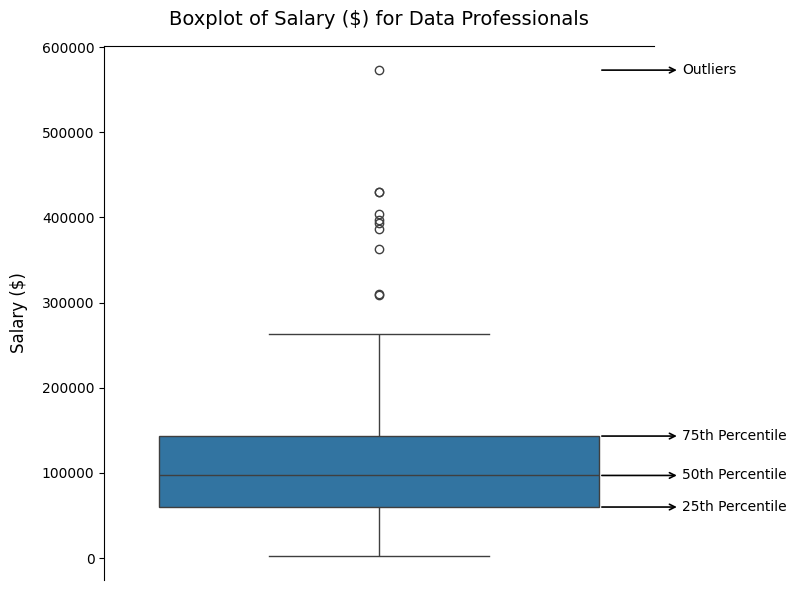

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Create a box plot of the 'Salary_USD' column from the 'salaries' DataFrame.
sns.boxplot(data=salaries, y="Salary_USD", ax=ax)

# Set the title of the plot, including font size and padding.
ax.set_title("Boxplot of Salary ($) for Data Professionals", fontsize=14, pad=15)
# Set an empty string for the x-axis label as it's a single box plot.
ax.set_xlabel("")
# Set the label for the y-axis, indicating the variable being plotted and its unit.
ax.set_ylabel("Salary ($)", fontsize=12, labelpad=10)

# Annotations for statistical measures
# Define the x-coordinate for the annotations, positioned slightly to the right of the box.
x_box = 0.4

# Define keyword arguments for the arrows used in annotations.
arrow_kw = dict(arrowstyle="<-", lw=1.2, color="black")

# Annotate the 25th percentile (Q1).
# xy: The point to annotate (x, y coordinates on the plot).
# xytext: The position of the annotation text.
# textcoords="offset points": Specifies that xytext is an offset from xy.
# va="center", ha="left": Vertical and horizontal alignment of the text.
# arrowprops: Dictionary of arrow properties.
ax.annotate("25th Percentile",
            xy=(x_box, Q1),
            xytext=(60, 0), textcoords="offset points",
            va="center", ha="left",
            arrowprops=arrow_kw)

# Annotate the 50th percentile (Median).
# The median is the middle value of the dataset when sorted.
ax.annotate("50th Percentile",
            xy=(x_box, median),
            xytext=(60, 0), textcoords="offset points",
            va="center", ha="left",
            arrowprops=arrow_kw)

# Annotate the 75th percentile (Q3).
ax.annotate("75th Percentile",
            xy=(x_box, Q3),
            xytext=(60, 0), textcoords="offset points",
            va="center", ha="left",
            arrowprops=arrow_kw)

# Annotate outliers if they exist.
# Outliers are typically defined as values falling below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.
if not outliers.empty:
    top = outliers.max()
    ax.annotate("Outliers",
                xy=(x_box, top),
                xytext=(60, 0), textcoords="offset points",
                va="center", ha="left",
                arrowprops=arrow_kw)

# Set the limits for the x-axis.
ax.set_xlim(-0.5, 0.5)
# Hide the right and bottom spines (borders) of the plot for a cleaner look.
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
# Remove the x-axis ticks as they are not needed for a single box plot.
ax.set_xticks([])

plt.tight_layout()
plt.show()

### Identifying thresholds

In [ ]:
# 75th percentile
seventy_fifth = salaries["Salary_USD"].quantile(0.75)

# 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# Interquartile range
salaries_iqr = seventy_fifth - twenty_fifth

print(salaries_iqr)

83332.0


In [ ]:
# Upper threshold
upper = seventy_fifth + (1.5 * salaries_iqr)

# Lower threshold
lower = twenty_fifth - (1.5 * salaries_iqr)

print(upper, lower)

268223.0 -65105.0


### Subsetting our data

In [ ]:
salaries[(salaries["Salary_USD"] < lower) | (salaries["Salary_USD"] > upper)][["Experience", "Employee_Location", "Salary_USD"]]

,Experience,Employee_Location,Salary_USD
25,Executive,US,310321.0
33,Mid,US,429675.0
63,Senior,US,393392.0
97,Mid,US,429675.0
157,Mid,US,403895.0
225,Executive,US,397211.0
252,Executive,US,572900.0
482,Executive,US,309366.0
519,Senior,US,362837.0
523,Senior,US,386708.0


### Why look for outliers?

- Outliers are extreme values
*- may not accurately represent our data
- Can change the mean and standard deviation
- Statistical tests and machine learning models need normally distributed data


### What to do about outliers?
- Why do these outliers exist?
-- More senior roles / different countries pay more
-- Consider leaving them in nthe dataset

- Is the data accurate?
-- Could there have been an error in data collection?
-- If so, remove them.



### Dropping outliers

In [ ]:
no_outliers = salaries[(salaries["Salary_USD"] > lower) & (salaries["Salary_USD"] < upper)]

In [ ]:
print(no_outliers["Salary_USD"].describe())

count       597.000000
mean     102328.480737
std       55910.790653
min        2730.000000
25%       59819.000000
50%       95483.000000
75%      141565.000000
max      263534.000000
Name: Salary_USD, dtype: float64


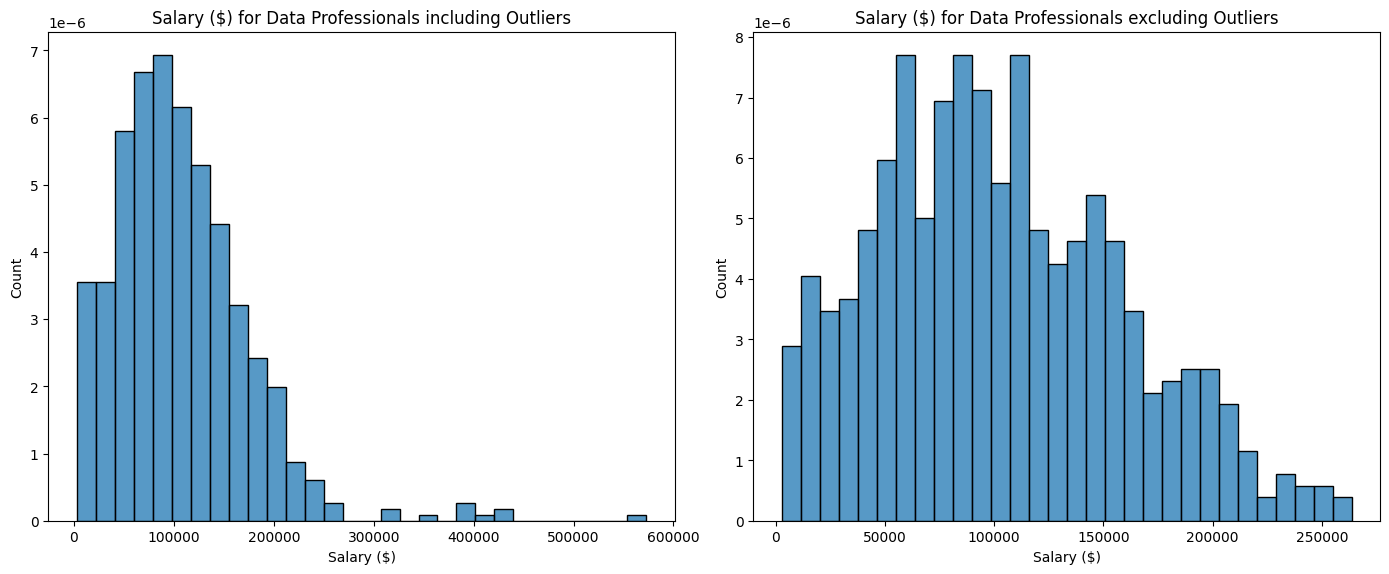

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.histplot(data=salaries, x="Salary_USD", ax=ax1, stat="density", element="bars", bins=30)
ax1.set(title="Salary ($) for Data Professionals including Outliers",
        xlabel="Salary ($)",
        ylabel="Count")

sns.histplot(data=no_outliers, x="Salary_USD", ax=ax2, stat="density", element="bars", bins=30)
ax2.set(title="Salary ($) for Data Professionals excluding Outliers",
        xlabel="Salary ($)",
        ylabel="Count")

plt.tight_layout()
plt.show()

## Visual Outlier Detection: Reading the Story in Distribution Shapes

### Histograms as Outlier Detection Tools

Before applying statistical methods, visual inspection through histograms provides crucial insights about outlier patterns and distribution characteristics.

####  **What Histograms Reveal About Outliers**:

**Distribution Shape Indicators:**
1. **Right Skewness**: Long tail extending to higher values
2. **Left Skewness**: Long tail extending to lower values
3. **Bimodal Patterns**: Two peaks suggesting subgroups
4. **Gaps**: Empty bins indicating potential outliers
5. **Isolated Bars**: Single observations far from main distribution

**Visual Outlier Signatures:**
- **Sparse Tail Bins**: Few observations in extreme ranges
- **Sudden Drop-offs**: Sharp transitions from dense to empty bins
- **Isolated Peaks**: Small clusters separated from main distribution
- **Extended Range**: Much wider range than expected

####  **Flight Data Context**:

**Price Distribution Expectations:**
- **Right Skewed**: Most flights reasonably priced, few very expensive
- **Potential Outliers**: First-class, international routes, peak travel
- **Business Logic**: Premium services justify higher prices
- **Data Quality Concerns**: Currency errors, decimal point mistakes

**Duration Distribution Expectations:**
- **Right Skewed**: More short/medium flights than long-haul
- **Natural Boundaries**: Physical limits on commercial flight duration
- **Potential Outliers**: Transcontinental routes, technical stops
- **Data Quality Concerns**: Format inconsistencies, parsing errors

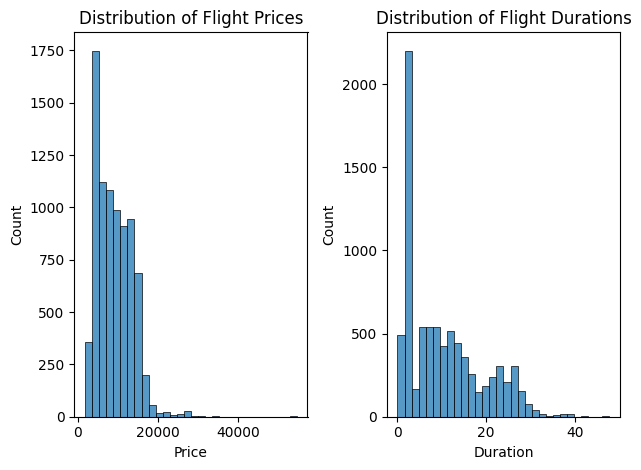

In [ ]:
# Plot a histogram of flight prices and duration to visually inspect for outliers
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
sns.histplot(data=planes, x="Price", ax=ax1, bins=30)
ax1.set_title("Distribution of Flight Prices") # Add title for clarity
sns.histplot(data=planes, x="Duration", ax=ax2, bins=30)
ax2.set_title("Distribution of Flight Durations") # Add title for clarity
plt.tight_layout()
plt.show()

### Calculating IQR for Outlier Detection in "Price"

The Interquartile Range (IQR) is a common method for identifying outliers. It measures the spread of the middle 50% of the data.

- **Q1 (25th percentile)**: The value below which 25% of the data falls.
- **Q3 (75th percentile)**: The value below which 75% of the data falls.
- **IQR = Q3 - Q1**

Outliers are typically defined as values that fall below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR`.

In [ ]:
# Calculate the 75th percentile for 'Price'
price_seventy_fifth = planes["Price"].quantile(0.75)
# Calculate the 25th percentile for 'Price'
price_twenty_fifth = planes["Price"].quantile(0.25)

# Calculate the Interquartile Range (IQR) for 'Price'
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the upper threshold for outlier detection
upper = price_seventy_fifth + (1.5 * prices_iqr)
# Calculate the lower threshold for outlier detection
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Print the calculated thresholds and IQR for transparency
print(f"Upper threshold for Price: {upper}")
print(f"Lower threshold for Price: {lower}")
print(f"IQR for Price: {prices_iqr}")

Upper threshold for Price: 22763.0
Lower threshold for Price: -5293.0
IQR for Price: 7014.0


## Outlier Filtering: Strategic Decisions for Data Integrity

### Balancing Statistical Rigor with Analytical Objectives

Removing outliers is one of the most consequential decisions in data analysis. The choice affects sample composition, statistical power, and the generalizability of your conclusions.

####  **Decision Framework for Outlier Treatment**:

**Critical Questions to Answer:**
1. **Analysis Purpose**: What are you trying to accomplish?
2. **Outlier Nature**: Are they errors or legitimate extreme values?
3. **Population Scope**: Do outliers represent your target population?
4. **Statistical Impact**: How do outliers affect key metrics and relationships?
5. **Business Context**: What do extreme values mean for decision-making?

####  **Impact Assessment Before Filtering**:

**Quantitative Metrics to Calculate:**
- **Sample Size Reduction**: How many observations will be lost?
- **Central Tendency Shift**: How do mean/median change?
- **Variability Change**: Impact on standard deviation and range
- **Distribution Shape**: Effect on skewness and kurtosis
- **Relationship Strength**: Changes in correlations and associations

####  **Flight Price Filtering: Business Implications**:

**What We're Potentially Removing:**
1. **Premium Products**: First-class, business-class tickets
2. **Peak Demand**: Holiday travel, special events
3. **Route Premiums**: Exclusive destinations, limited competition
4. **Error Fares**: Pricing mistakes (both high and low)
5. **Luxury Services**: Private jets, chartered flights

**What We're Potentially Keeping:**
1. **Economy Travel**: Standard coach tickets
2. **Competitive Routes**: Multiple airline options
3. **Off-Peak Travel**: Normal demand periods
4. **Promotional Fares**: Regular discount offerings

In [ ]:
planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]


### Verifying Price Distribution After Outlier Removal

After removing outliers, it's good practice to check the descriptive statistics of the "Price" column again. We expect to see a more constrained range and potentially a mean value closer to the median if the outliers were significantly skewing the data.

In [ ]:
print(planes["Price"].describe())


count     8141.000000
mean      8872.072718
std       4002.453551
min       1759.000000
25%       5224.000000
50%       8372.000000
75%      12121.000000
max      22270.000000
Name: Price, dtype: float64


In [ ]:
# Display descriptive statistics for the 'Price' column after outlier removal
# This helps to understand the impact of the outlier removal process on the distribution of 'Price'.
print(planes["Price"].describe())
# Filter the DataFrame to keep only rows where 'Price' is within the calculated lower and upper bounds
# This removes potential outliers based on the IQR method.
planes = planes[(planes["Price"] >= lower) & (planes["Price"] <= upper)]

# Check the shape of the DataFrame after outlier removal to see how many rows were affected
print(f"Shape after outlier removal: {planes.shape}")


count     8141.000000
mean      8872.072718
std       4002.453551
min       1759.000000
25%       5224.000000
50%       8372.000000
75%      12121.000000
max      22270.000000
Name: Price, dtype: float64
Shape after outlier removal: (8141, 16)


## Relationships in Data
Variables in datasets don't exist in a vacuum; they have relationships with each other. In this chapter, you'll look at relationships across numerical, categorical, and even DateTime data, exploring the direction and strength of these relationships as well as ways to visualize them.

## Understanding Relationships in Data

### From Isolated Variables to Connected Understanding

The true power of data analysis emerges not from studying variables in isolation, but from understanding how they relate to each other. Relationships reveal causation, correlation, patterns, and the underlying structure that drives business outcomes.

#### **Why Relationships Matter in Data Science**:

**Analytical Power:**
1. **Prediction**: Understanding X helps predict Y
2. **Explanation**: Relationships reveal "why" behind patterns
3. **Optimization**: Knowing relationships enables better decisions
4. **Validation**: Relationships confirm or challenge assumptions

**Business Impact:**
- **Customer Behavior**: How demographics relate to purchasing
- **Operational Efficiency**: How inputs affect outputs
- **Risk Management**: How factors combine to create risk
- **Strategic Planning**: How market conditions affect performance

#### **Types of Relationships to Explore**:

**1. Numerical-Numerical Relationships:**
- **Linear**: Straight-line relationships (correlation)
- **Non-linear**: Curved or complex patterns
- **Monotonic**: Consistently increasing or decreasing
- **Examples**: Price vs. Quality, Experience vs. Salary

**2. Categorical-Numerical Relationships:**
- **Group Differences**: How categories affect numerical outcomes
- **Distributions**: How numerical variables vary across groups
- **Examples**: Department vs. Salary, Region vs. Sales

**3. Categorical-Categorical Relationships:**
- **Association**: How categories relate to each other
- **Dependency**: Conditional relationships between categories
- **Examples**: Education Level vs. Job Title, Region vs. Product Preference

**4. Temporal Relationships:**
- **Time Series**: How variables change over time
- **Seasonality**: Cyclical patterns in relationships
- **Trends**: Long-term directional changes
- **Examples**: Sales over Time, Customer Acquisition by Month

### Patterns over time

In [ ]:
divorce = pd.read_csv("data/divorce.csv")
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


### Importing DateTime data
- DateTime data needs to be explicitly declared to Pandas
- Use `pd.to_datetime()` to convert strings to DateTime objects
- Use or `parse_dates` to load DateTime data from a CSV file

## DateTime Data: Unlocking Temporal Patterns in Analysis

### Time as the Fourth Dimension of Data

DateTime data adds a crucial temporal dimension to analysis, enabling us to understand not just what happened, but when it happened and how patterns evolve over time.

#### **Why DateTime Data Requires Special Handling**:

1. **Format Variability**: "2023-01-15", "Jan 15, 2023", "15/01/2023"
2. **Time Zones**: Global data across different temporal references
3. **Precision Levels**: Years, months, days, hours, seconds, milliseconds
4. **Missing Periods**: Gaps in temporal sequences
5. **Irregular Frequency**: Uneven time intervals between observations

**Analytical Opportunities:**
1. **Trend Analysis**: Long-term directional changes
2. **Seasonality Detection**: Regular cyclical patterns
3. **Event Impact**: How specific moments affect outcomes
4. **Forecasting**: Predicting future values from historical patterns
5. **Causal Inference**: Understanding temporal precedence

#### **pandas DateTime Conversion Methods**:

**Method 1: pd.to_datetime() - Post-Loading Conversion**
```python
# Convert string column to datetime
df['date_column'] = pd.to_datetime(df['date_column'])

# Handle multiple formats automatically
df['date_column'] = pd.to_datetime(df['date_column'], infer_datetime_format=True)

# Specify format for better performance
df['date_column'] = pd.to_datetime(df['date_column'], format='%Y-%m-%d')

# Handle errors gracefully
df['date_column'] = pd.to_datetime(df['date_column'], errors='coerce')
```

**Method 2: parse_dates - Loading-Time Conversion**
```python
# Convert during CSV reading
df = pd.read_csv('file.csv', parse_dates=['date_column'])

# Multiple date columns
df = pd.read_csv('file.csv', parse_dates=['start_date', 'end_date'])

# Combine multiple columns into single datetime
df = pd.read_csv('file.csv', parse_dates={'datetime': ['date', 'time']})
```

In [ ]:
divorce.dtypes

divorce_date          object
dob_man               object
education_man         object
income_man           float64
dob_woman             object
education_woman       object
income_woman         float64
marriage_date         object
marriage_duration    float64
num_kids             float64
dtype: object

In [ ]:
divorce = pd.read_csv("data/divorce.csv", parse_dates=["divorce_date", "marriage_date", "dob_man", "dob_woman"])
divorce.dtypes

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

In [ ]:
# pd.to_datetime() converts arguments to DateTime data
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])
divorce.dtypes

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

In [ ]:
divorce.head(2)

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN


### Alternative approach for separate date columns
If we had separate columns for month, day, and year (e.g., `month`, `day`, `year`), we could combine them into a single DateTime column using `pd.to_datetime()` with a list of column names:

In [ ]:
# divorce["marriage_date"] = pd.to_datetime(divorce[["month", "day", "year"]])
# divorce.head(2)

### Creating DateTime data
Extract parts of a full date using `dt.month`, `dt.day`, and `dt.year` attributes


In [ ]:
divorce["marriage_month"] = divorce["marriage_date"].dt.month
divorce.head()


,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,marriage_month
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,6
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN,9
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0,2
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN,5
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN,8


### Visualizing patterns over time


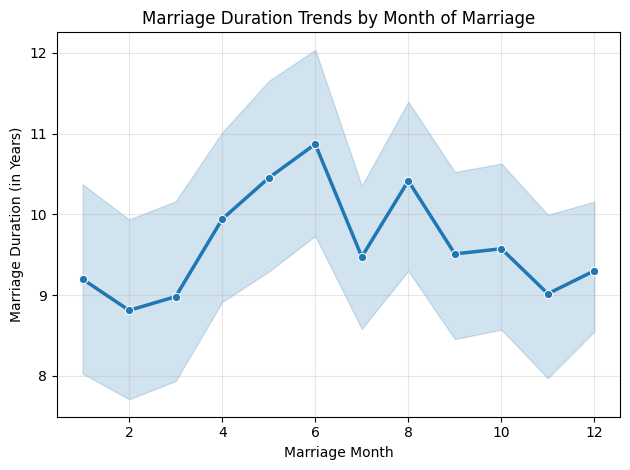

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(data=divorce, x="marriage_month", y="marriage_duration", marker='o', linewidth=2.5, ax=ax)
ax.set(title="Marriage Duration Trends by Month of Marriage",
       xlabel="Marriage Month",
       ylabel="Marriage Duration (in Years)")
# Add grid for better readability
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Define the marriage_year column
divorce["marriage_year"] = divorce["marriage_date"].dt.year

Create a line plot showing the average number of kids a couple had during their marriage, arranged by the year that the couple got married.

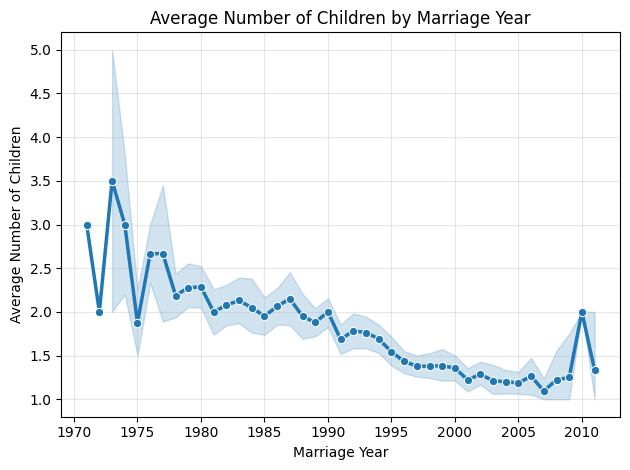

In [ ]:
fig, ax = plt.subplots()

sns.lineplot(data=divorce, x="marriage_year",
             y="num_kids", marker ='o', linewidth=2.5, ax=ax)
ax.set(title="Average Number of Children by Marriage Year",
       xlabel="Marriage Year",
       ylabel="Average Number of Children")

ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Correlation

- Describes direction and strength of relationship between two variables
- Can help us use variables to predict future outcomes

In [ ]:
divorce.select_dtypes(include='number').corr().round(3)

,income_man,income_woman,marriage_duration,num_kids,marriage_month,marriage_year
income_man,1.000,0.318,0.085,0.041,0.014,0.019
income_woman,0.318,1.000,0.079,-0.018,0.041,0.026
marriage_duration,0.085,0.079,1.000,0.447,0.001,-0.812
num_kids,0.041,-0.018,0.447,1.000,-0.001,-0.461
marriage_month,0.014,0.041,0.001,-0.001,1.000,-0.011
marriage_year,0.019,0.026,-0.812,-0.461,-0.011,1.000


- `.corr()` calculates Pearson correlation coefficient, measuring linear relationship

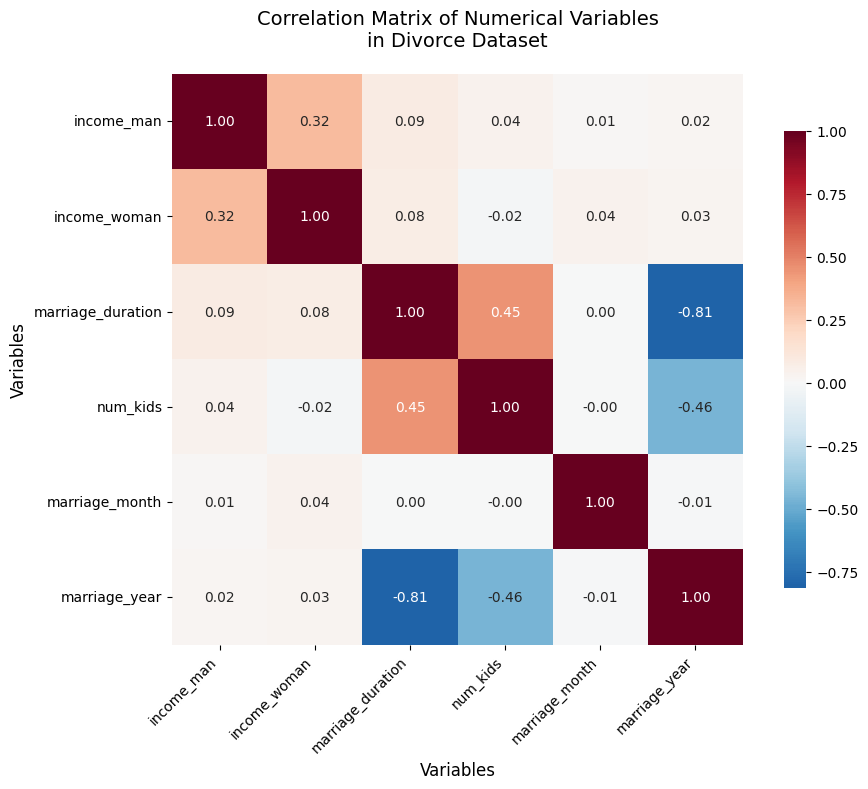

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
correlation_matrix = divorce.select_dtypes(include='number').corr()

sns.heatmap(correlation_matrix, annot=True, center=0, cmap='RdBu_r', square=True, fmt='.2f', cbar_kws={'shrink': 0.8},
            ax=ax)

ax.set_title('Correlation Matrix of Numerical Variables\nin Divorce Dataset',
             fontsize=14, pad=20)
ax.set_xlabel('Variables', fontsize=12)
ax.set_ylabel('Variables', fontsize=12)

# Rotate labels for better readability
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

### Correlation in context

## Correlation in Context: From Statistics to Business Strategy

### Translating Statistical Relationships into Actionable Insights

Correlation analysis becomes powerful when combined with domain knowledge, business context, and careful interpretation of what relationships mean for decision-making.

#### **Contextual Correlation Analysis Framework**:

**Statistical Foundation:**
- **Pearson Correlation**: Linear relationships between continuous variables
- **Spearman Correlation**: Monotonic relationships (rank-based)
- **Kendall's Tau**: Robust alternative for small samples
- **Point-Biserial**: Correlation between continuous and binary variables

**Business Context Integration:**
1. **Domain Knowledge**: What relationships should exist theoretically?
2. **Temporal Logic**: Does the timing of variables make causal sense?
3. **Practical Significance**: Is the correlation large enough to matter?
4. **Economic Impact**: What would acting on this relationship cost/benefit?

#### **Temporal Considerations in Relationship Analysis**:

**Time-Based Insights:**
- **Event Studies**: How relationships change around specific events
- **Seasonal Patterns**: Correlations that vary by time of year
- **Trend Analysis**: How relationships evolve over time
- **Lag Effects**: Variables that affect each other with delays

**Divorce Data Temporal Context:**
- **Economic Cycles**: How recessions affect divorce-income relationships
- **Legal Changes**: Policy impacts on divorce patterns
- **Social Trends**: Changing gender roles over time
- **Cohort Effects**: Different patterns for different marriage generations

#### **Advanced Correlation Techniques**:

**Partial Correlation:**
- **Purpose**: Control for confounding variables
- **Example**: Income correlation controlling for education
- **Interpretation**: "Pure" relationship between two variables

**Rolling Correlation:**
- **Purpose**: Track relationship stability over time
- **Example**: How income correlation changes over marriage duration
- **Interpretation**: Relationship strength evolution

**Conditional Correlation:**
- **Purpose**: Examine relationships within subgroups
- **Example**: Income correlation by education level
- **Interpretation**: Context-dependent relationships

#### **Multi-Variable Relationship Exploration**:

**Correlation Matrix Analysis:**
```python
# Calculate comprehensive correlation matrix
corr_matrix = df[numeric_columns].corr()

# Visualize with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Variable Correlation Matrix')
```

**Network Analysis:**
- **Strong Correlations**: Create relationship networks
- **Clustering**: Identify groups of related variables
- **Centrality**: Find most connected variables
- **Interpretation**: Understand variable importance in system

#### **Correlation vs. Causation**:

**Evidence for Causation:**
1. **Temporal Precedence**: Cause precedes effect
2. **Mechanism**: Plausible explanation for how X affects Y
3. **Dose-Response**: Stronger X associated with stronger Y
4. **Consistency**: Relationship holds across contexts
5. **Control**: Relationship persists when controlling confounds

**Alternative Explanations:**
- **Reverse Causation**: Y actually causes X
- **Common Cause**: Z causes both X and Y
- **Selection Bias**: Sample systematically excludes certain cases
- **Measurement Error**: Spurious correlation from data quality issues

#### **Business Application Strategies**:

**Predictive Modeling:**
- **Feature Selection**: Use correlation to identify important predictors
- **Multicollinearity**: Detect problematic variable correlations
- **Interaction Effects**: Find variables that amplify each other

**Risk Management:**
- **Portfolio Diversification**: Seek uncorrelated assets
- **Early Warning Systems**: Monitor correlation breakdowns
- **Scenario Planning**: Understand relationship stability

**Strategic Planning:**
- **Resource Allocation**: Invest in variables with strong outcome correlations
- **Performance Metrics**: Choose KPIs with proven relationships
- **Market Understanding**: Map customer behavior correlations

#### **Communication Best Practices**:

**Statistical Reporting:**
- **Effect Size**: Report correlation magnitude, not just significance
- **Confidence Intervals**: Show uncertainty in relationship estimates
- **Sample Size**: Acknowledge statistical power limitations
- **Multiple Testing**: Adjust for exploring many relationships

**Business Communication:**
- **Practical Significance**: Translate correlations to business impact
- **Limitations**: Acknowledge what correlations cannot tell us
- **Recommendations**: Connect insights to specific actions
- **Uncertainty**: Communicate confidence levels appropriately

**Remember**: Correlation is the beginning of insight, not the end. The most valuable analysis combines statistical rigor with deep business understanding to transform relationships into strategic advantages.

In [ ]:
divorce["divorce_date"].min()

Timestamp('2000-01-08 00:00:00')

In [ ]:
divorce["divorce_date"].max()

Timestamp('2015-11-03 00:00:00')

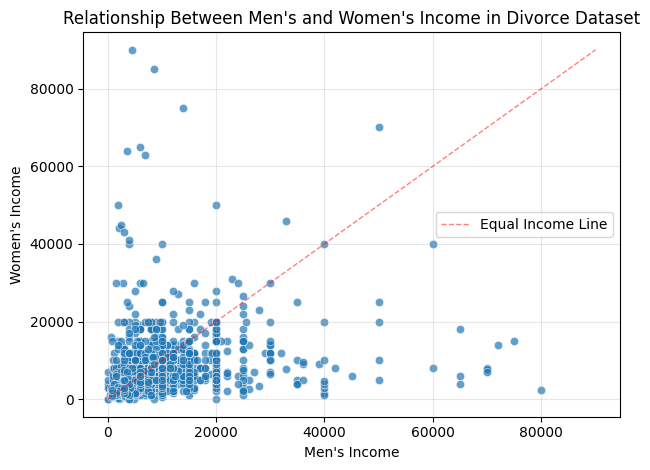

In [ ]:
fig, ax = plt.subplots()

sns.scatterplot(data=divorce, x="income_man", y="income_woman", alpha=0.7, ax=ax)
ax.set(title="Relationship Between Men's and Women's Income in Divorce Dataset",
    xlabel="Men's Income",
    ylabel="Women's Income")

# Add a diagonal reference line to show income equality
min_income = min(divorce["income_man"].min(), divorce["income_woman"].min())
max_income = max(divorce["income_man"].max(), divorce["income_woman"].max())
ax.plot([min_income, max_income], [min_income, max_income],
     'r--', alpha=0.5, linewidth=1, label='Equal Income Line')

ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Correlation Analysis and Pairplots: Mapping Variable Relationships

### Systematic Exploration of Multi-Dimensional Relationships

Pairplots provide a comprehensive view of relationships across multiple variables simultaneously, revealing patterns that might be missed when examining variables in isolation.

####  **Understanding Correlation in Context**:

**What Correlation Measures:**
- **Strength**: How closely variables move together (0 to 1)
- **Direction**: Positive or negative relationship (-1 to +1)
- **Linearity**: How well a straight line fits the relationship

**Correlation Interpretation:**
- **|r| > 0.7**: Strong relationship
- **0.3 < |r| < 0.7**: Moderate relationship  
- **|r| < 0.3**: Weak relationship
- **r = 0**: No linear relationship (but non-linear may exist)

####  **Pairplot Components Explained**:

**Diagonal Elements:**
- **Histograms**: Show distribution of individual variables
- **Density Plots**: Smooth distribution curves
- **Purpose**: Understand individual variable characteristics

**Off-Diagonal Elements:**
- **Scatter Plots**: Show relationships between variable pairs
- **Regression Lines**: Linear trend visualization
- **Purpose**: Identify correlation patterns and outliers

####  **Divorce Dataset Context: Research Applications**:

**Income Relationship Analysis:**
- **Gender Pay Gap**: Comparison of men's vs. women's income
- **Economic Equality**: How income parity affects relationships
- **Socioeconomic Factors**: Income level impact on divorce likelihood

**Marriage Duration Insights:**
- **Economic Stability**: How income relates to marriage longevity
- **Life Course Patterns**: Income changes over marriage duration
- **Risk Factors**: Economic indicators of relationship stress

#### **Strategic Variable Selection**:

**Why Limit Variables in Pairplots?**
1. **Visual Clarity**: Too many variables create cluttered displays
2. **Cognitive Load**: Easier to interpret fewer relationships
3. **Statistical Power**: Focus on theoretically important variables
4. **Practical Utility**: Highlight actionable relationships

**Selection Criteria:**
- **Business Relevance**: Variables important for decision-making
- **Statistical Significance**: Variables with strong relationships
- **Causal Logic**: Variables with plausible causal connections
- **Data Quality**: Variables with complete, reliable data

This one is very difficult to interpret

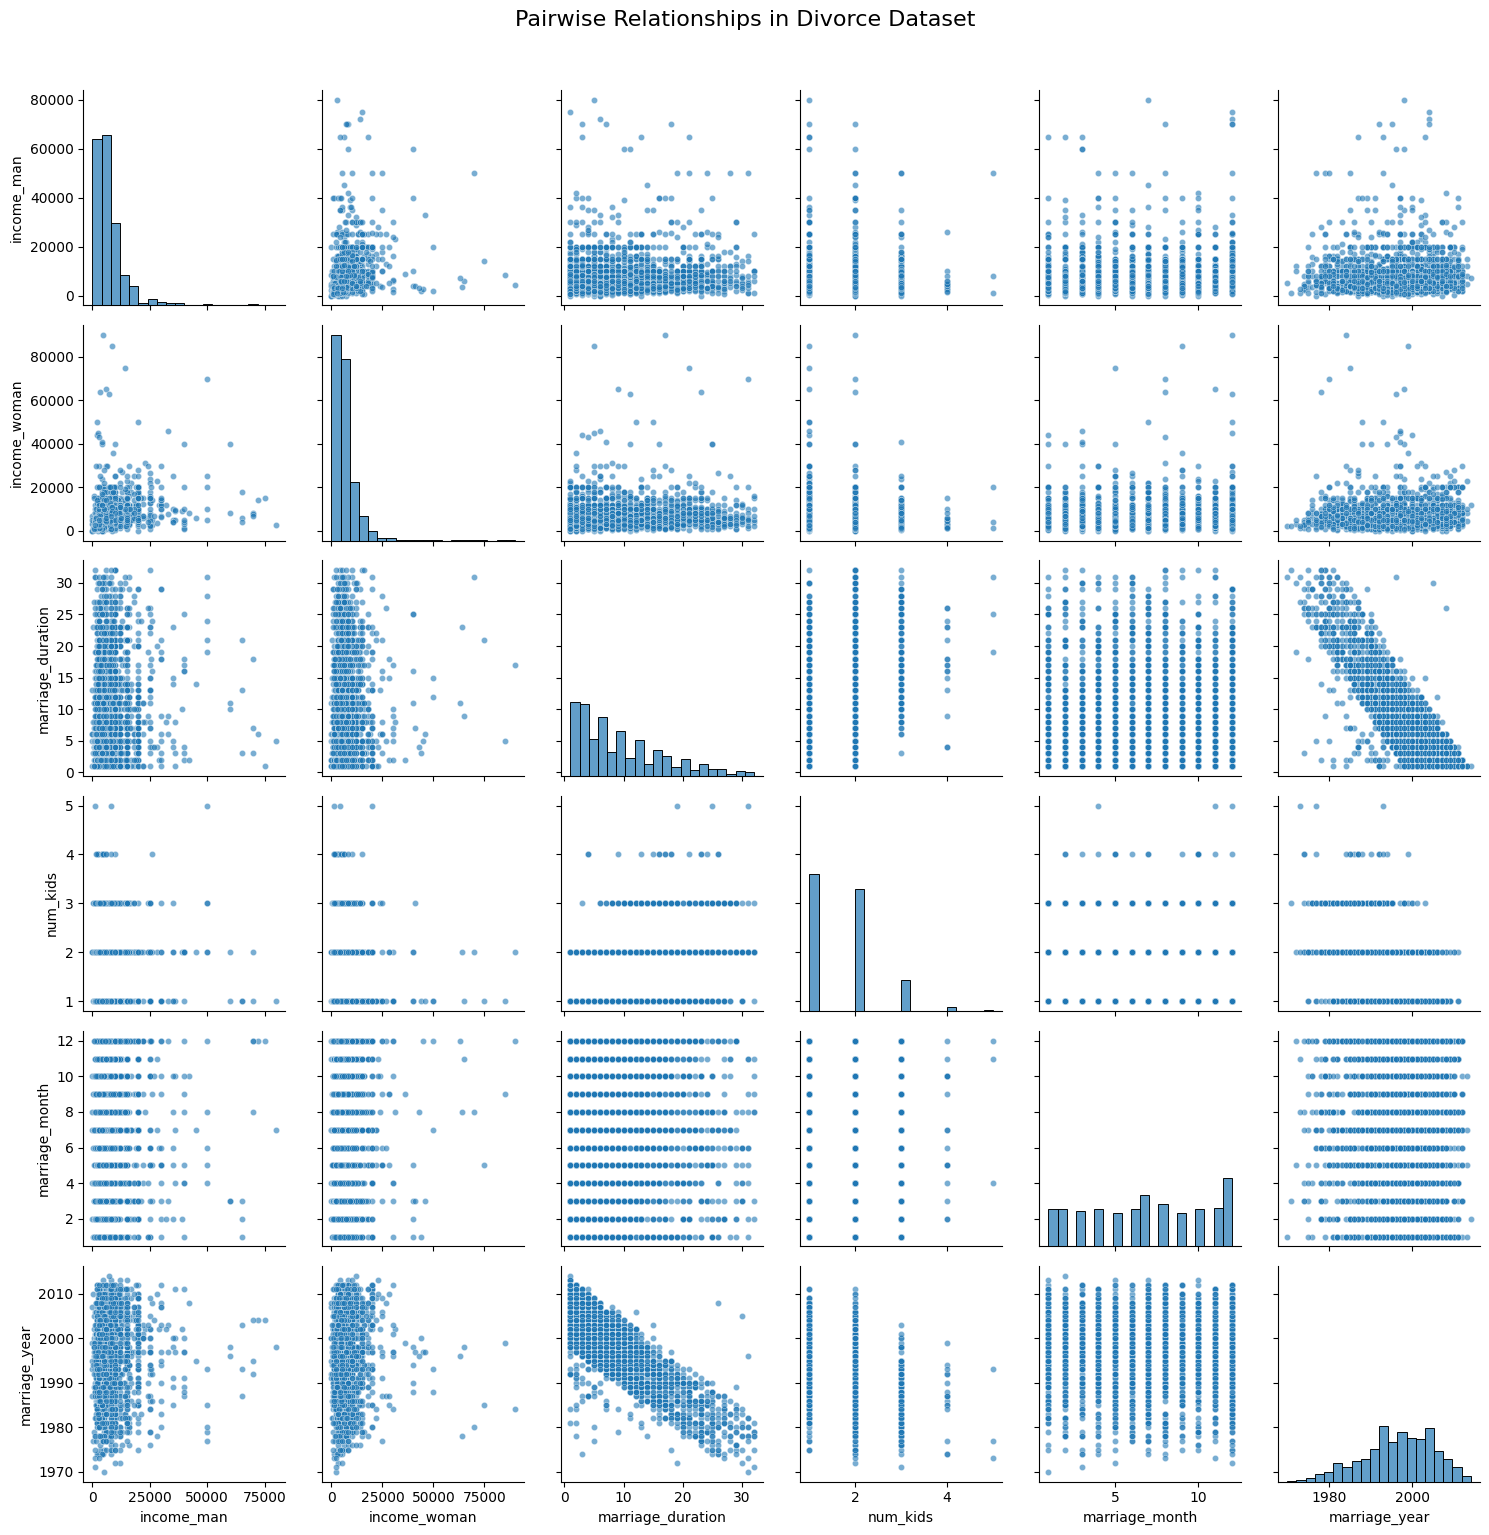

In [ ]:
# Create a pairplot to visualize relationships between all numerical variables
g = sns.pairplot(data=divorce,
                 diag_kind='hist',  # Use histograms on diagonal
                 plot_kws={'alpha': 0.6, 's': 20},  # Make scatter points semi-transparent and smaller
                 diag_kws={'bins': 20, 'alpha': 0.7})  # Customize histogram bins and transparency

# Add a main title to the entire figure
g.fig.suptitle('Pairwise Relationships in Divorce Dataset',
               fontsize=16, y=1.02)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

We can limit the number of plotted relationships by setting the vars argument equal to the variables of interest

## Advanced Correlation Visualization

### Customizing Relationship Analysis for Deeper Insights

While basic pairplots provide broad overviews, customized visualizations enable focused analysis of specific relationships with enhanced statistical and business context.

#### **Enhanced Pairplot Features**:

**Statistical Annotations:**
- **Correlation Coefficients**: Quantify relationship strength
- **P-Values**: Test statistical significance
- **R-Squared Values**: Explain variance relationships
- **Confidence Intervals**: Show uncertainty in relationships

**Visual Enhancements:**
- **Color Coding**: Distinguish correlation strength
- **Reference Lines**: Show equality or benchmark values
- **Outlier Highlighting**: Identify influential observations
- **Density Contours**: Show data concentration patterns

####  **Interpretation Framework**:

**Strong Correlations (|r| > 0.7):**
- **Positive**: Variables increase together
- **Negative**: One increases as other decreases
- **Business Implication**: Strong predictive relationships
- **Caution**: Check for spurious correlations

**Moderate Correlations (0.3 < |r| < 0.7):**
- **Meaningful**: Suggest important relationships
- **Context-Dependent**: Business significance varies
- **Investigation**: Worth deeper statistical analysis
- **Modeling**: Useful for predictive models

**Weak Correlations (|r| < 0.3):**
- **Linear Limitation**: May have non-linear relationships
- **Subgroup Patterns**: Different correlations in segments
- **Control Variables**: May strengthen when controlling for others
- **Business Context**: Even weak correlations can be important

####  **Income Relationship Analysis**:

**Equal Income Line Interpretation:**
- **Above Line**: Women earn more than men
- **Below Line**: Men earn more than women
- **On Line**: Equal earnings
- **Distance from Line**: Magnitude of income difference

**Pattern Recognition:**
- **Clustering**: Groups with similar income patterns
- **Outliers**: Unusual income combinations
- **Trends**: Systematic deviations from equality
- **Density**: Where most couples fall on income spectrum

#### **Common Correlation Mistakes**:

**Statistical Misinterpretations:**
1. **Correlation ≠ Causation**: Association doesn't imply cause
2. **Linear Only**: Pearson correlation misses non-linear relationships
3. **Outlier Sensitivity**: Extreme values can distort correlations
4. **Sample Size**: Small samples produce unreliable correlations

**Business Misapplications:**
1. **Context Ignorance**: Ignoring business logic
2. **Temporal Confusion**: Mixing different time periods
3. **Population Mismatch**: Correlations may not generalize
4. **Simpson's Paradox**: Subgroup patterns differ from overall pattern

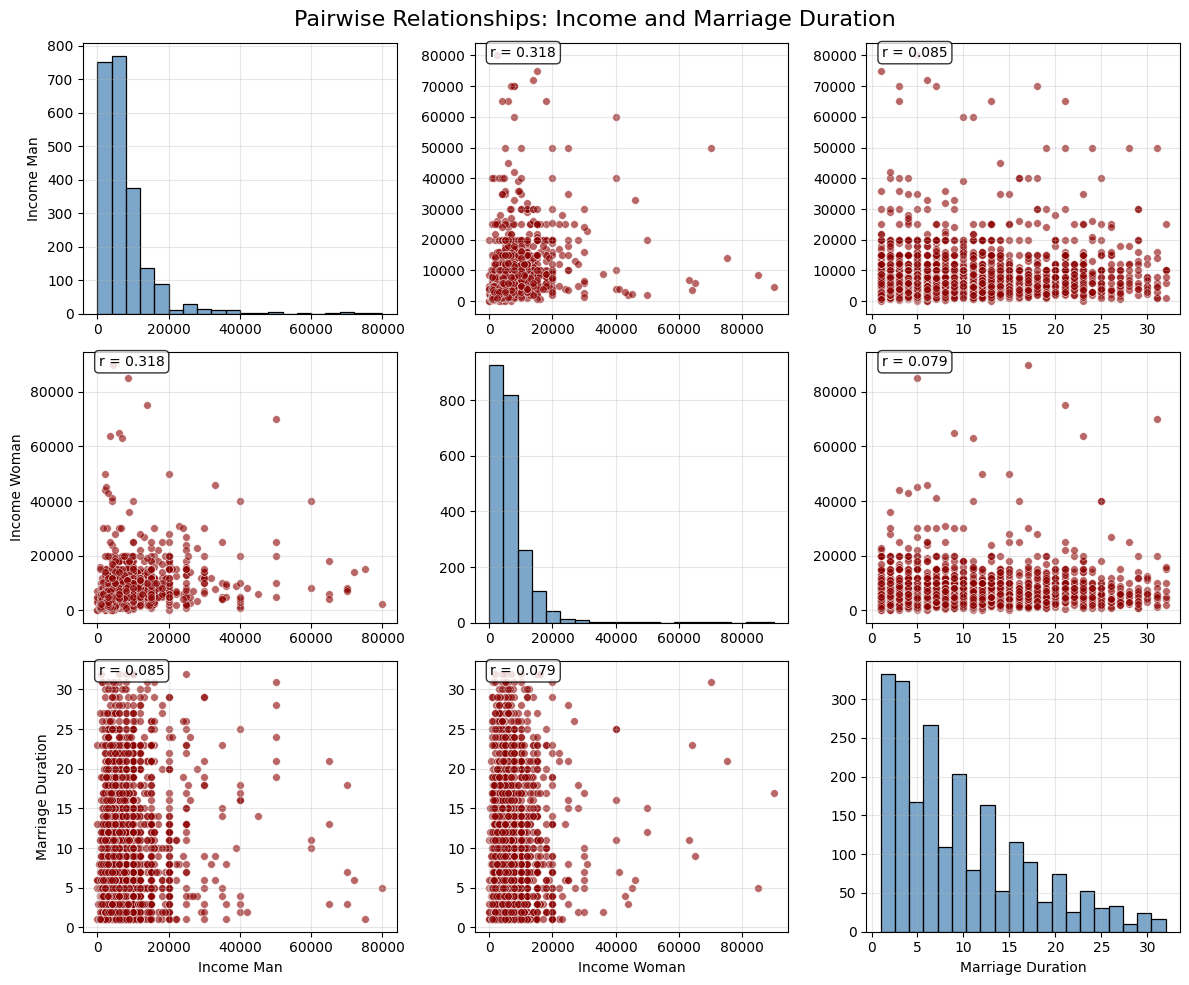

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

# Define the variables we want to plot
vars_to_plot = ["income_man", "income_woman", "marriage_duration"]

# Create custom pairplot
for i, var1 in enumerate(vars_to_plot):
    for j, var2 in enumerate(vars_to_plot):
        ax = axes[i, j]

        if i == j:
            # Diagonal: histograms
            sns.histplot(data=divorce, x=var1, bins=20, alpha=0.7,
                        color='steelblue', ax=ax)
            ax.set_ylabel('Frequency')
        else:
            # Off-diagonal: scatter plots
            sns.scatterplot(data=divorce, x=var2, y=var1,
                           alpha=0.6, s=30, color='darkred', ax=ax)

            # Add correlation coefficient as text
            corr = divorce[var1].corr(divorce[var2])
            ax.text(0.05, 0.95, f'r = {corr:.3f}',
                   transform=ax.transAxes, fontsize=10,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

        # Customize labels
        if i == len(vars_to_plot) - 1:
            ax.set_xlabel(var2.replace('_', ' ').title())
        else:
            ax.set_xlabel('')

        if j == 0:
            ax.set_ylabel(var1.replace('_', ' ').title())
        else:
            ax.set_ylabel('')

        # Add grid for better readability
        ax.grid(True, alpha=0.3)

# Add main title
fig.suptitle('Pairwise Relationships: Income and Marriage Duration',
             fontsize=16, y=0.98)

plt.tight_layout()
plt.show()

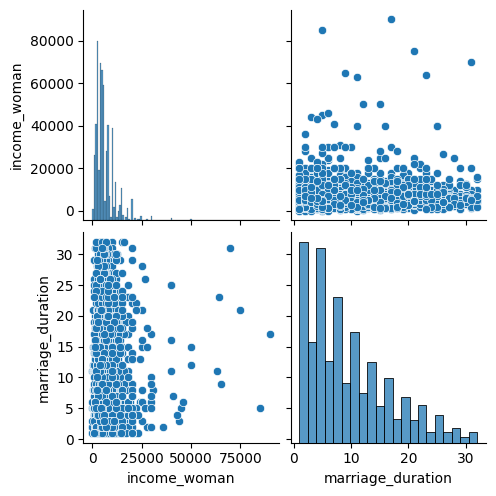

In [ ]:
# Create a pairplot for income_woman and marriage_duration
sns.pairplot(data=divorce, vars=["income_woman" , "marriage_duration"])
plt.show()

### Factor relationships and distributions

In this section, we see how various categorical factors relate to numeric variables. We'll focus on examining distributions conditioned on different categories, providing insights into how group membership might shift or shape overall data patterns. This approach is particularly helpful in understanding whether certain groups exhibit unique trends or outliers.

Level of education: male partner

Below, we compare marriage duration distributions across different education levels of the male partner. By overlaying histograms, we visualize whether higher or lower education correlates with shorter or longer marriages. Distinct peaks or spreads can indicate group-specific behaviors, while overlapping regions suggest similarities or less pronounced differences.

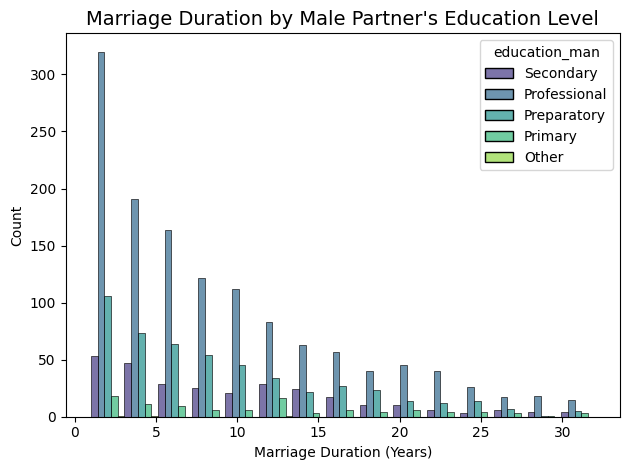

In [ ]:
fig, ax = plt.subplots()

sns.histplot(data=divorce, x="marriage_duration", hue="education_man",
             bins=15, alpha=0.7, multiple="dodge", ax=ax, palette="viridis")

ax.set_title("Marriage Duration by Male Partner's Education Level", fontsize=14)
ax.set_xlabel("Marriage Duration (Years)")
ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


### Kernel Density Estimate (KDE) plots


## Kernel Density Estimation (KDE)

### From Histograms to Continuous Distributions

KDE plots represent a sophisticated evolution from histograms, providing smooth, continuous representations of data distributions that reveal patterns often obscured by the arbitrary binning of histograms.

#### **Understanding KDE: The Mathematical Foundation**:

**What KDE Does:**
1. **Smoothing**: Replaces discrete bins with continuous curves
2. **Kernel Function**: Places a smooth "bump" (usually Gaussian) at each data point
3. **Bandwidth Selection**: Controls smoothing level (wider = smoother)
4. **Density Estimation**: Estimates probability density at any point

**Why KDE Over Histograms:**
- **Bin Independence**: No arbitrary bin boundary effects
- **Smooth Curves**: Easier to see underlying distribution shape
- **Comparison**: Multiple groups overlay naturally
- **Professional Appearance**: Cleaner, more publication-ready visuals

#### **KDE Parameters and Their Impact**:

**Bandwidth (smoothing parameter):**
- **Too Small**: Overfitting - too many peaks and valleys
- **Too Large**: Oversmoothing - loses important features
- **Automatic Selection**: seaborn uses Scott's rule by default
- **Manual Tuning**: `bw_adjust` parameter for fine control

**Cut Parameter:**
- **Default**: KDE extends beyond data range
- **cut=0**: Prevents negative values (crucial for duration, age, price)
- **Business Logic**: Match KDE bounds to realistic variable ranges

#### **Marriage Duration Analysis Context**:

**Research Questions Enabled:**
1. **Distribution Shape**: Is marriage duration normally distributed?
2. **Modal Patterns**: Are there common "danger periods" for divorce?
3. **Education Effects**: Do education levels affect marriage stability patterns?
4. **Subgroup Comparisons**: How do different demographics compare?

**Practical Applications:**
- **Counseling Services**: When to offer intervention programs
- **Legal Planning**: Predicting peak demand periods
- **Policy Analysis**: Understanding relationship stability factors
- **Insurance**: Risk assessment for relationship-based policies

#### **Interpreting KDE Plots**:

**Single Distribution Analysis:**
- **Peak Location**: Most common values (modes)
- **Curve Width**: Spread/variability of data
- **Skewness**: Asymmetry in distribution
- **Multiple Peaks**: Suggests subpopulations

**Multi-Group Comparisons:**
- **Peak Separation**: How different are group centers?
- **Overlap Areas**: Similarity between groups
- **Shape Differences**: Different distribution patterns
- **Relative Heights**: Group sizes (if using common norm)

#### **Advanced KDE Applications**:

**2D KDE (Bivariate):**
```python
# Joint distribution of two variables
sns.kdeplot(data=df, x='var1', y='var2', fill=True)
```
- **Correlation Patterns**: Joint distribution shapes
- **Concentration Areas**: Where most data clusters
- **Outlier Regions**: Sparse areas in joint space

**Ridge Plots:**
```python
# Multiple KDEs stacked vertically
g = sns.FacetGrid(df, row='category', aspect=3)
g.map(sns.kdeplot, 'variable', fill=True)
```
- **Category Comparison**: Easy visual comparison
- **Distribution Evolution**: Changes across ordered categories

#### **Common KDE Mistakes**:

**Statistical Misinterpretations:**
1. **Sample Size Sensitivity**: Small samples produce unreliable KDEs
2. **Boundary Effects**: KDE may extend beyond meaningful ranges
3. **Bandwidth Selection**: Poor choice distorts interpretation
4. **Normalization**: Different norms affect visual comparison

**Business Context Errors:**
1. **Ignoring Bounds**: Allowing impossible values (negative duration)
2. **Over-interpretation**: Seeing patterns in random variation
3. **Scale Confusion**: Mixing different units or scales
4. **Temporal Mixing**: Combining different time periods inappropriately

#### **Best Practices**:

**Code Implementation:**
```python
# Basic KDE with appropriate parameters
sns.kdeplot(data=df, x='variable',
           hue='group',           # Different colors for groups
           cut=0,                 # Prevent negative values
           common_norm=False,     # Normalize each group separately
           fill=True,             # Fill under curves
           alpha=0.6)             # Transparency for overlapping
```

**Parameter Selection Guidelines:**
- **cut=0**: For bounded variables (age, duration, price)
- **common_norm=True**: When comparing group proportions
- **common_norm=False**: When comparing distribution shapes
- **fill=True**: For easier visual distinction
- **alpha<1**: For overlapping distributions

####  **Statistical Theory**:

**Relationship to Probability Theory:**
- **Probability Density**: Area under curve = probability
- **Integration**: Total area under KDE = 1.0
- **Comparison**: Relative heights show likelihood differences

**Connection to Hypothesis Testing:**
- **Visual t-test**: Do group distributions overlap significantly?
- **Effect Size**: How separated are the distributions?
- **Assumptions**: Non-parametric alternative to normal assumptions

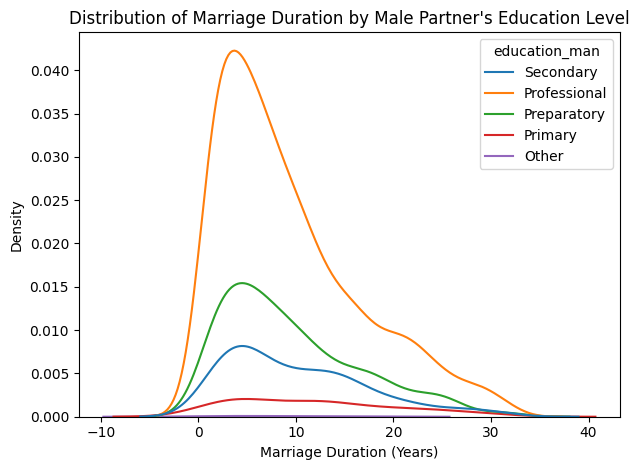

In [ ]:
fig, ax = plt.subplots()

sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man")

ax.set(xlabel="Marriage Duration (Years)",
    ylabel="Density",
    title="Distribution of Marriage Duration by Male Partner's Education Level")

plt.tight_layout()
plt.show()

The KDE plot shown below uses the parameter cut=0 to prevent the density curve from extending into negative values, which is appropriate since marriage duration cannot be negative.


### Cumulative KDE plots


## Cumulative KDE: Understanding Progressive Accumulation Patterns

### From Density to Cumulative Probability

Cumulative KDE plots transform density information into cumulative probabilities, revealing how quickly different groups accumulate observations and enabling precise percentile comparisons.

#### **Cumulative Distribution Functions (CDF) Explained**:

**What Cumulative KDE Shows:**
- **Cumulative Probability**: P(X ≤ x) for any value x
- **Percentile Information**: What % of data falls below any point
- **Rate of Accumulation**: How quickly groups reach certain thresholds
- **Comparative Positioning**: Which groups tend toward lower/higher values

**Mathematical Foundation:**
```
CDF(x) = ∫_{-∞}^{x} PDF(t) dt
```
- **PDF**: Probability Density Function (regular KDE)
- **CDF**: Cumulative Distribution Function (cumulative KDE)
- **Range**: Always 0 to 1 (0% to 100%)

#### **Reading Cumulative KDE Plots**:

**Curve Interpretation:**
- **Steep Sections**: Rapid accumulation (high density in original KDE)
- **Flat Sections**: Slow accumulation (low density in original KDE)
- **Left-Right Position**: Earlier vs. later accumulation
- **Final Height**: Should reach 1.0 (100%) for each group

**Comparative Analysis:**
- **Curve Above Others**: Group tends toward lower values
- **Curve Below Others**: Group tends toward higher values
- **Curve Crossings**: Different patterns at different ranges
- **Separation**: How distinct the groups are

#### **Marriage Duration Cumulative Analysis**:

**Research Insights from Cumulative KDE:**

**Education and Marriage Stability:**
1. **Early Divorce Risk**: Which education groups divorce earlier?
2. **Long-term Stability**: Who stays married longer?
3. **Critical Periods**: When do education differences matter most?
4. **Median Differences**: 50th percentile comparisons across groups

**Practical Questions Answered:**
- **By Year 5**: What % of each education group has divorced?
- **Median Duration**: How long do typical marriages last by education?
- **Risk Periods**: When are divorces most likely to occur?
- **Stability Indicators**: Which groups show most consistency?

#### **Analytical Advantages of Cumulative KDE**:

**Precision in Comparisons:**
```python
# Extract specific percentile information
from scipy import stats

# Find 25th, 50th, 75th percentiles for each group
for group in df['category'].unique():
    group_data = df[df['category'] == group]['variable']
    q25, q50, q75 = np.percentile(group_data, [25, 50, 75])
    print(f"{group}: Q1={q25:.1f}, Median={q50:.1f}, Q3={q75:.1f}")
```

**Statistical Testing:**
- **Kolmogorov-Smirnov Test**: Compare cumulative distributions
- **Mann-Whitney U**: Non-parametric group comparisons
- **Median Tests**: Robust central tendency comparisons

#### **Business Applications**:

**Risk Management:**
- **Survival Analysis**: Time to event (divorce, churn, failure)
- **Quality Control**: Cumulative defect rates
- **Financial Planning**: Cumulative return distributions

**Performance Monitoring:**
- **Customer Lifetime Value**: Cumulative revenue patterns
- **Employee Retention**: Cumulative turnover rates
- **Project Management**: Cumulative completion rates

**Strategic Planning:**
- **Market Penetration**: Cumulative adoption curves
- **Resource Allocation**: When to deploy interventions
- **Timing Decisions**: Optimal intervention points

#### **Advanced Cumulative Analysis Techniques**:

**Percentile Band Analysis:**
```python
# Create percentile bands for comparison
percentiles = [10, 25, 50, 75, 90]
for group in groups:
    group_percentiles = np.percentile(group_data, percentiles)
    # Analyze where groups differ most
```

**Crossing Point Analysis:**
```python
# Find where cumulative curves cross
# Indicates changing relative performance
from scipy.interpolate import interp1d

# Interpolate curves and find intersections
# Interpret business meaning of crossing points
```

**Area Between Curves:**
```python
# Quantify overall difference between groups
from scipy.integrate import trapz

# Calculate area between cumulative curves
# Larger area = greater group difference
```

#### **Interpretation Cautions**:

**Statistical Considerations:**
1. **Sample Size**: Small groups produce unreliable cumulative curves
2. **Censoring**: Incomplete observations affect cumulative patterns
3. **Time Windows**: Analysis period affects cumulative interpretation
4. **Group Definition**: How groups are formed affects comparisons

**Business Context:**
1. **Causal Inference**: Cumulative patterns don't imply causation
2. **External Factors**: Unmeasured variables may explain differences
3. **Temporal Validity**: Historical patterns may not predict future
4. **Population Generalization**: Sample may not represent broader population

#### **Reporting Cumulative Results**:

**Key Metrics to Report:**
- **Median Values**: 50th percentile for each group
- **Quartile Differences**: Q3 - Q1 spread for each group
- **Percentile Comparisons**: Specific threshold performance
- **Maximum Separation**: Point of greatest group difference

**Visualization Best Practices:**
- **Clear Group Labels**: Distinguish different categories
- **Reference Lines**: Mark important percentiles (median, quartiles)
- **Axis Labels**: Clear indication of cumulative probability
- **Context Annotation**: Explain business meaning of patterns

**Communication Framework:**
```
Example: "Higher education groups show 50% divorce rates by year 12,
while lower education groups reach 50% by year 8, suggesting
education is associated with marriage stability."
```

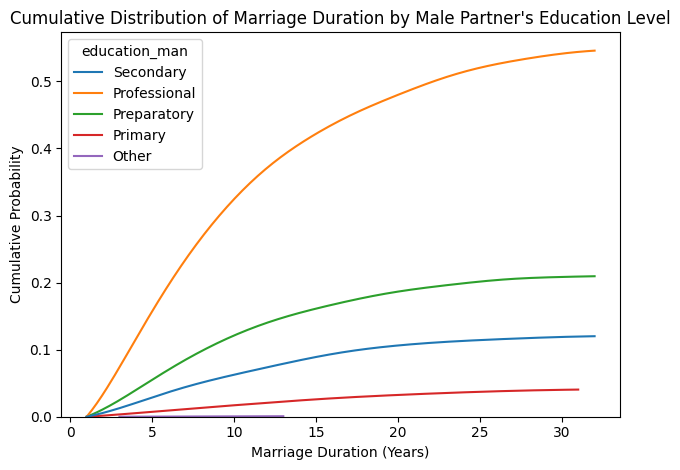

In [ ]:
fig, ax = plt.subplots()

sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man", cut=0, cumulative=True)

ax.set(xlabel="Marriage Duration (Years)",
    ylabel="Cumulative Probability",
    title="Cumulative Distribution of Marriage Duration by Male Partner's Education Level")

plt.tight_layout()

plt.show()

In [ ]:
divorce["man_age_marriage"] = divorce["marriage_year"] - divorce["dob_man"].dt.year
divorce["woman_age_marriage"] = divorce["marriage_year"] - divorce["dob_woman"].dt.year


Comparing partners’ ages at marriage gives a sense of whether couples tend to be similarly aged or if there's a notable gap. Adding color by the male partner’s education level ensures we can see patterns specific to each education category. Points clustering along the diagonal suggest comparable ages, while divergence indicates possible age gaps that might correlate with education or cultural factors.

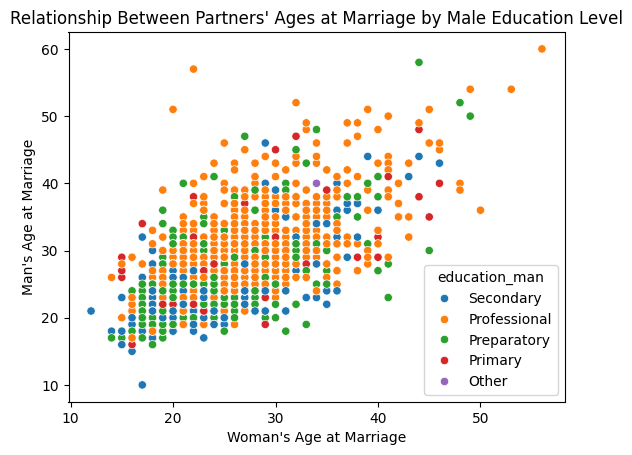

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(data=divorce, x="woman_age_marriage", y="man_age_marriage", hue="education_man")
ax.set(xlabel="Woman's Age at Marriage",
    ylabel="Man's Age at Marriage",
    title="Relationship Between Partners' Ages at Marriage by Male Education Level")

plt.show()


Create a scatter plot that shows `woman_age_marriage` on the x-axis and `income_woman` on the y-axis; each data point should be colored based on the woman's level of education, represented by `education_woman`.

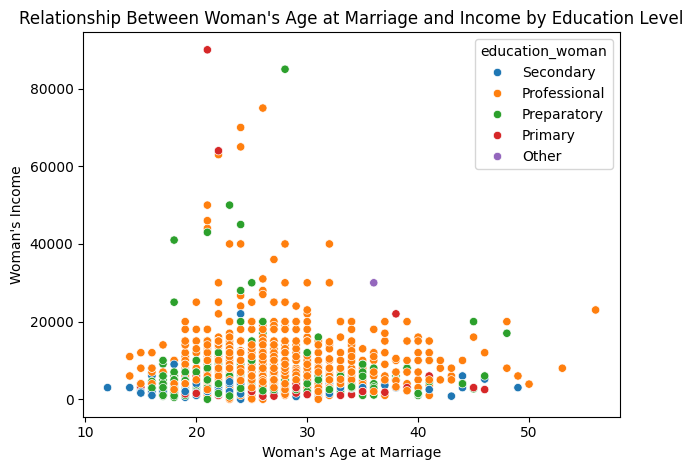

In [ ]:
fig, ax = plt.subplots()

sns.scatterplot(data=divorce, x="woman_age_marriage", y="income_woman", hue="education_woman")
ax.set(xlabel="Woman's Age at Marriage",
    ylabel="Woman's Income",
    title="Relationship Between Woman's Age at Marriage and Income by Education Level")

plt.tight_layout()
plt.show()

Create a KDE plot that shows `marriage_duration` on the x-axis and a different colored line for each possible number of children that a couple might have, represented by `num_kids`.



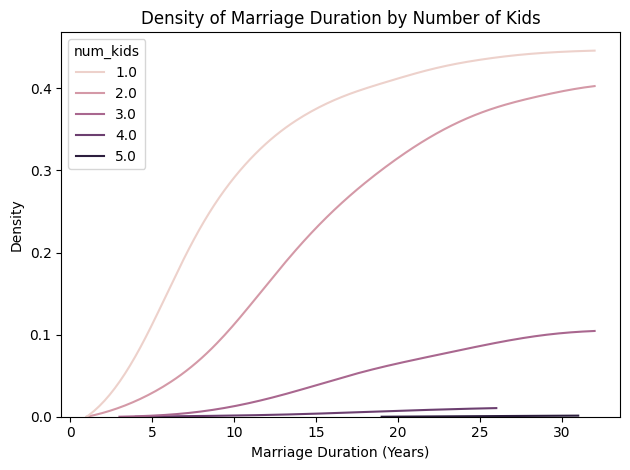

In [ ]:
fig, ax = plt.subplots()

sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0, cumulative=True)

ax.set(xlabel="Marriage Duration (Years)",
    ylabel="Density",
    title="Density of Marriage Duration by Number of Kids")

plt.tight_layout()
plt.show()


## Categorical Data: Beyond Simple Counts

### The Unique Challenges and Opportunities of Categorical Variables

Categorical data requires fundamentally different analytical approaches than numerical data, but offers unique insights into group structures, patterns, and relationships that drive business outcomes.

#### **Types of Categorical Variables**:

**Nominal Categories (No Natural Order):**
- **Examples**: Gender, religion, product type, geographic region
- **Analysis Focus**: Frequency distributions, associations, clustering
- **Visualization**: Bar charts, pie charts, stacked bars
- **Statistical Tests**: Chi-square, Fisher's exact test

**Ordinal Categories (Natural Order):**
- **Examples**: Education level, satisfaction ratings, income brackets
- **Analysis Focus**: Ordered relationships, trend analysis
- **Visualization**: Ordered bar charts, area charts
- **Statistical Tests**: Ordinal regression, Mann-Whitney U

**Binary Categories (Two Levels):**
- **Examples**: Yes/No, Success/Failure, Member/Non-member
- **Analysis Focus**: Proportion testing, logistic relationships
- **Visualization**: Grouped bars, proportion plots
- **Statistical Tests**: Binomial tests, logistic regression

####  **Objectives of Categorical EDA**:

**1. Structure Discovery:**
- **Hidden Subgroups**: Identify distinct population segments
- **Hierarchy Patterns**: Understand nested categorical relationships
- **Market Segmentation**: Natural customer/product clusters
- **Operational Categories**: Process or performance groupings

**2. Hypothesis Generation:**
- **Group Differences**: Which categories perform differently?
- **Association Patterns**: How do categorical variables relate?
- **Predictive Relationships**: Which categories predict outcomes?
- **Interaction Effects**: How do categories combine to influence results?

**3. Bias Detection:**
- **Representation Issues**: Are all groups adequately represented?
- **Sampling Bias**: Do categories reflect true population proportions?
- **Selection Effects**: Are categories systematically different?
- **Confounding Variables**: Do unmeasured factors create spurious patterns?

#### **Advanced Categorical Analysis Techniques**:

**Cross-Tabulation Analysis:**
```python
# Create contingency tables
crosstab = pd.crosstab(df['category1'], df['category2'],
                      margins=True, normalize='columns')

# Visualize with heatmap
sns.heatmap(crosstab, annot=True, fmt='.2%')
```

**Association Strength Measurement:**
- **Cramér's V**: Strength of association (0-1 scale)
- **Phi Coefficient**: For 2x2 tables
- **Lambda**: Proportional reduction in error
- **Uncertainty Coefficient**: Information-theoretic measure

**Categorical-Numerical Relationships:**
```python
# Compare numerical outcomes across categories
sns.boxplot(data=df, x='category', y='numerical_outcome')

# Statistical testing
from scipy.stats import f_oneway
F_stat, p_value = f_oneway(*[group['outcome'].values
                            for name, group in df.groupby('category')])
```

#### **Real-World Application: Demographic Analysis**:

**Labor Market Research:**
- **Gender Pay Gap**: Income differences across gender categories
- **Educational Returns**: How education levels affect career outcomes
- **Industry Segregation**: Gender/ethnicity distributions across sectors
- **Geographic Mobility**: Movement patterns across regions

**Consumer Behavior:**
- **Purchase Patterns**: Product preferences by demographic groups
- **Brand Loyalty**: Retention rates across customer segments
- **Channel Preferences**: How different groups prefer to shop
- **Seasonal Variations**: Category-specific timing patterns

**Policy Analysis:**
- **Program Effectiveness**: Outcomes across different beneficiary groups
- **Resource Allocation**: Need assessment by geographic/demographic categories
- **Equity Monitoring**: Ensuring fair treatment across groups
- **Impact Evaluation**: Differential effects of interventions

#### **Visualization Strategies for Categorical Data**:

**Single Variable Exploration:**
```python
# Frequency analysis
df['category'].value_counts().plot(kind='bar')

# Proportion analysis
df['category'].value_counts(normalize=True).plot(kind='pie')
```

**Two-Variable Relationships:**
```python
# Grouped comparisons
sns.countplot(data=df, x='category1', hue='category2')

# Stacked proportions
pd.crosstab(df['category1'], df['category2']).plot(kind='bar', stacked=True)
```

**Multi-Variable Patterns:**
```python
# Faceted analysis
g = sns.FacetGrid(df, col='category1', row='category2')
g.map(plt.hist, 'numerical_variable')

# Parallel coordinates
from pandas.plotting import parallel_coordinates
parallel_coordinates(df, 'target_category')
```

#### **Common Categorical Analysis Mistakes**:

**Statistical Errors:**
1. **Sparse Categories**: Too few observations in some groups
2. **Multiple Comparisons**: Inflated error rates from many tests
3. **Simpson's Paradox**: Aggregate patterns differ from subgroup patterns
4. **Pseudo-Replication**: Treating related observations as independent

**Business Interpretation Errors:**
1. **Correlation as Causation**: Categorical associations aren't causal
2. **Over-generalization**: Sample patterns may not apply broadly
3. **Historical Bias**: Past patterns may not predict future
4. **Context Ignorance**: Missing important domain knowledge

#### **Statistical Methods**:

**Correspondence Analysis:**
- **Purpose**: Visualize relationships in contingency tables
- **Output**: Low-dimensional representation of category associations
- **Application**: Market research, survey analysis

**Log-Linear Models:**
- **Purpose**: Model complex categorical relationships
- **Capability**: Handle multiple categorical variables simultaneously
- **Application**: Social science research, epidemiology

**Latent Class Analysis:**
- **Purpose**: Discover hidden categorical subgroups
- **Output**: Probabilistic group membership
- **Application**: Customer segmentation, psychological research

#### **Best Practices for Categorical EDA**:

**Data Preparation:**
1. **Category Consistency**: Standardize category names and levels
2. **Missing Data**: Decide whether "Unknown" is a meaningful category
3. **Rare Categories**: Consider grouping infrequent levels
4. **Ordering**: Ensure ordinal variables are properly ordered

**Analysis Strategy:**
1. **Start Simple**: Basic frequency distributions first
2. **Build Complexity**: Add variables systematically
3. **Validate Patterns**: Use statistical tests to confirm observations
4. **Consider Context**: Always interpret within business/research context

**Communication:**
1. **Clear Labels**: Use meaningful category names
2. **Appropriate Scales**: Choose visualizations that highlight key patterns
3. **Statistical Support**: Back visual insights with appropriate tests
4. **Limitations**: Acknowledge what categorical analysis cannot tell you

### Representative Data

The value of any categorical analysis is tethered to the **representativeness** of the underlying sample:

- **Statistical inference** relies on the assumption that the sample approximates the population's characteristics. If, for example, a dataset on education and income is collected exclusively from urban areas, it may bias any generalisation to rural populations.

- **Contextual validity** matters: Analysing marital norms in the USA using French sociological data violates **external validity**, as cultural, legal, and economic structures differ significantly.

- In survey-based datasets, scrutinise:
  - Sampling method (random, stratified, convenience)
  - Geographic and temporal coverage
  - Nonresponse rates and potential biases


### Categorical Classes

Categorical variables encode qualitative groupings. They are broadly classified as:

- **Nominal variables**: Unordered categories (e.g., blood type, ethnicity, brand preference)
- **Ordinal variables**: Categories with an inherent order (e.g., education level, customer satisfaction)

#### Example: Survey on Attitudes Toward Marriage

A survey may contain a question like:

> "What is your current marital status?"

This yields a **single categorical variable** with multiple **discrete, mutually exclusive classes**:

- Single  
- Married  
- Divorced  
- Widowed  
- Separated  

**Key considerations:**

- Are all relevant classes included?
- Is the variable exhaustive (i.e., do options like “Prefer not to say” or “Other” exist)?
- Are the classes **mutually exclusive**, or can individuals fall into multiple categories simultaneously?


### Technical and Statistical Considerations

- **Cardinality**: High-cardinality categorical variables (e.g., zip codes or unique user IDs) may inflate model complexity and memory consumption. Strategies include grouping infrequent levels or dimensionality reduction via target encoding.

- **Missing values**: Absence of data may not be random. “Unknown” or “Refused to answer” may carry **informative missingness**, impacting inference.

- **Bivariate relationships**:
  - Use **contingency tables**, **stacked bar plots**, or **chi-squared tests** to assess association between two categorical variables.
  - Use **Cramér’s V** or **Theil’s U** for quantifying dependence strength when variables are nominal.

- **Multivariate relationships**:
  - Segment numerical variables by categorical ones (e.g., boxplots of income by education level).
  - Evaluate interactions among multiple categorical features via clustering techniques on co-occurrence matrices or visualisations like mosaic plots.


In [ ]:
planes["Destination"].value_counts()

Destination
Cochin       3497
Banglore     2203
Delhi         954
New Delhi     648
Hyderabad     541
Kolkata       298
Name: count, dtype: int64

In [ ]:
planes["Destination"].value_counts(normalize=True)

Destination
Cochin       0.429554
Banglore     0.270606
Delhi        0.117185
New Delhi    0.079597
Hyderabad    0.066454
Kolkata      0.036605
Name: proportion, dtype: float64

### Cross-tabulation
Cross-tabulation (or crosstab) is a way to summarize and examine the relationship between two or more categorical variables. By arranging data into a table format where each cell represents a count of entries belonging to a combination of categories, cross-tabulation helps reveal patterns, differences, or correlations. This is especially valuable in Exploratory Data Analysis (EDA) for identifying trends and generating hypotheses about how different categorical factors interact.

In [ ]:
pd.crosstab(planes["Source"], planes["Destination"],
            values=planes["Price"], aggfunc="median")

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,NaN,NaN,4823.0,NaN,NaN,9514.5
Chennai,NaN,NaN,NaN,NaN,3850.0,NaN
Delhi,NaN,10262.0,NaN,NaN,NaN,NaN
Kolkata,9345.0,NaN,NaN,NaN,NaN,NaN
Mumbai,NaN,NaN,NaN,3625.0,NaN,NaN


### Checking for class imbalance
The 2022 Kaggle Survey captures information about data scientists' backgrounds, preferred technologies, and techniques. It is seen as an accurate view of what is happening in data science based on the volume and profile of responders.

Having looked at the job titles and categorized to align with our salaries DataFrame, you can see the following proportion of job categories in the Kaggle survey:

| **Job Category**      | **Relative Frequency** |
|-----------------------|------------------------|
| Data Science          | 0.281236               |
| Data Analytics        | 0.224231               |
| Other                 | 0.214609               |
| Managerial            | 0.121300               |
| Machine Learning      | 0.083248               |
| Data Engineering      | 0.075375               |


Thinking of the Kaggle survey results as the population, your task is to find out whether the salaries DataFrame is representative by comparing the relative frequency of job categories.

In [ ]:
# Print the relative frequency of the "Job_Category" column from salaries DataFrame
print(salaries["Job_Category"].value_counts(normalize=True))

Job_Category
Data Engineering    0.288303
Data Science        0.263591
Data Analytics      0.222405
Machine Learning    0.118616
Other               0.049423
Managerial          0.046129
Consultant          0.011532
Name: proportion, dtype: float64


In [ ]:
# Perform cross-tabulation, setting "Company_Size" as the index, and the columns to classes in "Experience"
print(pd.crosstab(salaries["Company_Size"], salaries["Experience"]))

Experience    Entry  Executive  Mid  Senior
Company_Size                               
L                29         11   86      72
M                30         12   98     186
S                29          3   29      22


In [ ]:
# Cross-tabulate "Job_Category" and classes of "Company_Size" as column names
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"]))

Company_Size       L    M   S
Job_Category                 
Consultant         3    1   3
Data Analytics    32   91  12
Data Engineering  54  107  14
Data Science      56   81  23
Machine Learning  25   25  22
Managerial        14   11   3
Other             14   10   6


In [ ]:
# Create Job_Category column first
conditions = [
    salaries["Designation"].str.contains(data_science, case=False, na=False),
    salaries["Designation"].str.contains(data_analyst, case=False, na=False),
    salaries["Designation"].str.contains(data_engineer, case=False, na=False),
    salaries["Designation"].str.contains(ml_enngineer, case=False, na=False),
    salaries["Designation"].str.contains(manager, case=False, na=False),
    salaries["Designation"].str.contains(consultant, case=False, na=False)
]

salaries["Job_Category"] = np.select(conditions, job_categories, default="Other")

# Update pd.crosstab() to return the mean "Salary_USD" values rounded to 2 decimal places
display(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"], values=salaries["Salary_USD"], aggfunc="mean").round(2))

Company_Size,L,M,S
Job_Category,,,
Consultant,77553.00,5449.00,75296.33
Data Analytics,102997.12,98125.84,43074.50
Data Engineering,113829.89,116668.97,85645.29
Data Science,107865.30,121664.89,70426.87
Machine Learning,123878.52,100849.48,85124.95
Managerial,170102.86,160419.45,98976.33
Other,96392.93,83067.00,70195.17


### Correlation
Exploring correlations in a dataset is crucial for understanding how numerical variables relate to one another. A correlation coefficient indicates both the direction (positive or negative) and the strength (value between -1 and 1) of a linear relationship. In many exploratory data analysis workflows, the Pearson correlation coefficient is a common measure:
• A value close to 1 suggests a strong positive correlation.  
• A value close to -1 suggests a strong negative correlation.  
• A value near 0 suggests little or no linear relationship.

In practice, after computing the correlation matrix with pandas, we often visualize it with Seaborn’s heatmap to quickly spot any highly correlated pairs that might warrant deeper investigation.

Here, we are focusing on the "Price" and "Duration" columns from the planes DataFrame. By computing their correlation and plotting a heatmap, we can see at a glance whether flight duration is positively or negatively associated with flight price.

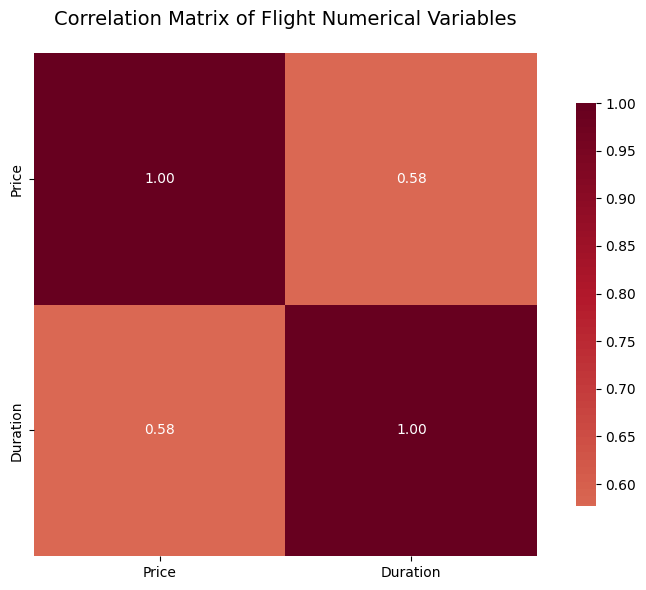

In [ ]:
# Create correlation matrix with numerical columns
correlation_matrix = planes[['Price', 'Duration']].corr()

fig, ax = plt.subplots(figsize=(8, 6))

# annot=True displays correlation values in each cell
# center=0 centers colormap at zero for better interpretation
# cmap="RdBu_r" uses red-blue colormap (reversed) where blue=positive, red=negative
sns.heatmap(correlation_matrix, annot=True, center=0, cmap="RdBu_r", square=True, fmt=".2f", cbar_kws={"shrink":0.8}, ax=ax)

# Set descriptive title with proper spacing
ax.set_title("Correlation Matrix of Flight Numerical Variables", fontsize=14, pad=20)

ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.tight_layout()
plt.show()

### Data Cleaning: Converting Categorical to Numerical

The "Total_Stops" column in the `planes` DataFrame is currently of `object` (string) type, as seen from the `.dtypes` output. To use this column for numerical analysis or correlation calculations, it needs to be converted to a numerical data type.

The raw data for "Total_Stops" contains values like '1 stop', 'non-stop', '2 stops', etc. Before converting to a number, these string parts need to be removed or replaced with their numerical equivalents.

The code below performs the following steps:
1. **Remove ' stops' and ' stop'**: The `.str.replace()` method is used to remove the literal strings " stops" and " stop" from the "Total_Stops" column. This leaves just the numerical part or "non-stop".
2. **Replace 'non-stop' with '0'**: "non-stop" indicates zero stops, so it's replaced with the string '0'.
3. **Convert to integer**: Finally, the `.astype(int)` method is used to convert the cleaned string values into integers. This allows the column to be used in numerical operations.

In [ ]:
planes.dtypes

Airline                      object
Date_of_Journey              object
Source                       object
Destination                  object
Route                        object
Dep_Time                     object
Arrival_Time                 object
Duration                    float64
Total_Stops                  object
Additional_Info              object
Price                       float64
Additional_Info_Category     object
Duration_Category            object
airline_price_st_dev        float64
airline_median_duration     float64
price_destination_mean      float64
dtype: object

In [ ]:
display(planes["Total_Stops"].value_counts())

Total_Stops
1 stop      4251
non-stop    2690
2 stops     1166
3 stops       33
4 stops        1
Name: count, dtype: int64

In [ ]:
# Clean Total_Stops column to convert to numeric
# Remove text suffixes from the values
planes["Total_Stops"] = planes["Total_Stops"].str.replace(" stops", "")
planes["Total_Stops"] = planes["Total_Stops"].str.replace(" stop", "")
# Convert "non-stop" to numeric equivalent
planes["Total_Stops"] = planes["Total_Stops"].str.replace("non-stop", "0")
# Convert cleaned strings to integers for numerical operations
planes["Total_Stops"] = planes["Total_Stops"].astype(int)

### Expanding the Correlation Matrix

After cleaning and converting the "Total_Stops" column to a numerical data type, we can now include it in the correlation analysis.

The code below calculates the correlation matrix for the numerical columns 'Duration', 'Total_Stops', and 'Price' in the `planes` DataFrame.

The `seaborn.heatmap()` function is then used to visualize this correlation matrix:
- `annot=True`: Displays the correlation coefficients on the heatmap.
- `center=0`: Centers the colormap around 0, highlighting both positive and negative correlations.
- `cmap="RdBu_r"`: Uses a diverging colormap where red represents negative correlations, blue represents positive correlations, and white is near zero. The `_r` suffix reverses the default direction of the colormap.
- `square=True`: Ensures the heatmap cells are square.
- `fmt=".2f"`: Formats the annotations to two decimal places.
- `cbar_kws={"shrink":0.8}`: Adjusts the size of the color bar.
- `ax=ax`: Specifies the matplotlib axes object to draw the heatmap on.

The heatmap visually represents the pairwise linear correlation between these three numerical variables. Stronger colors indicate stronger correlations (closer to 1 or -1), while colors closer to white indicate weaker correlations (closer to 0).

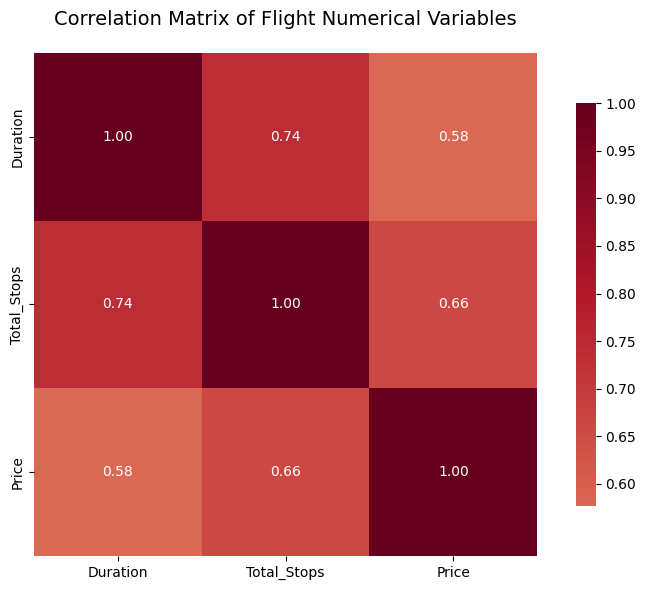

In [ ]:
# Create correlation matrix with numerical columns
correlation_matrix = planes[['Duration', 'Total_Stops', 'Price']].corr()

fig, ax = plt.subplots(figsize=(8, 6))

# annot=True shows correlation values, center=0 centers colormap at zero
# cmap="RdBu_r" uses red-blue diverging colors (reversed)
sns.heatmap(correlation_matrix, annot=True, center=0, cmap="RdBu_r",
           square=True, fmt=".2f", cbar_kws={"shrink":0.8}, ax=ax)

ax.set_title("Correlation Matrix of Flight Numerical Variables", fontsize=14, pad=20)

ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.tight_layout()
plt.show()

### Date and Time Operations: Converting to Datetime Objects

Date and time data in datasets often comes in various string formats. To perform time-based analysis or extract components like month and weekday, these columns need to be converted into proper datetime objects.

The `pandas.to_datetime()` function is essential for this conversion.

The code below attempts to convert the 'Date_of_Journey', 'Dep_Time', and 'Arrival_Time' columns in the `planes` DataFrame to datetime objects.

- **`pd.to_datetime(planes[col], format="...", errors="coerce")`**: This is the core of the conversion.
    - `planes[col]`: Selects the column to convert.
    - `format="..."`: **Crucially**, this argument specifies the expected format of the input date/time strings. Using the correct format string is vital for successful parsing. **Note:** The provided code includes example formats (`%d/%m/%Y` for dates and `%d/%m/%Y %H:%M` for date and time), but these **must be adjusted** to match the *actual* format of the data in your dataset. Incorrect formats will lead to conversion errors.
    - `errors="coerce"`: If a value cannot be parsed according to the specified format, it will be replaced with `NaT` (Not a Time), which is pandas' representation for missing datetime values. This prevents the code from crashing on unparseable entries.
- **`.dt.date`**: For 'Date_of_Journey', after converting to datetime, `.dt.date` is used to extract just the date part, removing the time component.

The subsequent cell re-converts 'Date_of_Journey' to datetime objects using `pd.to_datetime()` without explicitly specifying a format. Pandas will attempt to infer the format, which can be less reliable than providing the format explicitly. The output of `planes.dtypes` confirms the data types after these conversions.

In [ ]:
planes.dtypes

Airline                      object
Date_of_Journey              object
Source                       object
Destination                  object
Route                        object
Dep_Time                     object
Arrival_Time                 object
Duration                    float64
Total_Stops                   int64
Additional_Info              object
Price                       float64
Additional_Info_Category     object
Duration_Category            object
airline_price_st_dev        float64
airline_median_duration     float64
price_destination_mean      float64
dtype: object

In [ ]:
# Specify an explicit format for each column to avoid parsing warnings
for col in ["Date_of_Journey", "Dep_Time", "Arrival_Time"]:
    if col == "Date_of_Journey":
        # Example format for dates like "9/06/2019"
        planes[col] = pd.to_datetime(planes[col], format="%d/%m/%Y", errors="coerce").dt.date
    else:
        # Example format for entries containing date and time like "9/06/2019 09:25"
        # Adjust to match your actual data pattern
        planes[col] = pd.to_datetime(planes[col], format="%d/%m/%Y %H:%M", errors="coerce")

In [ ]:
planes["Date_of_Journey"] = pd.to_datetime(planes["Date_of_Journey"])

In [ ]:
planes.dtypes

Airline                             object
Date_of_Journey             datetime64[ns]
Source                              object
Destination                         object
Route                               object
Dep_Time                    datetime64[ns]
Arrival_Time                datetime64[ns]
Duration                           float64
Total_Stops                          int64
Additional_Info                     object
Price                              float64
Additional_Info_Category            object
Duration_Category                   object
airline_price_st_dev               float64
airline_median_duration            float64
price_destination_mean             float64
dtype: object

### Date and Time Operations: Extracting Month and Weekday

Once a column is converted to a datetime object, you can easily extract various components using the `.dt` accessor, such as year, month, day, day of the week, etc.

The code below extracts the month and weekday from the 'Date_of_Journey' column:
- **`planes["Date_of_Journey"].dt.month`**: Extracts the month as an integer (1 for January, 12 for December).
- **`planes["Date_of_Journey"].dt.weekday`**: Extracts the day of the week as an integer (0 for Monday, 6 for Sunday).

These extracted components are stored in new columns named 'month' and 'weekday'. The `.head()` display shows the first few rows of these new columns along with the original 'Date_of_Journey' to verify the extraction.

In [ ]:
planes["month"] = planes["Date_of_Journey"].dt.month
planes["weekday"] = planes["Date_of_Journey"].dt.weekday
display(planes[["month", "weekday", "Date_of_Journey"]].head())


,month,weekday,Date_of_Journey
0,6,6,2019-06-09
1,5,6,2019-05-12
2,3,4,2019-03-01
3,6,0,2019-06-24
4,3,1,2019-03-12


### Descriptive Statistics and Data Binning

Analyzing the distribution of a numerical variable often starts with descriptive statistics and can be further enhanced by categorizing the data into bins.

The code in the subsequent cells demonstrates this process for the 'Price' column in the `planes` DataFrame:

1. **Descriptive Statistics (`.describe()`)**:
   - `planes["Price"].describe()`: Calculates and displays common descriptive statistics for the 'Price' column, including count, mean, standard deviation, minimum, maximum, and quartile values (25th, 50th - median, and 75th percentile). This provides a quick summary of the data's central tendency, spread, and range.

2. **Calculating Quartiles**:
   - `planes["Price"].quantile(0.25)`: Calculates the 25th percentile (Q1).
   - `planes["Price"].median()`: Calculates the 50th percentile (median or Q2).
   - `planes["Price"].quantile(0.75)`: Calculates the 75th percentile (Q3).
   - `planes["Price"].max()`: Finds the maximum value.

3. **Defining Bins and Labels**:
   - `labels = ["Economy", "Premium Economy", "Business Class", "First Class"]`: Defines a list of labels for the price categories.
   - `bins = [0, twenty_fifth, median, seventy_fifth, maximum]`: Defines the bin edges based on the calculated quartiles and the maximum value. The first bin starts at 0 (assuming prices are non-negative). The bins are inclusive of the left edge and exclusive of the right edge, except for the last bin which includes the maximum value.

4. **Creating Price Categories (`pd.cut()`)**:
   - `pd.cut(planes["Price"], bins=bins, labels=labels)`: This function is used to segment the 'Price' column into discrete bins based on the defined `bins` and assign the corresponding `labels` to each bin. A new column called 'Price_Category' is created in the `planes` DataFrame to store these categories.

The `.head()` display shows the original 'Price' values alongside their newly assigned 'Price_Category', allowing for a quick check of the binning process.

In [ ]:
display(planes["Price"].describe())

count     8141.000000
mean      8872.072718
std       4002.453551
min       1759.000000
25%       5224.000000
50%       8372.000000
75%      12121.000000
max      22270.000000
Name: Price, dtype: float64

In [ ]:
# Calculate quartiles and maximum for price binning
twenty_fifth = planes["Price"].quantile(0.25)
median = planes["Price"].median()
seventy_fifth = planes["Price"].quantile(0.75)
maximum = planes["Price"].max()  # Maximum value for upper bound

In [ ]:
# Define price category labels and corresponding bin edges
labels = ["Economy", "Premium Economy", "Business Class", "First Class"]
bins = [0, twenty_fifth, median, seventy_fifth, maximum]

# Create price categories using quartile-based binning
# pd.cut() segments continuous Price data into discrete categories
planes["Price_Category"] = pd.cut(planes["Price"], bins=bins, labels=labels)

# Display first few rows to verify the binning process
display(planes[["Price", "Price_Category"]].head())


,Price,Price_Category
0,13882.0,First Class
1,6218.0,Premium Economy
2,13302.0,First Class
3,3873.0,Economy
4,11087.0,Business Class


In [ ]:
# Use pd.cut() to create categorical bins from continuous numerical data
# bins parameter defines the cut points, labels parameter assigns category names
planes["Price_Category"] = pd.cut(
    planes["Price"],
    bins=bins,  # Uses quartile-based boundaries: [0, Q1, Q2, Q3, max]
    labels=labels  # Assigns meaningful category names to each bin
)

In [ ]:
display(planes[["Price", "Price_Category"]].head())

,Price,Price_Category
0,13882.0,First Class
1,6218.0,Premium Economy
2,13302.0,First Class
3,3873.0,Economy
4,11087.0,Business Class


### Visualizing Categorical Relationships: Countplot

Visualizing the distribution of categorical variables, especially in relation to another categorical variable, is a powerful way to uncover patterns and relationships.

The `seaborn.countplot()` function is ideal for showing the counts of observations in each category.

The code below creates a countplot to visualize the relationship between 'Airline' and the newly created 'Price_Category':
- `data=planes`: Specifies the DataFrame to use.
- `x="Airline"`: Sets the 'Airline' column on the x-axis, with each unique airline becoming a bar group.
- `hue="Price_Category"`: Colors the bars within each airline group based on the 'Price_Category'. This allows for a direct comparison of the distribution of price categories within each airline.

The resulting plot shows stacked or grouped bars for each airline, where the height of each colored segment represents the count of flights falling into that price category for that specific airline. This visualization helps to understand which airlines offer more flights in different price tiers and reveals potential differences in pricing strategies or target markets between airlines.

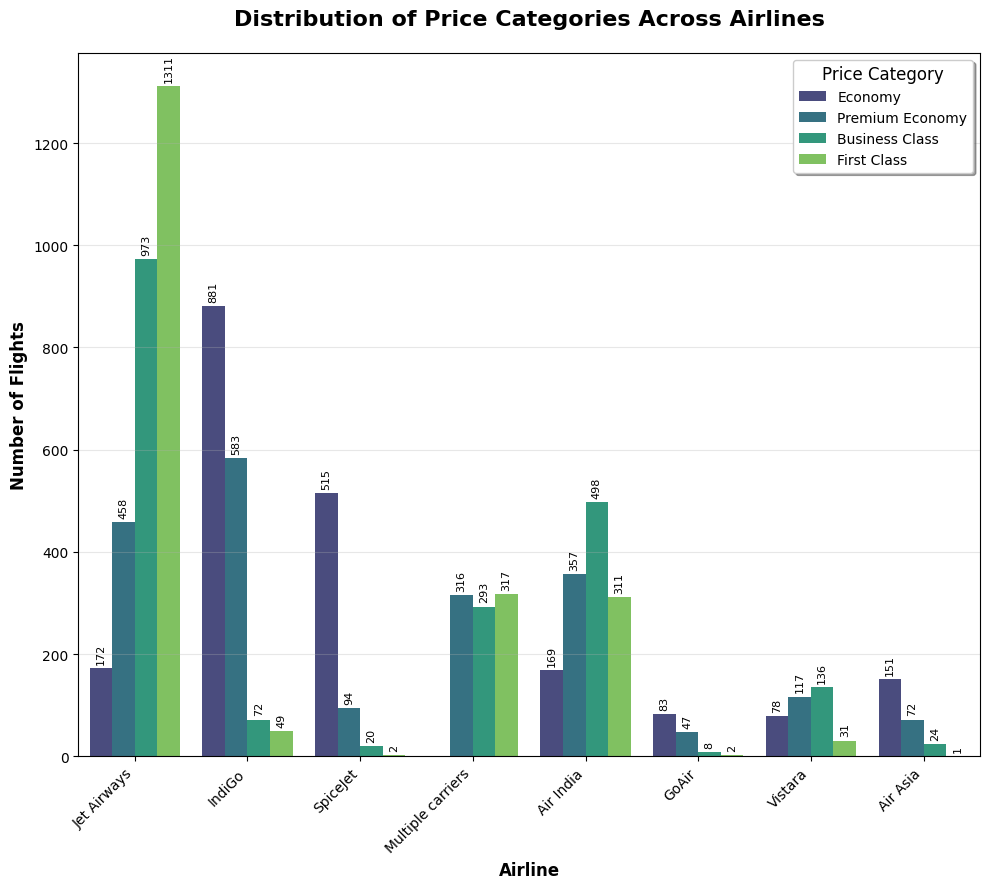

In [ ]:
fig, ax = plt.subplots(figsize=(10, 9))
sns.countplot(data=planes, x="Airline", hue="Price_Category",
              palette="viridis", ax=ax)

ax.set_title("Distribution of Price Categories Across Airlines",
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("Airline", fontsize=12, fontweight='bold')
ax.set_ylabel("Number of Flights", fontsize=12, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

ax.legend(title="Price Category", title_fontsize=12, fontsize=10,
          loc='upper right', frameon=True, fancybox=True, shadow=True)

# Add grid for better readability
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fontsize=8, rotation=90, padding=3)

plt.tight_layout()
plt.show()


### Extracting features for correlation
In this exercise, you'll work with a version of the salaries dataset containing a new column called `"date_of_response"`.

The dataset has been read in as a pandas DataFrame, with `"date_of_response"` as a datetime data type.

Your task is to extract datetime attributes from this column and then create a heat map to visualize the correlation coefficients between variables.

In [ ]:
# Define the start and end dates for random date generation
start_date = pd.to_datetime("2019-01-01")
end_date = pd.to_datetime("2022-12-31")

# Calculate the total number of days in the range
time_delta = end_date - start_date
total_days = time_delta.days

# Generate a random number of days to add to the start_date for each row
random_days_to_add = np.random.randint(0, total_days + 1, size=len(salaries))

# Create the "date_of_response" column with random dates
salaries["date_of_response"] = start_date + pd.to_timedelta(random_days_to_add, unit='D')

In [ ]:
# Extract the month from "date_of_response", storing it as a column called "month".
salaries["month"] = salaries["date_of_response"].dt.month
# Create the "weekday" column, containing the weekday that the participants completed the survey.
salaries["weekday"] = salaries["date_of_response"].dt.weekday
# Display the first few rows with the new columns to verify
print(salaries[["date_of_response", "month", "weekday"]].head())

  date_of_response  month  weekday
0       2022-12-13     12        1
1       2019-02-07      2        3
2       2020-11-07     11        5
3       2020-09-13      9        6
4       2021-12-31     12        4


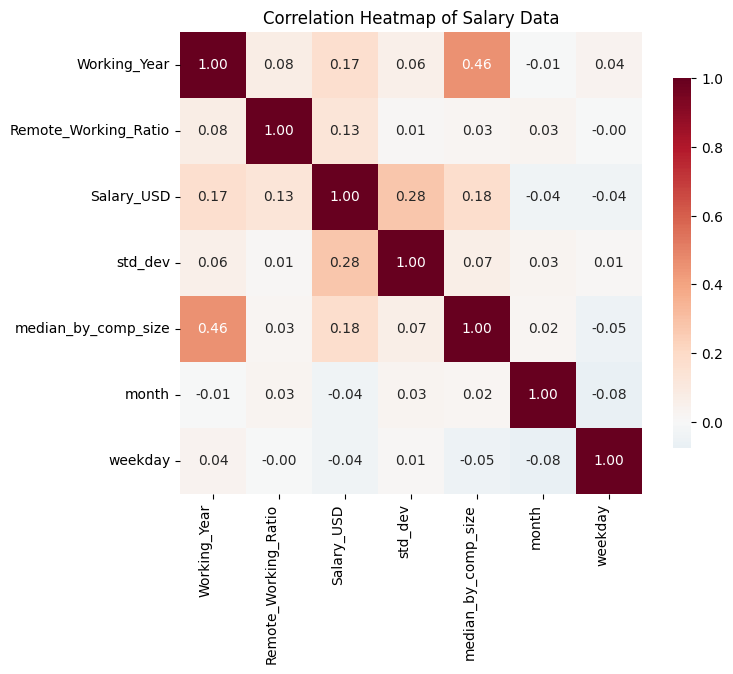

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Calculate the correlation matrix for numerical columns only
numerical_salaries = salaries.select_dtypes(include=np.number)
correlation_matrix_salaries = numerical_salaries.corr()

sns.heatmap(correlation_matrix_salaries, annot=True, center=0, cmap="RdBu_r", square=True, fmt=".2f", cbar_kws={"shrink":0.8}, ax=ax)

ax.set_title("Correlation Heatmap of Salary Data")
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)
plt.xticks(rotation=90, ha="right")

plt.show()

### Calculating salary percentiles
In the video, you saw that the conversion of numeric data into categories sometimes makes it easier to identify patterns.

Your task is to convert the "Salary_USD" column into categories based on its percentiles. First, you need to find the percentiles and store them as variables.

In [ ]:
# Find the 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# Save the median
salaries_median = salaries["Salary_USD"].median()

# Gather the 75th percentile
seventy_fifth = salaries["Salary_USD"].quantile(0.75)
print(twenty_fifth, salaries_median, seventy_fifth)

59893.0 96982.0 143225.0


In [ ]:
# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

In [ ]:
# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)

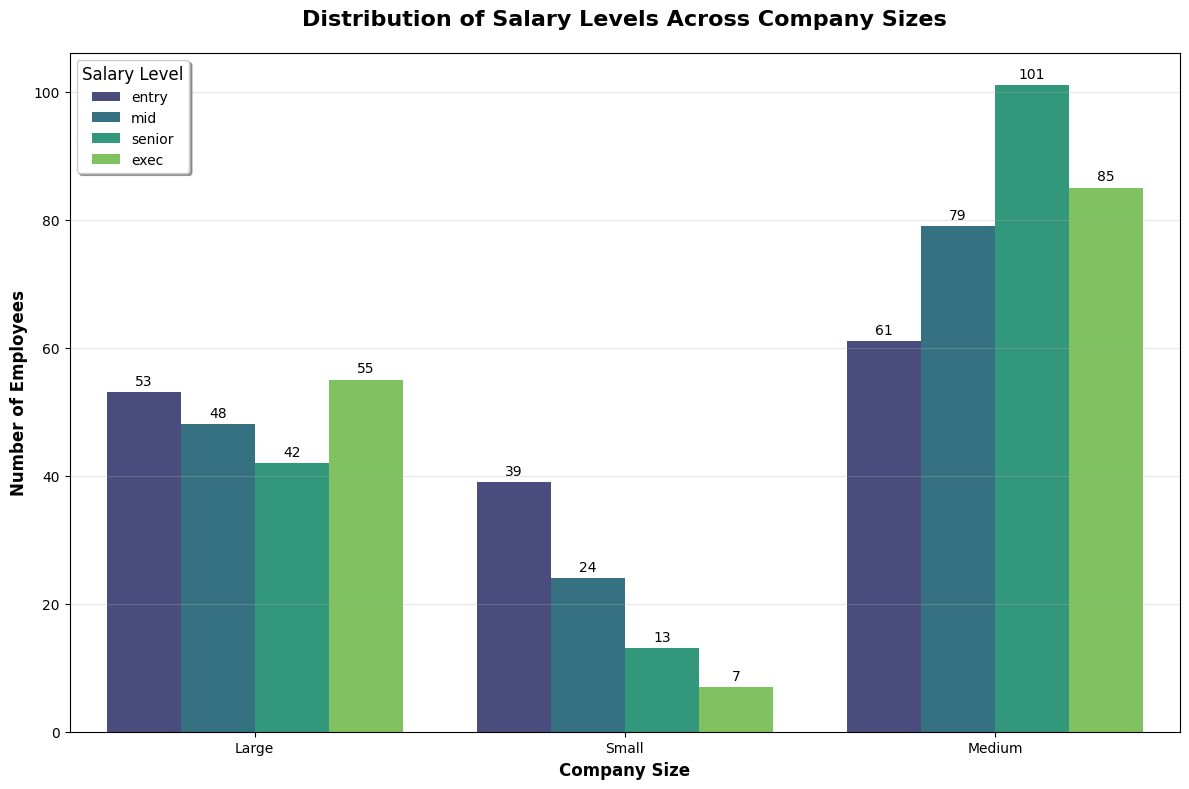

In [ ]:
# Plot the count of salary levels at companies of different sizes
fig, ax = plt.subplots(figsize=(12, 8))

sns.countplot(data=salaries, x="Company_Size", hue="salary_level",
              palette="viridis", ax=ax)

ax.set_title("Distribution of Salary Levels Across Company Sizes",
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("Company Size", fontsize=12, fontweight='bold')
ax.set_ylabel("Number of Employees", fontsize=12, fontweight='bold')

ax.legend(title="Salary Level", title_fontsize=12, fontsize=10,
          loc='upper left', frameon=True, fancybox=True, shadow=True)

# Add grid for better readability
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10, padding=3)

# Improve tick labels - p.s. fix the warning by getting current tick positions first
company_size_labels = {'S': 'Small', 'M': 'Medium', 'L': 'Large'}
current_labels = [label.get_text() for label in ax.get_xticklabels()]
new_labels = [company_size_labels.get(label, label) for label in current_labels]
ax.set_xticks(ax.get_xticks())  # Set the tick positions explicitly
ax.set_xticklabels(new_labels)

plt.tight_layout()
plt.show()

## Generating Hypotheses in Exploratory Data Analysis

Generating hypotheses is a crucial cognitive and methodological step in the EDA workflow. It bridges the gap between descriptive investigation and inferential or predictive analysis. Rather than beginning with fixed assumptions, EDA invites analysts to observe the data with epistemic humility and generate *testable, data-grounded propositions*.


### What Is a Hypothesis?

A **hypothesis** in statistics is a declarative statement about a population parameter that can be tested using data. In EDA, hypotheses are not always strictly formal or mathematical at first—they are often intuitive, tentative, and emergent from data patterns.

Examples:

- “Younger employees tend to earn lower salaries.”
- “Product reviews with higher word counts are more likely to be positive.”
- “Urban residents report higher daily screen time than rural ones.”

### The Role of Hypothesis Generation in EDA

While classical statistics begins with a *predefined* hypothesis, **exploratory** analysis often reverses the process:

1. **Explore → Observe Patterns**
2. **Formulate Hypotheses**
3. **Plan Confirmatory Analysis**

This is the **inductive phase** of data analysis—pattern-seeking and anomaly-identifying. It draws upon statistical summaries, data visualisations, and contextual knowledge to provoke meaningful questions.



###  Next Steps After Hypothesis Generation

Once hypotheses are formed, the process pivots toward *experimental or confirmatory data analysis*. This transition involves methodological rigour and preparation:

#### 1. Designing the Experiment
This refers to planning how to validate the hypothesis through data. It includes:

- **Choosing a Sample**: Selecting a representative subset of the population, ideally using probabilistic sampling techniques to mitigate bias.
- **Calculating Sample Size**: Employing power analysis to determine the number of observations required to detect an effect of a given size with sufficient confidence.
- **Selecting the Appropriate Test**:
  - T-tests, ANOVA, or non-parametric tests for comparisons
  - Chi-square tests for categorical variables
  - Regression modelling for predictive relationships

Each hypothesis demands a corresponding statistical framework for validation, bearing in mind assumptions like normality, independence, and variance homogeneity.


### Example: From EDA to Hypothesis to Testing

Suppose, during EDA, you observe that customers in the “North” region consistently show higher average order value than other regions.

- **Generated Hypothesis**: “Customers in the North region have significantly higher order values than those in the South.”
- **Next Steps**:
  - Extract regional data and check for normality
  - Conduct Welch's t-test (if variance differs)
  - Interpret p-values and confidence intervals accordingly

Hypothesis generation in EDA is both a **creative** and **technical** act. It requires:
- Close engagement with data visualisations,
- Sensitivity to statistical nuance,
- And a readiness to revise or discard hypotheses that do not hold under scrutiny.

Hypotheses are not endpoints—they are tools to interrogate reality through data.



### Spurious Correlation

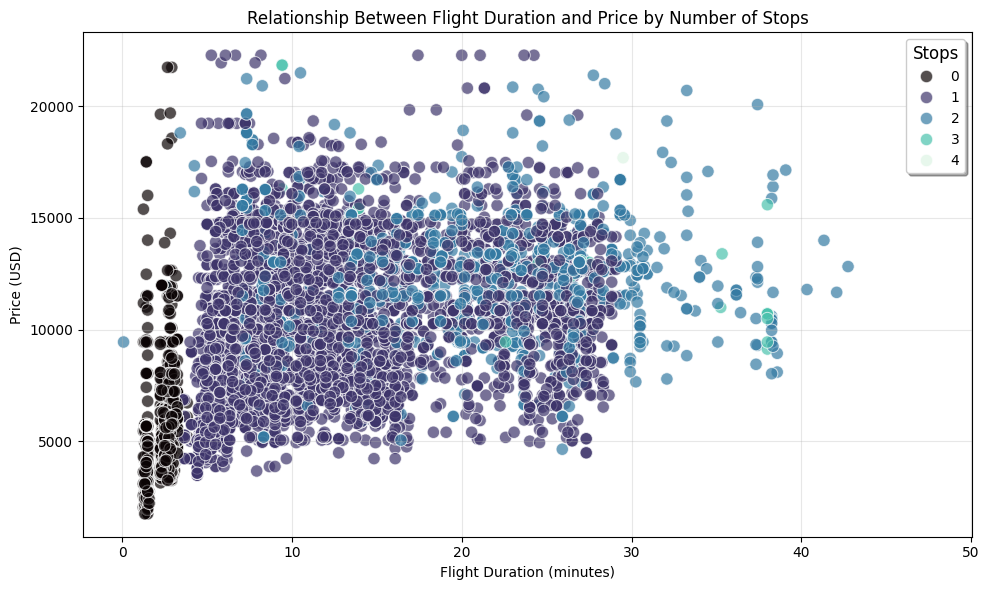

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=planes, x="Duration", y="Price", hue="Total_Stops",
                palette="mako", alpha=0.7, s=80, ax=ax)

ax.set(xlabel="Flight Duration (minutes)",
       ylabel="Price (USD)",
       title="Relationship Between Flight Duration and Price by Number of Stops")

# Improve legend
ax.legend(title="Stops", title_fontsize=12, fontsize=10,
          loc='upper right', frameon=True, fancybox=True, shadow=True)

# Add grid for better readability
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Generating Hipothesis

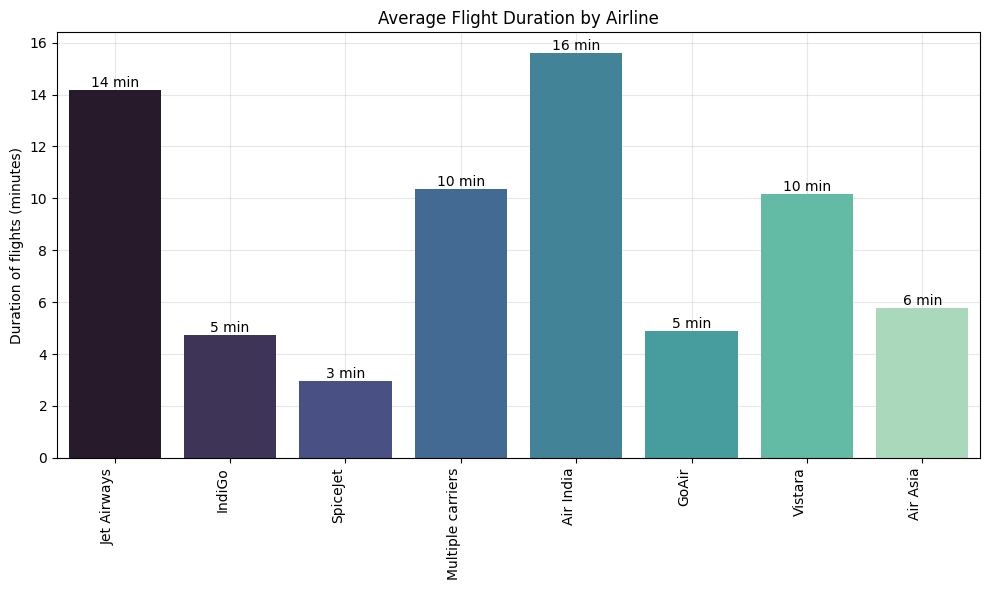

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=planes, x="Airline", y="Duration", palette="mako", hue="Airline", ax=ax, errorbar=None,
            zorder=2  # Draw bars above the grid
            )

# Make sure the grid is drawn behind the bars
ax.set_axisbelow(True)
ax.grid(True, alpha=0.3, zorder=0)

plt.xticks(rotation=45, ha="right")
ax.set(xlabel="", ylabel="Duration of flights (minutes)", title="Average Flight Duration by Airline")

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f min')

plt.xticks(rotation=90, ha="right")
plt.tight_layout()
plt.show()


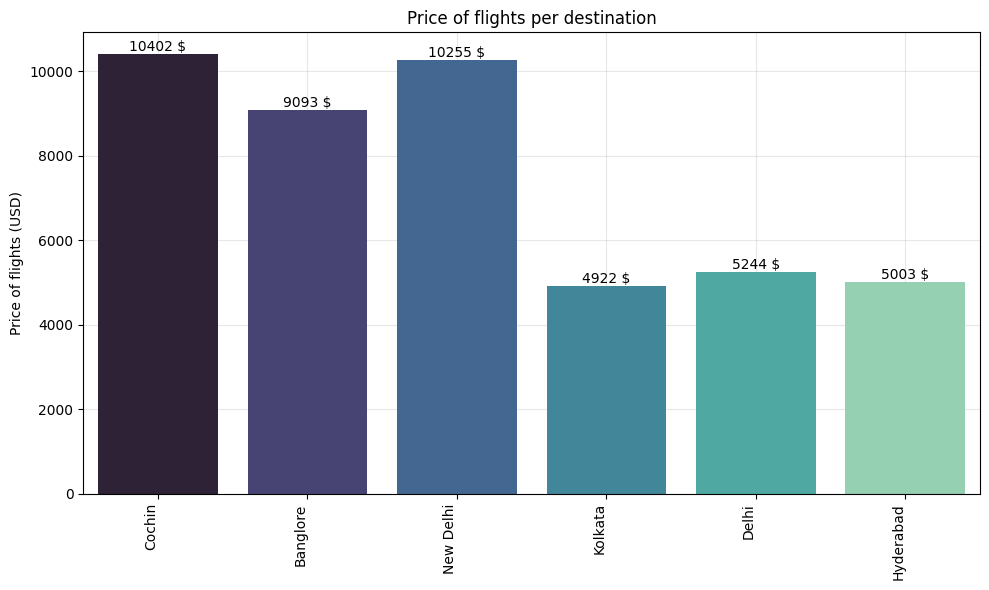

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=planes, x="Destination", y="Price", palette="mako", hue="Destination", ax=ax, errorbar=None,
    zorder=2  # Draw bars above the grid
)

# Make sure the grid is drawn behind the bars
ax.set_axisbelow(True)
ax.grid(True, alpha=0.3, zorder=0)

plt.xticks(rotation=45, ha="right")
ax.set(xlabel="", ylabel="Price of flights (USD)", title="Price of flights per destination")

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f $')

plt.xticks(rotation=90, ha="right")
plt.tight_layout()
plt.show()


### Comparing salaries
Exploratory data analysis is a crucial step in generating hypotheses!

You've had an idea you'd like to explore—do data professionals get paid more in the USA than they do in Great Britain?

You'll need to subset the data by `"Employee_Location"` and produce a plot displaying the average salary between the two groups.

## Comparative Analysis: From Exploration to Hypothesis Testing

### Transforming EDA Insights into Statistical Evidence

Comparative analysis represents the bridge between exploratory observation and statistical inference, where patterns discovered through EDA are formally tested and quantified.

####  **The EDA-to-Hypothesis Pipeline**:

**Stage 1: Pattern Recognition (EDA)**
- **Visual Exploration**: Identify apparent differences between groups
- **Descriptive Statistics**: Quantify observed differences
- **Effect Size Estimation**: Assess practical significance
- **Assumption Checking**: Verify statistical test prerequisites

**Stage 2: Hypothesis Formulation**
- **Null Hypothesis (H₀)**: No difference between groups
- **Alternative Hypothesis (H₁)**: Significant difference exists
- **Effect Direction**: One-tailed vs. two-tailed tests
- **Practical Significance**: What difference would matter?

**Stage 3: Statistical Testing**
- **Test Selection**: Choose appropriate statistical method
- **Significance Level**: Set Type I error tolerance (usually α = 0.05)
- **Power Analysis**: Ensure adequate sample size
- **Multiple Comparisons**: Adjust for family-wise error rate

#### **Salary Comparison Case Study: Statistical Framework**:

**Research Question**: "Do data professionals earn more in the USA than in Great Britain?"

**EDA Insights to Test:**
1. **Visual Evidence**: Bar chart suggests USA salaries are higher
2. **Descriptive Statistics**: Mean/median differences observed
3. **Distribution Shape**: Check normality for test selection
4. **Variance Equality**: Test homoscedasticity assumption

**Statistical Testing Strategy:**
```python
# Descriptive statistics
usa_salaries = usa_and_gb[usa_and_gb['Employee_Location'] == 'US']['Salary_USD']
gb_salaries = usa_and_gb[usa_and_gb['Employee_Location'] == 'GB']['Salary_USD']

print(f"USA: Mean = ${usa_salaries.mean():,.0f}, Std = ${usa_salaries.std():,.0f}")
print(f"GB:  Mean = ${gb_salaries.mean():,.0f}, Std = ${gb_salaries.std():,.0f}")

# Effect size calculation
from scipy.stats import ttest_ind
effect_size = (usa_salaries.mean() - gb_salaries.mean()) / \
             np.sqrt((usa_salaries.var() + gb_salaries.var()) / 2)

print(f"Cohen's d (effect size): {effect_size:.3f}")

# Statistical test
t_stat, p_value = ttest_ind(usa_salaries, gb_salaries)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.4f}")
```

#### **Effect Size Interpretation Framework**:

**Cohen's d Guidelines:**
- **Small Effect**: d = 0.2 (subtle but potentially important)
- **Medium Effect**: d = 0.5 (noticeable practical difference)
- **Large Effect**: d = 0.8 (substantial practical significance)

**Business Context for Salary Differences:**
- **d < 0.2**: Negligible salary difference
- **0.2 ≤ d < 0.5**: Modest but potentially meaningful difference
- **0.5 ≤ d < 0.8**: Substantial difference warranting investigation
- **d ≥ 0.8**: Large difference requiring explanation

#### **Comparative Techniques**:

**Non-Parametric Alternatives:**
```python
# When normality assumptions fail
from scipy.stats import mannwhitneyu

# Mann-Whitney U test (non-parametric t-test)
statistic, p_value = mannwhitneyu(usa_salaries, gb_salaries,
                                 alternative='two-sided')

# Wilcoxon rank-sum interpretation
print(f"Mann-Whitney U: {statistic}, p-value: {p_value:.4f}")
```

**Bootstrap Confidence Intervals:**
```python
# Robust confidence intervals for difference
from scipy.stats import bootstrap

def mean_difference(x, y):
    return np.mean(x) - np.mean(y)

# Bootstrap resampling
bootstrap_result = bootstrap((usa_salaries, gb_salaries),
                           mean_difference,
                           n_resamples=1000,
                           confidence_level=0.95)

print(f"95% CI for difference: ${bootstrap_result.confidence_interval.low:,.0f} to ${bootstrap_result.confidence_interval.high:,.0f}")
```

#### **Multi-Dimensional Comparative Analysis**:

**Stratified Comparisons:**
```python
# Compare within experience levels
for experience in df['Experience'].unique():
    subset = df[df['Experience'] == experience]
    usa_exp = subset[subset['Employee_Location'] == 'US']['Salary_USD']
    gb_exp = subset[subset['Employee_Location'] == 'GB']['Salary_USD']
    
    if len(usa_exp) > 5 and len(gb_exp) > 5:  # Minimum sample size
        t_stat, p_val = ttest_ind(usa_exp, gb_exp)
        print(f"{experience}: t={t_stat:.2f}, p={p_val:.3f}")
```

**ANOVA for Multiple Groups:**
```python
# When comparing more than two groups
from scipy.stats import f_oneway

# Compare salaries across all countries
country_groups = [group['Salary_USD'].values
                 for name, group in df.groupby('Employee_Location')
                 if len(group) > 10]  # Minimum group size

f_stat, p_value = f_oneway(*country_groups)
print(f"F-statistic: {f_stat:.3f}, p-value: {p_value:.4f}")
```

#### **Common Comparative Analysis Mistakes**:

**Statistical Errors:**
1. **Multiple Comparisons**: Testing many pairs inflates Type I error
2. **P-Hacking**: Adjusting analysis until significant results appear
3. **Assumption Violations**: Using inappropriate tests for data characteristics
4. **Sample Size Ignorance**: Drawing conclusions from underpowered studies

**Business Interpretation Errors:**
1. **Statistical vs. Practical Significance**: p < 0.05 doesn't mean important
2. **Causation Confusion**: Group differences don't imply causation
3. **Generalization Issues**: Sample may not represent broader population
4. **Context Ignorance**: Ignoring confounding variables

#### **Reporting Comparative Results**:

**Complete Statistical Reporting:**
```
Example: "Data professionals in the USA earn significantly more than
those in Great Britain (USA: M = $95,000, SD = $25,000;
GB: M = $65,000, SD = $18,000; t(248) = 8.42, p < 0.001,
Cohen's d = 1.35). This represents a large practical difference
of approximately $30,000 annually."
```

**Key Elements to Include:**
1. **Descriptive Statistics**: Means, standard deviations, sample sizes
2. **Test Statistics**: t-value, degrees of freedom, p-value
3. **Effect Size**: Cohen's d or equivalent measure
4. **Confidence Intervals**: Range of plausible differences
5. **Practical Interpretation**: What the difference means in context

#### **Best Practices for Comparative Analysis**:

**Pre-Analysis Planning:**
1. **Define Hypotheses**: Clear predictions before looking at data
2. **Choose Tests**: Select statistical methods before analysis
3. **Set Significance Levels**: Decide α level in advance
4. **Power Analysis**: Ensure adequate sample size

**Analysis Execution:**
1. **Check Assumptions**: Verify test prerequisites
2. **Handle Missing Data**: Appropriate missing data treatment
3. **Document Decisions**: Record analytical choices
4. **Sensitivity Analysis**: Test robustness of conclusions

**Communication Strategy:**
1. **Effect Size First**: Emphasize practical significance
2. **Confidence Intervals**: Show uncertainty in estimates
3. **Limitations**: Acknowledge what analysis cannot conclude
4. **Business Relevance**: Connect to decision-making needs

In [ ]:
# Filter salaries where "Employee_Location" is "US" or "GB", saving as usa_and_gb.
usa_and_gb = salaries[salaries["Employee_Location"].isin(["US", "GB"])]

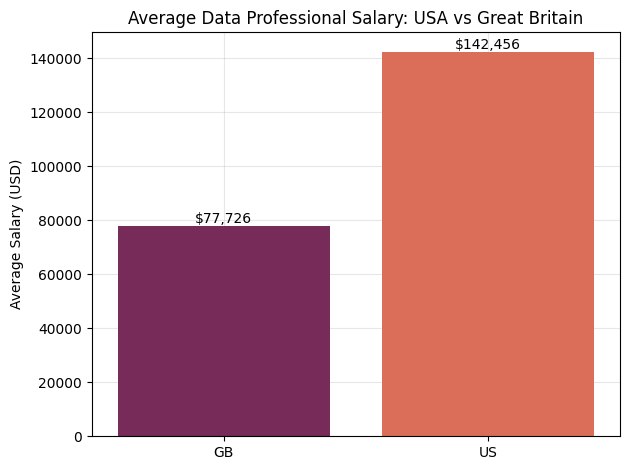

In [ ]:
# Use usa_and_gb to create a barplot visualizing "Salary_USD" against "Employee_Location"
fig, ax = plt.subplots()
sns.barplot(data=usa_and_gb, x="Employee_Location", y="Salary_USD", errorbar=None, hue="Employee_Location", palette="rocket")
ax.set(
    xlabel="",
    ylabel="Average Salary (USD)",
    title="Average Data Professional Salary: USA vs Great Britain"
)
ax.set_axisbelow(True)
ax.grid(True, alpha=0.3, zorder=0)

for container in ax.containers:
    ax.bar_label(container, fmt='${:,.0f}')

plt.tight_layout()
plt.show()

## Advanced EDA Concepts and Best Practices

### Quality Assurance in Exploratory Data Analysis

As your EDA skills advance, the focus shifts from basic techniques to rigorous analytical practices that ensure reliable insights and reproducible results.

#### **Statistical Rigor in EDA**:

**Assumption Checking:**
```python
# Test for normality
from scipy.stats import shapiro, normaltest

# Shapiro-Wilk test (small samples)
statistic, p_value = shapiro(data)
print(f'Shapiro-Wilk: p={p_value:.4f}')

# D'Agostino's test (larger samples)
statistic, p_value = normaltest(data)
print(f"D'Agostino: p={p_value:.4f}")
```

**Homoscedasticity Testing:**
```python
from scipy.stats import levene, bartlett

# Levene's test (robust to non-normality)
statistic, p_value = levene(group1, group2, group3)
print(f'Levene: p={p_value:.4f}')

# Bartlett's test (assumes normality)
statistic, p_value = bartlett(group1, group2, group3)
print(f'Bartlett: p={p_value:.4f}')
```

####  **Visualization Techniques**:

**Diagnostic Plots:**
```python
import matplotlib.pyplot as plt
from scipy import stats

def diagnostic_plots(data, title=""):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # Q-Q plot
    stats.probplot(data, dist="norm", plot=axes[0,0])
    axes[0,0].set_title(f'{title} Q-Q Plot')
    
    # Histogram with normal overlay
    axes[0,1].hist(data, bins=30, density=True, alpha=0.7)
    mu, sigma = data.mean(), data.std()
    x = np.linspace(data.min(), data.max(), 100)
    axes[0,1].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', lw=2)
    axes[0,1].set_title(f'{title} Distribution')
    
    # Box plot
    axes[1,0].boxplot(data)
    axes[1,0].set_title(f'{title} Box Plot')
    
    # Residuals plot (if applicable)
    axes[1,1].scatter(range(len(data)), data - data.mean())
    axes[1,1].axhline(y=0, color='r', linestyle='--')
    axes[1,1].set_title(f'{title} Residuals')
    
    plt.tight_layout()
    return fig
```

#### **Effect Size and Practical Significance**:

**Cohen's d for Group Comparisons:**
```python
def cohens_d(group1, group2):
    """
    Calculate Cohen's d effect size
    """
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1-1)*group1.var() + (n2-1)*group2.var()) / (n1+n2-2))
    return (group1.mean() - group2.mean()) / pooled_std

# Interpretation guidelines
def interpret_effect_size(d):
    if abs(d) < 0.2:
        return "Negligible"
    elif abs(d) < 0.5:
        return "Small"
    elif abs(d) < 0.8:
        return "Medium"
    else:
        return "Large"
```

**Practical Significance Assessment:**
```python
def practical_significance_analysis(data1, data2, domain_threshold=None):
    """
    Comprehensive practical significance analysis
    """
    # Statistical measures
    mean_diff = data1.mean() - data2.mean()
    effect_size = cohens_d(data1, data2)
    
    # Confidence interval for difference
    from scipy import stats
    ci = stats.t.interval(0.95, len(data1)+len(data2)-2,
                         loc=mean_diff,
                         scale=stats.sem(np.concatenate([data1, data2])))
    
    results = {
        'mean_difference': mean_diff,
        'effect_size': effect_size,
        'effect_interpretation': interpret_effect_size(effect_size),
        'confidence_interval': ci,
        'practical_significance': abs(mean_diff) > domain_threshold if domain_threshold else 'Unknown'
    }
    
    return results
```

####  **Correlation Analysis**:

**Partial Correlation:**
```python
from scipy.stats import pearsonr

def partial_correlation(x, y, z):
    """
    Calculate partial correlation between x and y, controlling for z
    """
    # Correlations
    rxy = pearsonr(x, y)[0]
    rxz = pearsonr(x, z)[0]
    ryz = pearsonr(y, z)[0]
    
    # Partial correlation formula
    rxy_z = (rxy - rxz * ryz) / (np.sqrt(1 - rxz**2) * np.sqrt(1 - ryz**2))
    
    return rxy_z
```

**Robust Correlation Methods:**
```python
from scipy.stats import spearmanr, kendalltau

def robust_correlation_analysis(x, y):
    """
    Multiple correlation measures for robustness
    """
    pearson_r, pearson_p = pearsonr(x, y)
    spearman_r, spearman_p = spearmanr(x, y)
    kendall_r, kendall_p = kendalltau(x, y)
    
    return {
        'pearson': {'r': pearson_r, 'p': pearson_p},
        'spearman': {'r': spearman_r, 'p': spearman_p},
        'kendall': {'r': kendall_r, 'p': kendall_p}
    }
```

#### **Error Handling and Data Validation**:

**Robust EDA Functions:**
```python
def safe_describe(df, numeric_only=True):
    """
    Robust descriptive statistics with error handling
    """
    try:
        if numeric_only:
            numeric_cols = df.select_dtypes(include=[np.number]).columns
            if len(numeric_cols) == 0:
                return "No numeric columns found"
            return df[numeric_cols].describe()
        else:
            return df.describe(include='all')
    except Exception as e:
        return f"Error in describe: {str(e)}"

def validate_data_quality(df):
    """
    Comprehensive data quality assessment
    """
    quality_report = {
        'shape': df.shape,
        'missing_values': df.isnull().sum().sum(),
        'duplicate_rows': df.duplicated().sum(),
        'data_types': df.dtypes.value_counts().to_dict(),
        'memory_usage_mb': df.memory_usage(deep=True).sum() / 1024**2,
        'potential_issues': []
    }
    
    # Check for potential issues
    if quality_report['missing_values'] > 0:
        quality_report['potential_issues'].append('Missing values present')
    
    if quality_report['duplicate_rows'] > 0:
        quality_report['potential_issues'].append('Duplicate rows found')
    
    # Check for suspicious values
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df[col].min() < 0 and 'price' in col.lower():
            quality_report['potential_issues'].append(f'Negative values in {col}')
    
    return quality_report
```

#### **EDA Checklists and Best Practices**:

**Pre-Analysis Checklist:**
- [ ] Data source and collection method understood
- [ ] Variable definitions and units confirmed
- [ ] Expected data range and constraints identified
- [ ] Missing data patterns investigated
- [ ] Data types validated and corrected
- [ ] Duplicate records identified and handled

**Analysis Checklist:**
- [ ] Univariate distributions examined
- [ ] Outliers identified and assessed
- [ ] Bivariate relationships explored
- [ ] Assumptions for planned analyses checked
- [ ] Effect sizes calculated alongside p-values
- [ ] Multiple perspectives considered (different cuts of data)

**Reporting Checklist:**
- [ ] Key findings summarized clearly
- [ ] Limitations and assumptions stated
- [ ] Practical significance addressed
- [ ] Visualizations are clear and properly labeled
- [ ] Code is reproducible and well-documented
- [ ] Next steps and recommendations provided

#### **Reproducibility and Documentation**:

**Session Information:**
```python
import sys
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns

def print_session_info():
    """
    Print session information for reproducibility
    """
    print(f"Python version: {sys.version}")
    print(f"Pandas version: {pd.__version__}")
    print(f"NumPy version: {np.__version__}")
    print(f"Matplotlib version: {matplotlib.__version__}")
    print(f"Seaborn version: {sns.__version__}")
    print(f"Platform: {sys.platform}")
```

**Analysis Log Template:**
```python
analysis_log = {
    'date': pd.Timestamp.now(),
    'analyst': 'Your Name',
    'data_source': 'path/to/data.csv',
    'objective': 'Research question or business goal',
    'key_findings': [],
    'limitations': [],
    'recommendations': [],
    'next_steps': []
}
```

#### **Integration with Machine Learning Pipeline**:

**Feature Engineering Insights:**
```python
def eda_to_features(df, target_col=None):
    """
    Generate feature engineering insights from EDA
    """
    insights = {
        'highly_correlated_pairs': [],
        'skewed_features': [],
        'categorical_high_cardinality': [],
        'potential_interactions': [],
        'outlier_prone_features': []
    }
    
    # Correlation analysis
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 1:
        corr_matrix = df[numeric_cols].corr().abs()
        high_corr = np.where((corr_matrix > 0.8) & (corr_matrix < 1.0))
        insights['highly_correlated_pairs'] = list(zip(corr_matrix.index[high_corr[0]],
                                                      corr_matrix.columns[high_corr[1]]))
    
    # Skewness analysis
    for col in numeric_cols:
        if abs(df[col].skew()) > 1:
            insights['skewed_features'].append(col)
    
    # High cardinality categoricals
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        if df[col].nunique() > 20:
            insights['categorical_high_cardinality'].append(col)
    
    return insights
```

**Model Readiness Assessment:**
```python
def assess_model_readiness(df, target_col=None):
    """
    Assess data readiness for machine learning
    """
    readiness_score = 0
    issues = []
    recommendations = []
    
    # Check missing values
    missing_pct = df.isnull().sum().sum() / (df.shape[0] * df.shape[1])
    if missing_pct < 0.05:
        readiness_score += 25
    else:
        issues.append(f'High missing data: {missing_pct:.1%}')
        recommendations.append('Implement imputation strategy')
    
    # Check data types
    if df.select_dtypes(include=['object']).shape[1] <= df.shape[1] * 0.3:
        readiness_score += 25
    else:
        issues.append('Many categorical variables')
        recommendations.append('Consider encoding strategies')
    
    # Check target variable (if provided)
    if target_col and target_col in df.columns:
        if df[target_col].nunique() > 1:
            readiness_score += 25
        else:
            issues.append('Target variable has no variation')
    
    # Check sample size
    if df.shape[0] > 1000:
        readiness_score += 25
    else:
        issues.append('Small sample size')
        recommendations.append('Consider data augmentation or simpler models')
    
    return {
        'readiness_score': readiness_score,
        'issues': issues,
        'recommendations': recommendations
    }
```

####  **Domain-Specific EDA Considerations**:

**Time Series Data:**
- Stationarity testing (ADF test)
- Seasonality detection
- Trend analysis
- Autocorrelation patterns

**Text Data:**
- Word frequency distributions
- Sentiment analysis
- Topic modeling preparation
- Text quality metrics

**Image Data:**
- Pixel distribution analysis
- Dimensionality considerations
- Color channel analysis
- Resolution and quality assessment

**Financial Data:**
- Return distribution analysis
- Volatility clustering
- Risk metrics
- Regulatory compliance checks

#### **Advanced Statistical Techniques in EDA**:

**Principal Component Analysis for EDA:**
```python
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def pca_exploration(df, n_components=None):
    """
    Use PCA to understand data structure
    """
    # Prepare data
    numeric_df = df.select_dtypes(include=[np.number])
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)
    
    # Fit PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(scaled_data)
    
    # Analysis
    variance_explained = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(variance_explained)
    
    return {
        'transformed_data': pca_result,
        'variance_explained': variance_explained,
        'cumulative_variance': cumulative_variance,
        'components': pca.components_,
        'feature_names': numeric_df.columns.tolist()
    }
```

**Clustering for Pattern Discovery:**
```python
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def exploratory_clustering(df, max_clusters=10):
    """
    Use clustering to discover data patterns
    """
    numeric_df = df.select_dtypes(include=[np.number])
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)
    
    silhouette_scores = []
    inertias = []
    
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(scaled_data)
        silhouette_scores.append(silhouette_score(scaled_data, labels))
        inertias.append(kmeans.inertia_)
    
    return {
        'silhouette_scores': silhouette_scores,
        'inertias': inertias,
        'optimal_k_silhouette': np.argmax(silhouette_scores) + 2
    }
```

###  **Learning Path and Next Steps**:

**Beginner to Intermediate:**
1. Master basic pandas operations
2. Learn visualization principles
3. Understand descriptive statistics
4. Practice with diverse datasets

**Intermediate to Advanced:**
1. Study statistical inference
2. Learn advanced visualization techniques
3. Understand domain-specific considerations
4. Practice hypothesis generation and testing

**Advanced Practice:**
1. Develop custom EDA functions
2. Build automated EDA pipelines
3. Integrate with machine learning workflows
4. Contribute to open-source EDA tools

**Recommended Resources:**
- "Exploratory Data Analysis" by John Tukey (foundational text)
- "The Grammar of Graphics" by Leland Wilkinson
- "Fundamentals of Data Visualization" by Claus Wilke
- Python libraries: pandas-profiling, sweetviz, autoviz
- Statistical software: R, SAS, SPSS for comparison

###  **Final Thoughts: EDA as Scientific Practice**

Effective EDA is both art and science. It requires:
- **Technical Skills**: Programming, statistics, visualization
- **Domain Knowledge**: Understanding context and constraints
- **Critical Thinking**: Questioning assumptions and findings
- **Communication**: Translating insights for stakeholders
- **Ethics**: Responsible handling of data and honest reporting

Remember: The goal of EDA is not just to describe data, but to **understand it deeply enough to ask better questions and make informed decisions**. Every dataset tells a story—your job is to listen carefully and tell it truthfully.

## Error Handling and Robustness in EDA

### Building Fault-Tolerant Analytical Workflows

Real-world data is messy, and robust EDA requires anticipating and handling various data quality issues gracefully.

#### **Common Data Issues and Solutions**:

**1. Encoding Problems:**
```python
def safe_read_csv(filepath, encodings=['utf-8', 'latin-1', 'cp1252']):
    """
    Try multiple encodings to read CSV files
    """
    for encoding in encodings:
        try:
            df = pd.read_csv(filepath, encoding=encoding)
            print(f"Successfully read with encoding: {encoding}")
            return df
        except UnicodeDecodeError:
            continue
    raise ValueError(f"Could not read file with any of the encodings: {encodings}")
```

**2. Data Type Inference Failures:**
```python
def robust_type_conversion(df, type_dict):
    """
    Safely convert data types with error reporting
    """
    conversion_log = {'successful': [], 'failed': []}
    
    for col, dtype in type_dict.items():
        if col in df.columns:
            try:
                if dtype == 'datetime':
                    df[col] = pd.to_datetime(df[col], errors='coerce')
                else:
                    df[col] = df[col].astype(dtype)
                conversion_log['successful'].append(f"{col} -> {dtype}")
            except Exception as e:
                conversion_log['failed'].append(f"{col} -> {dtype}: {str(e)}")
    
    return df, conversion_log
```

**3. Memory Management:**
```python
def memory_efficient_eda(filepath, chunksize=10000):
    """
    Perform EDA on large datasets using chunking
    """
    # Initialize accumulators
    total_rows = 0
    numeric_stats = {}
    categorical_counts = {}
    
    # Process in chunks
    for chunk in pd.read_csv(filepath, chunksize=chunksize):
        total_rows += len(chunk)
        
        # Accumulate numeric statistics
        numeric_cols = chunk.select_dtypes(include=[np.number]).columns
        for col in numeric_cols:
            if col not in numeric_stats:
                numeric_stats[col] = {'sum': 0, 'sum_sq': 0, 'min': float('inf'), 'max': float('-inf')}
            
            numeric_stats[col]['sum'] += chunk[col].sum()
            numeric_stats[col]['sum_sq'] += (chunk[col] ** 2).sum()
            numeric_stats[col]['min'] = min(numeric_stats[col]['min'], chunk[col].min())
            numeric_stats[col]['max'] = max(numeric_stats[col]['max'], chunk[col].max())
    
    # Calculate final statistics
    summary_stats = {}
    for col, stats in numeric_stats.items():
        mean = stats['sum'] / total_rows
        variance = (stats['sum_sq'] / total_rows) - (mean ** 2)
        summary_stats[col] = {
            'mean': mean,
            'std': np.sqrt(variance),
            'min': stats['min'],
            'max': stats['max']
        }
    
    return summary_stats
```

**4. Outlier-Robust Statistics:**
```python
def robust_summary_stats(series, trim_pct=0.05):
    """
    Calculate robust summary statistics
    """
    # Remove extreme values for robust estimates
    trimmed = series.dropna()
    lower_bound = trimmed.quantile(trim_pct)
    upper_bound = trimmed.quantile(1 - trim_pct)
    trimmed_data = trimmed[(trimmed >= lower_bound) & (trimmed <= upper_bound)]
    
    return {
        'mean': trimmed_data.mean(),
        'median': series.median(),
        'trimmed_mean': trimmed_data.mean(),
        'mad': (series - series.median()).abs().median(),  # Median Absolute Deviation
        'iqr': series.quantile(0.75) - series.quantile(0.25),
        'robust_std': 1.4826 * (series - series.median()).abs().median()  # Robust std estimate
    }
```

#### **Data Validation Framework**:

```python
class DataValidator:
    def __init__(self, df):
        self.df = df
        self.validation_results = []
    
    def check_required_columns(self, required_cols):
        """Validate that required columns exist"""
        missing_cols = set(required_cols) - set(self.df.columns)
        if missing_cols:
            self.validation_results.append(f"Missing required columns: {missing_cols}")
            return False
        return True
    
    def check_data_ranges(self, range_dict):
        """Validate that numeric columns fall within expected ranges"""
        for col, (min_val, max_val) in range_dict.items():
            if col in self.df.columns:
                out_of_range = ((self.df[col] < min_val) | (self.df[col] > max_val)).sum()
                if out_of_range > 0:
                    self.validation_results.append(
                        f"{col}: {out_of_range} values outside range [{min_val}, {max_val}]"
                    )
    
    def check_referential_integrity(self, foreign_keys):
        """Check foreign key relationships"""
        for child_col, parent_df, parent_col in foreign_keys:
            if child_col in self.df.columns:
                orphaned = ~self.df[child_col].isin(parent_df[parent_col])
                orphaned_count = orphaned.sum()
                if orphaned_count > 0:
                    self.validation_results.append(
                        f"{child_col}: {orphaned_count} orphaned records"
                    )
    
    def check_duplicates(self, subset=None):
        """Check for duplicate records"""
        duplicates = self.df.duplicated(subset=subset).sum()
        if duplicates > 0:
            self.validation_results.append(f"Found {duplicates} duplicate records")
    
    def get_validation_report(self):
        """Return comprehensive validation report"""
        return {
            'total_issues': len(self.validation_results),
            'issues': self.validation_results,
            'data_shape': self.df.shape,
            'validation_passed': len(self.validation_results) == 0
        }
```

#### **Visualization Functions**:

```python
def safe_plot_distribution(series, title="", ax=None):
    """
    Safely plot distribution with error handling
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    try:
        # Clean data
        clean_data = series.dropna()
        
        if len(clean_data) == 0:
            ax.text(0.5, 0.5, 'No valid data to plot',
                   ha='center', va='center', transform=ax.transAxes)
            return ax
        
        # Handle different data types
        if clean_data.dtype in ['object', 'category']:
            value_counts = clean_data.value_counts().head(20)  # Limit to top 20
            value_counts.plot(kind='bar', ax=ax)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        else:
            # Numeric data
            ax.hist(clean_data, bins=min(50, len(clean_data.unique())), alpha=0.7)
            
            # Add summary statistics
            mean_val = clean_data.mean()
            median_val = clean_data.median()
            ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
            ax.axvline(median_val, color='blue', linestyle='--', label=f'Median: {median_val:.2f}')
            ax.legend()
        
        ax.set_title(f'{title} (n={len(clean_data)}, missing={series.isna().sum()})')
        
    except Exception as e:
        ax.text(0.5, 0.5, f'Error plotting: {str(e)}',
               ha='center', va='center', transform=ax.transAxes)
    
    return ax
```

#### **Automated EDA Pipeline**:

```python
class AutoEDA:
    def __init__(self, df, target_col=None):
        self.df = df
        self.target_col = target_col
        self.report = {}
    
    def generate_report(self):
        """Generate comprehensive EDA report"""
        print("Generating automated EDA report...")
        
        # Basic info
        self.report['basic_info'] = self._basic_info()
        
        # Data quality
        self.report['data_quality'] = self._data_quality_check()
        
        # Univariate analysis
        self.report['univariate'] = self._univariate_analysis()
        
        # Bivariate analysis
        if self.target_col:
            self.report['bivariate'] = self._bivariate_analysis()
        
        # Correlations
        self.report['correlations'] = self._correlation_analysis()
        
        return self.report
    
    def _basic_info(self):
        return {
            'shape': self.df.shape,
            'columns': list(self.df.columns),
            'dtypes': self.df.dtypes.value_counts().to_dict(),
            'memory_usage': self.df.memory_usage(deep=True).sum() / 1024**2
        }
    
    def _data_quality_check(self):
        return {
            'missing_values': self.df.isnull().sum().to_dict(),
            'duplicate_rows': self.df.duplicated().sum(),
            'unique_counts': self.df.nunique().to_dict()
        }
    
    def _univariate_analysis(self):
        numeric_cols = self.df.select_dtypes(include=[np.number]).columns
        categorical_cols = self.df.select_dtypes(include=['object', 'category']).columns
        
        return {
            'numeric_summary': self.df[numeric_cols].describe().to_dict() if len(numeric_cols) > 0 else {},
            'categorical_summary': {col: self.df[col].value_counts().head().to_dict()
                                  for col in categorical_cols}
        }
    
    def _bivariate_analysis(self):
        if self.target_col not in self.df.columns:
            return {'error': 'Target column not found'}
        
        numeric_cols = self.df.select_dtypes(include=[np.number]).columns
        correlations_with_target = {}
        
        for col in numeric_cols:
            if col != self.target_col:
                try:
                    corr = self.df[col].corr(self.df[self.target_col])
                    correlations_with_target[col] = corr
                except:
                    correlations_with_target[col] = None
        
        return {'target_correlations': correlations_with_target}
    
    def _correlation_analysis(self):
        numeric_df = self.df.select_dtypes(include=[np.number])
        if len(numeric_df.columns) < 2:
            return {'error': 'Not enough numeric columns for correlation analysis'}
        
        corr_matrix = numeric_df.corr()
        
        # Find highly correlated pairs
        high_corr_pairs = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                corr_val = abs(corr_matrix.iloc[i, j])
                if corr_val > 0.7:  # High correlation threshold
                    high_corr_pairs.append({
                        'var1': corr_matrix.columns[i],
                        'var2': corr_matrix.columns[j],
                        'correlation': corr_matrix.iloc[i, j]
                    })
        
        return {
            'correlation_matrix': corr_matrix.to_dict(),
            'high_correlations': high_corr_pairs
        }
```

#### **Performance Optimization Tips**:

**1. Efficient Data Loading:**
```python
# Use specific dtypes to reduce memory
dtype_dict = {
    'category_col': 'category',
    'int_col': 'int32',  # Instead of int64 if values fit
    'float_col': 'float32'  # Instead of float64 if precision allows
}
df = pd.read_csv('data.csv', dtype=dtype_dict)
```

**2. Vectorized Operations:**
```python
# Avoid loops, use vectorized operations
# Instead of:
result = []
for x in df['column']:
    result.append(x ** 2)

# Use:
result = df['column'] ** 2
```

**3. Query Optimization:**
```python
# Use query() for complex filters
filtered_df = df.query('age > 25 and income < 100000')

# Use loc for simple boolean indexing
filtered_df = df.loc[df['age'] > 25]
```

#### 🔍 **Debugging EDA Code**:

```python
def debug_dataframe_operation(func):
    """
    Decorator to debug DataFrame operations
    """
    def wrapper(df, *args, **kwargs):
        print(f"Before {func.__name__}: shape {df.shape}, memory {df.memory_usage().sum()/1024**2:.1f}MB")
        try:
            result = func(df, *args, **kwargs)
            if isinstance(result, pd.DataFrame):
                print(f"After {func.__name__}: shape {result.shape}, memory {result.memory_usage().sum()/1024**2:.1f}MB")
            return result
        except Exception as e:
            print(f"Error in {func.__name__}: {str(e)}")
            raise
    return wrapper

# Usage
@debug_dataframe_operation
def clean_data(df):
    return df.dropna().drop_duplicates()
```

### **Best Practices Summary**:

1. **Always validate data before analysis**
2. **Handle missing values explicitly**
3. **Use robust statistical measures when outliers are present**
4. **Document assumptions and limitations**
5. **Test code with edge cases**
6. **Monitor memory usage with large datasets**
7. **Use version control for analysis scripts**
8. **Create reproducible workflows**
9. **Validate results with domain experts**
10. **Plan for data pipeline failures**
